In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/cleaned_dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


warnings.filterwarnings('ignore')


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Name of Dataset : Women's Clothing Sizes

# Context

Online clothes stores can sometimes face challenges when it comes to accurately representing sizes, which can lead to customer dissatisfaction and frustration. Here are some common mistakes that online clothes stores make regarding sizes:

Inconsistent Sizing Standards: Different brands and manufacturers often have their own sizing standards, which can vary significantly. Unfortunately, online stores may not always provide detailed size charts or accurate measurements for each product, leading to confusion for customers. As a result, customers may receive clothes that don't fit as expected.

Lack of Standardization: Even within the same brand, inconsistencies in sizing can occur across different product lines or collections. This inconsistency can make it difficult for customers to determine their correct size when shopping online, leading to the need for returns and exchanges.

Limited Size Range: Some online stores may fail to cater to a diverse range of body sizes. They may offer limited size options, excluding customers who fall outside the average or conventional size range. This exclusion can be frustrating for individuals who struggle to find clothes that fit their unique body shapes.

Insufficient Measurement Information: Online stores sometimes provide incomplete or inadequate measurements for their clothing items. They may only provide generic size labels such as small, medium, or large, without specifying the exact measurements of the garments. This lack of detailed information can make it challenging for customers to make informed decisions about sizing.

Inaccurate Product Descriptions: Descriptions of clothing items can be misleading, especially when it comes to the fit of the garment. Online stores may use ambiguous terms like "oversized," "relaxed fit," or "true to size," which can be interpreted differently by customers. Without clear explanations or visual references, customers may struggle to determine the appropriate size for themselves.

Inadequate Customer Support: When customers face sizing issues with their online clothing purchases, it is essential to have effective customer support available. Unfortunately, some online stores may lack responsive customer service, making it difficult for customers to resolve their size-related problems or obtain timely assistance.

To mitigate these mistakes and improve the online shopping experience, online clothes stores can take several steps. They should provide comprehensive and accurate size charts, offer detailed measurements for each clothing item, include visuals or models wearing the garments to showcase fit, prioritize size inclusivity by expanding their size ranges, and enhance customer support to address sizing concerns promptly and effectively. By addressing these issues, online clothes stores can help customers make better-informed choices and reduce size-related frustrations.

**Source :** https://www.kaggle.com/datasets/tourist55/clothessizeprediction


In [2]:
dataframed = pd.read_csv('./cleaned_dataset.csv')
dataframed.head(100)

,weight,age,height,size,country,gender,category,purchase_success,chest,waist,hip
0,68,53,162.56,XXXL,US,Female,Dresses,False,48,34,46
1,66,41,170.18,L,US,Male,Bottoms,False,46,24,46
2,58,25,157.48,S,US,Male,Tops,True,42,38,45
3,63,44,170.18,M,US,Male,Dresses,False,46,37,48
4,56,47,165.10,M,US,Male,Dresses,False,33,29,41
...,...,...,...,...,...,...,...,...,...,...,...
95,53,53,157.48,M,US,Male,Bottoms,True,33,35,38
96,52,36,157.48,S,US,Female,Bottoms,True,30,28,47
97,61,24,162.56,XL,US,Female,Dresses,False,44,36,34
98,56,25,157.48,XL,US,Male,Dresses,False,48,33,41


In [3]:
dataframed_purchase = dataframed['purchase_success']

In [4]:
dataframed.country.unique()

array(['US', 'UK', 'EU', 'India'], dtype=object)

# The Dataset consist of the following :
* 119734 rows
* 4 columns

In [5]:
print('Shape of the Dataset =', dataframed.shape)

Shape of the Dataset = (118121, 11)


# METADATA
1. **Weight (in kgs) :**  Weight refers to the measurement of the amount of mass or heaviness of an object or a person. It is commonly expressed in kilograms (kg) in the metric system.

2. **Age :** Age refers to the length of time a person has been alive, measured in years. It is an important factor in various aspects of life, including development, growth, legal rights, and social interactions. Age is often used to categorize individuals into different age groups for statistical, medical, and legal purposes.

3. **Height (in cm) :** Height refers to the vertical measurement of an object or a person from the base to the top. It is commonly expressed in centimeters (cm) or feet and inches. When referring to a person's height, it typically indicates the distance from the ground to the top of their head, while standing upright.

4. **Size :**  Size can have different meanings depending on the context. In the context of clothing, size typically refers to the measurement or designation that indicates the fit of a garment. Clothing sizes can vary depending on the brand, country, and type of clothing item. In the context of this dataset here are the following sizes from smallest to largest :
      * **XXS** = extra-extra-small
      * **S** = small,
      * **M** = medium,
      * **L** = large,
      * **XL** = extra-large,
      * **XXL** = extra-extra-large,
      * **XXXL** = extra-extra-extra-large

In [6]:
dataframed.columns.values.tolist()

['weight',
 'age',
 'height',
 'size',
 'country',
 'gender',
 'category',
 'purchase_success',
 'chest',
 'waist',
 'hip']

In [7]:
dataframed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118121 entries, 0 to 118120
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   weight            118121 non-null  int64  
 1   age               118121 non-null  int64  
 2   height            117795 non-null  float64
 3   size              118121 non-null  object 
 4   country           118121 non-null  object 
 5   gender            118121 non-null  object 
 6   category          118121 non-null  object 
 7   purchase_success  118121 non-null  bool   
 8   chest             118121 non-null  int64  
 9   waist             118121 non-null  int64  
 10  hip               118121 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(4)
memory usage: 9.1+ MB


In [8]:
dataframed.describe()

,weight,age,height,chest,waist,hip
count,118121.000000,118121.000000,117795.000000,118121.000000,118121.000000,118121.000000
mean,61.211402,38.498201,165.757258,39.511247,31.500351,40.483030
std,8.769488,12.116854,6.716457,5.774224,4.611511,5.183301
min,35.000000,18.000000,137.160000,30.000000,24.000000,32.000000
25%,55.000000,28.000000,160.020000,34.000000,27.000000,36.000000
50%,61.000000,38.000000,165.100000,40.000000,31.000000,40.000000
75%,66.000000,49.000000,170.180000,45.000000,36.000000,45.000000
max,91.000000,59.000000,193.040000,49.000000,39.000000,49.000000


In [9]:
dataframed.dtypes

weight                int64
age                   int64
height              float64
size                 object
country              object
gender               object
category             object
purchase_success       bool
chest                 int64
waist                 int64
hip                   int64
dtype: object

In [10]:
dataframed.isnull().sum()

weight                0
age                   0
height              326
size                  0
country               0
gender                0
category              0
purchase_success      0
chest                 0
waist                 0
hip                   0
dtype: int64

In [11]:
pip install missingno

# Columns with missing values :

1. Age : Age refers to the length of time a person has been alive, measured in years. It is an important factor in various aspects of life, including development, growth, legal rights, and social interactions. Age is often used to categorize individuals into different age groups for statistical, medical, and legal purposes.

2. Height (in cm) : Height refers to the vertical measurement of an object or a person from the base to the top. It is commonly expressed in centimeters (cm) or feet and inches. When referring to a person's height, it typically indicates the distance from the ground to the top of their head, while standing upright.



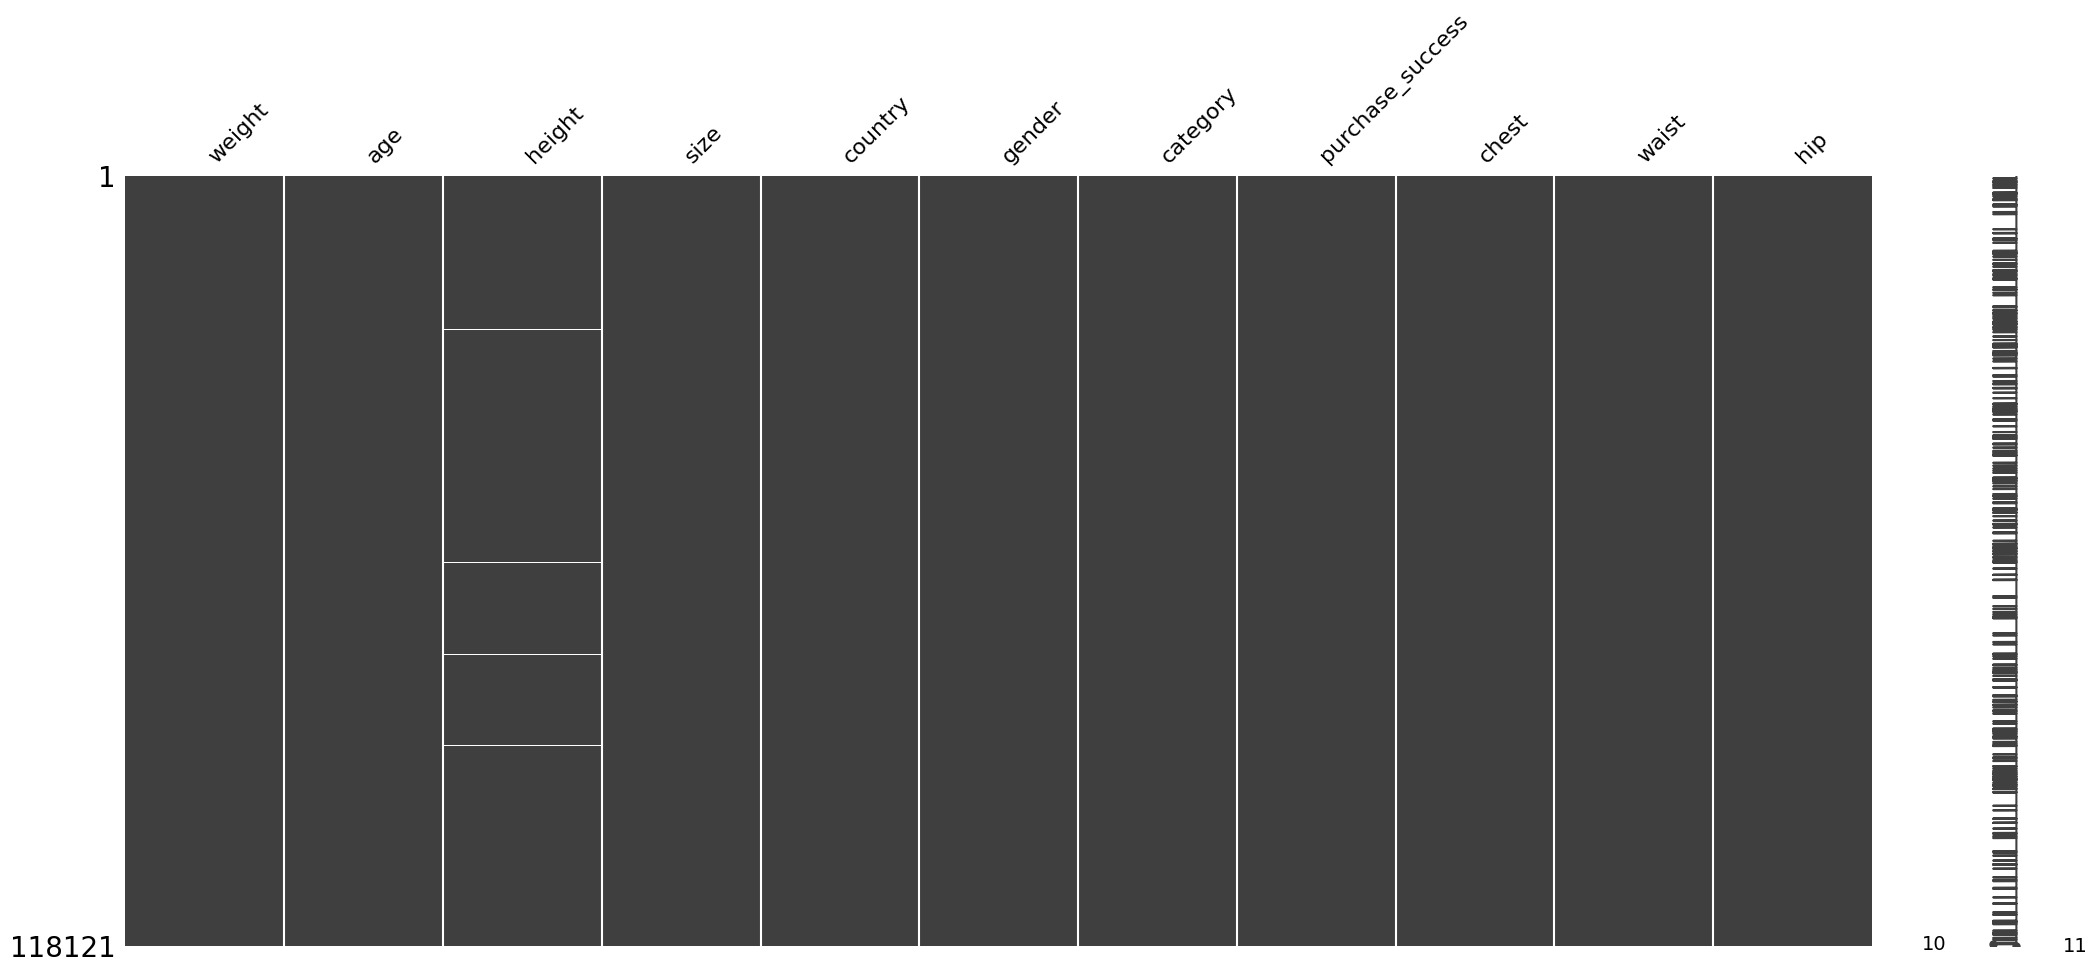

In [12]:
import missingno as msno
msno.matrix(dataframed)
plt.show()

# Missing Values : Age
Age refers to the length of time a person has been alive, measured in years. It is an important factor in various aspects of life, including development, growth, legal rights, and social interactions. Age is often used to categorize individuals into different age groups for statistical, medical, and legal purposes.

# Missing Values : Height (in cm)
Height refers to the vertical measurement of an object or a person from the base to the top. It is commonly expressed in centimeters (cm) or feet and inches. When referring to a person's height, it typically indicates the distance from the ground to the top of their head, while standing upright.

In [13]:
dataframed['age'] = dataframed['age'].fillna(dataframed['age'].median())

In [14]:
dataframed['height'] = dataframed['height'].fillna(dataframed['height'].median())

# Mapping Values : Size
Size can have different meanings depending on the context. In the context of clothing, size typically refers to the measurement or designation that indicates the fit of a garment. Clothing sizes can vary depending on the brand, country, and type of clothing item. In the context of this dataset here are the following sizes from smallest to largest :
   * **XXS** = extra-extra-small = 1
   * **S** = small = 2
   * **M** = medium = 3
   * **L** = large = 4
   * **XL** = extra-large = 5
   * **XXL** = extra-extra-large = 6
   * **XXXL** = extra-extra-extra-large = 7

In [15]:
dataframed['size'] = dataframed['size'].map({"XXS": 1, "S": 2, "M" : 3, "L" : 4, "XL" : 5, "XXL" : 6, "XXXL" : 7})

# Feature Engineering

Columns we will create :
* **Body Mass Index (BMI) :**  Body Mass Index (BMI) is a numerical value calculated based on a person's weight and height. It is a widely used metric to assess whether an individual's weight is within a healthy range relative to their height. The BMI calculation provides a general indication of body composition and is often used as a screening tool to identify potential weight-related health risks.

The formula for calculating BMI is as follows:

> BMI = weight (in kilograms) / (height (in meters))^2

Alternatively, for height measured in centimeters, the formula can be modified as:

> BMI = weight (in kilograms) / (height (in centimeters) / 100)^2

Once the BMI is calculated, it is categorized into different ranges that correspond to varying degrees of weight status. The World Health Organization (WHO) classification commonly used for adults is as follows:

* Underweight: BMI less than 18.5
* Normal weight: BMI between 18.5 and 24.9
* Overweight: BMI between 25 and 29.9
* Obesity (Class I): BMI between 30 and 34.9
* Obesity (Class II): BMI between 35 and 39.9
* Obesity (Class III): BMI 40 or higher

In [16]:
dataframed['bmi'] = dataframed['weight'] / (pow(dataframed['height'] / 100, 2))

# EDA
**Types of Rows :**
* Overall Clothing Size Samples
* XXS Clothing Size Samples
* S Clothing Size Samples
* M Clothing Size Samples
* L Clothing Size Samples
* XL Clothing Size Samples
* XXL Clothing Size Samples
* XXXL Clothing Size Samples

# Types of Rows : Overall Clothing Size Samples

# The Range of Values among the different 5 Columns

In [17]:
print('The Range of Values among the different 5 Columns')

print('weight : {:.4f}'.format(min(dataframed['weight'])) + ' - {:.4f}'.format(max(dataframed['weight'])))
print('\n')
print('age : {:.4f}'.format(min(dataframed['age'])) + ' - {:.4f}'.format(max(dataframed['age'])))
print('\n')
print('height : {:.4f}'.format(min(dataframed['height'])) + ' - {:.4f}'.format(max(dataframed['height'])))
print('\n')
print('size : {:.4f}'.format(min(dataframed['size'])) + ' - {:.4f}'.format(max(dataframed['size'])))
print('\n')
print('BMI : {:.4f}'.format(min(dataframed['bmi'])) + ' - {:.4f}'.format(max(dataframed['bmi'])))

The Range of Values among the different 5 Columns
weight : 35.0000 - 91.0000


age : 18.0000 - 59.0000


height : 137.1600 - 193.0400


size : 1.0000 - 7.0000


BMI : 10.4649 - 44.0662


# Distribution of Values among different 5 columns

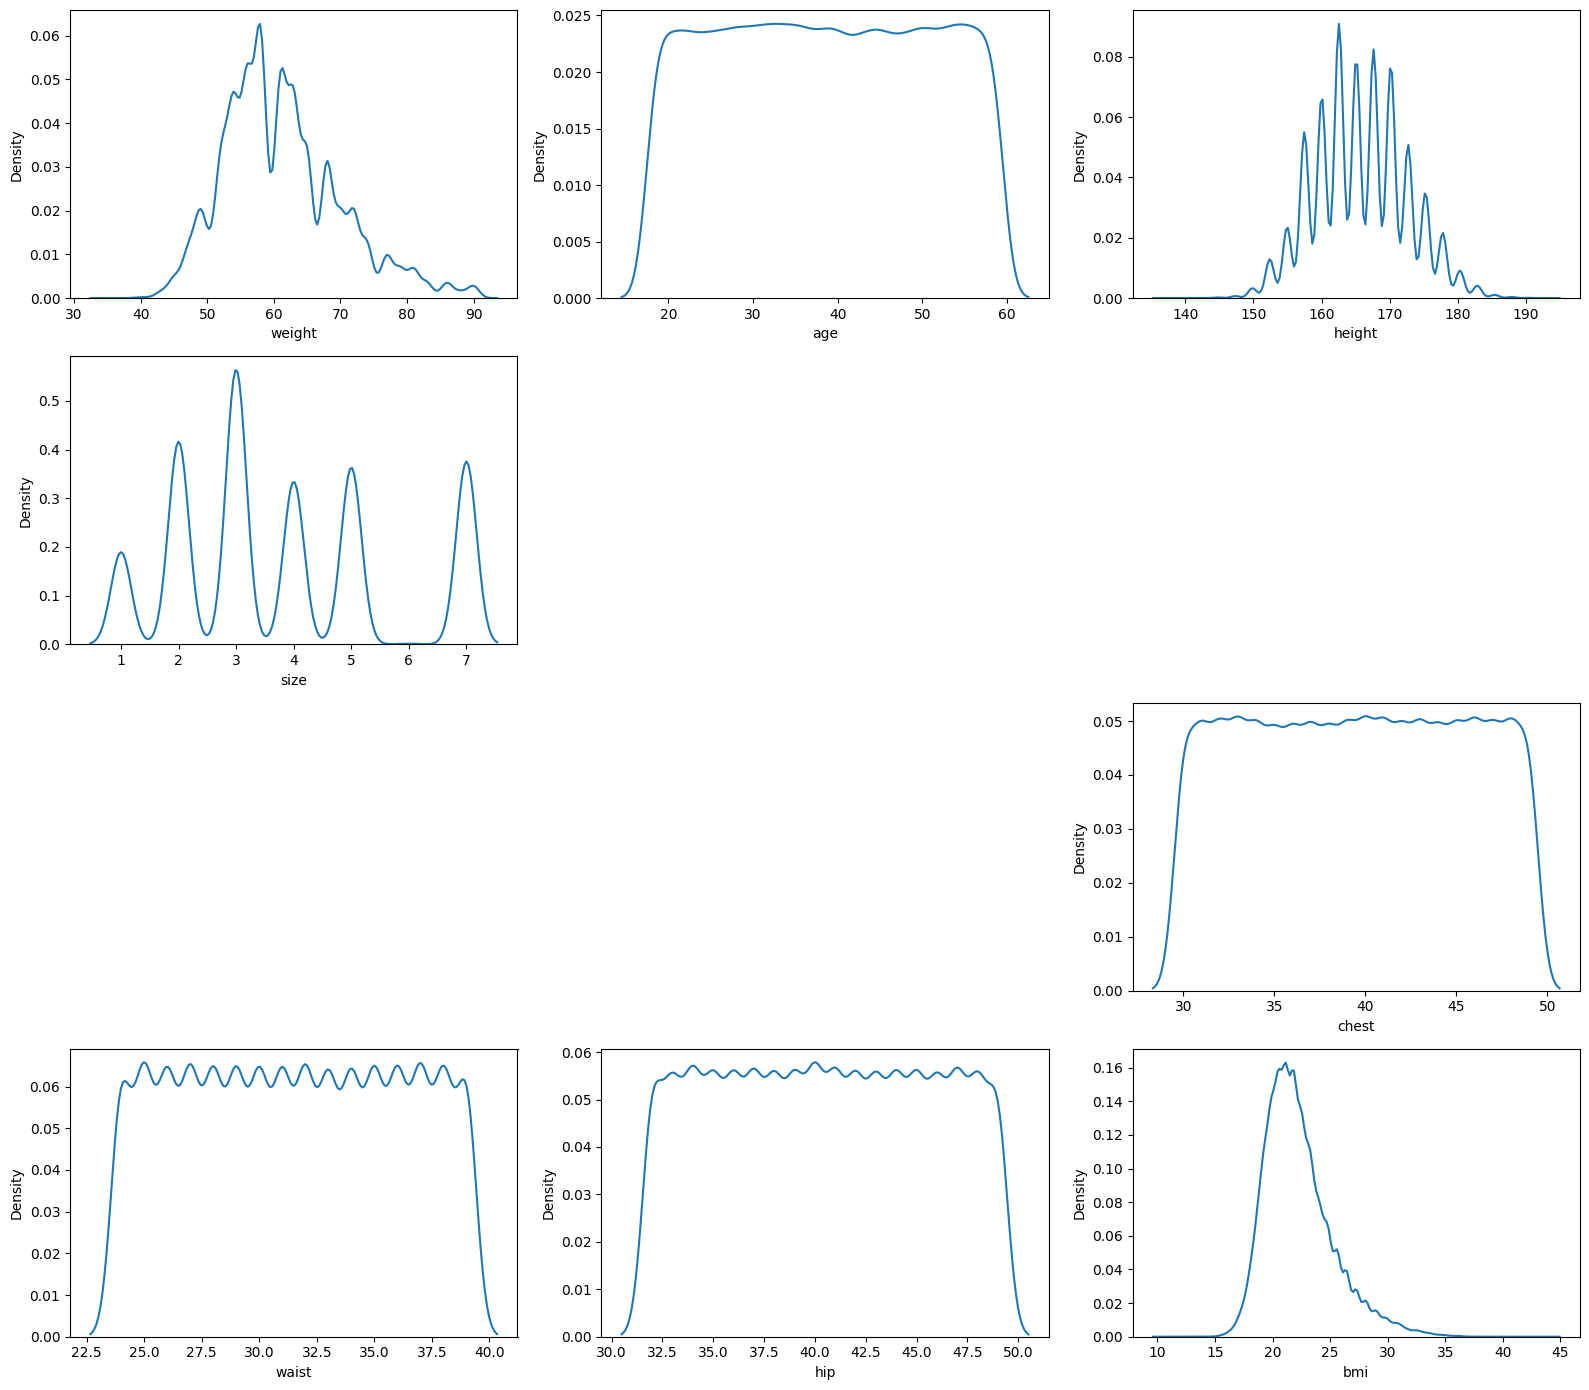

In [18]:
plt.figure(figsize=(16,14))
for i, col in enumerate(dataframed.columns):
    if dataframed[col].dtype in ['int64', 'float64', 'datetime64[ns]']:  # Check if the column is numeric or datetime
        plt.subplot(4, 3, i + 1) # Increased number of subplots to accommodate all columns
        sns.kdeplot(data=dataframed[col])
        plt.tight_layout()

# Pearson correlation coefficient Heatmap

This kind of correlation expresses a value from 1 to -1 to represent the strength of relativity among two different variables.

* -1 = Perfectly Negative

* -0.8 = Strongly Negative

* -0.5 = Moderately Negative

* -0.2 = Weakly Negative

* 0 = No association

* 0.2 = Weakly Positive

* 0.5 = Moderately Positive

* 0.8 = Strongly Positive

* 1 = Perfectly Positive

[Text(0.5, 58.219999999999985, 'Pearson Correlation Coefficient Heatmap')]

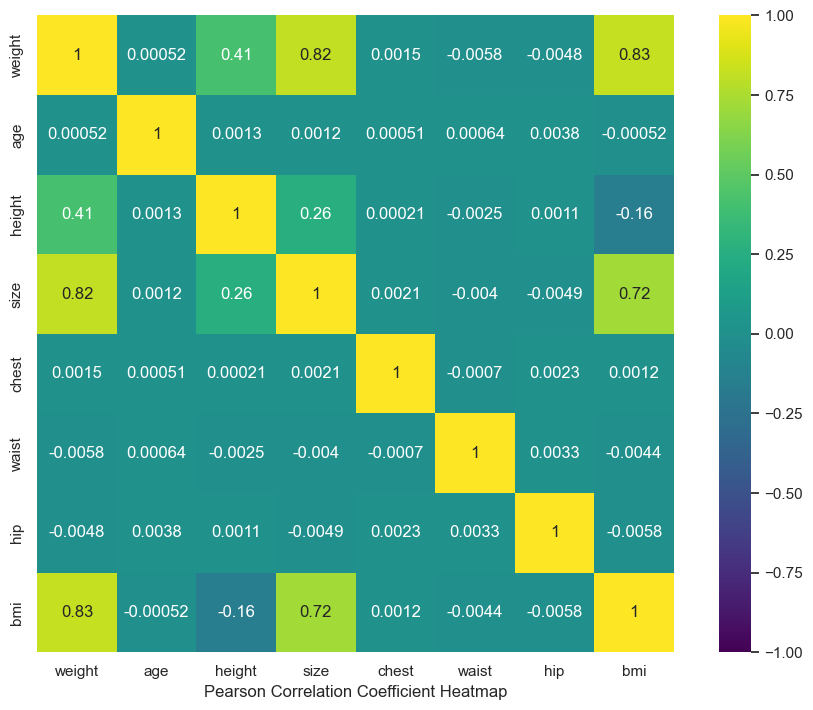

In [19]:
# Assuming 'dataframed' is your DataFrame
# Identify columns with non-numerical data
non_numeric_cols = dataframed.select_dtypes(exclude=['number']).columns

# Drop or convert non-numerical columns before calculating correlations
# Option 1: Drop non-numerical columns
dataframed_numeric = dataframed.drop(non_numeric_cols, axis=1)

# Option 2: Convert non-numerical columns (if applicable)
# Example: If 'EU' represents a categorical variable, you could use one-hot encoding
# dataframed_encoded = pd.get_dummies(dataframed, columns=['column_with_EU'])

# Calculate correlations on the numerical DataFrame
correlations = dataframed_numeric.corr("pearson")

# Generate heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)})
Heated = sns.heatmap(correlations, vmin=-1, vmax=1, cmap='viridis', annot=True, square=True)
Heated.set(xlabel = "Pearson Correlation Coefficient Heatmap")

# Check for Outliers among the different 5 columns

Index(['weight', 'age', 'height', 'size', 'country', 'gender', 'category',
       'purchase_success', 'chest', 'waist', 'hip', 'bmi'],
      dtype='object')


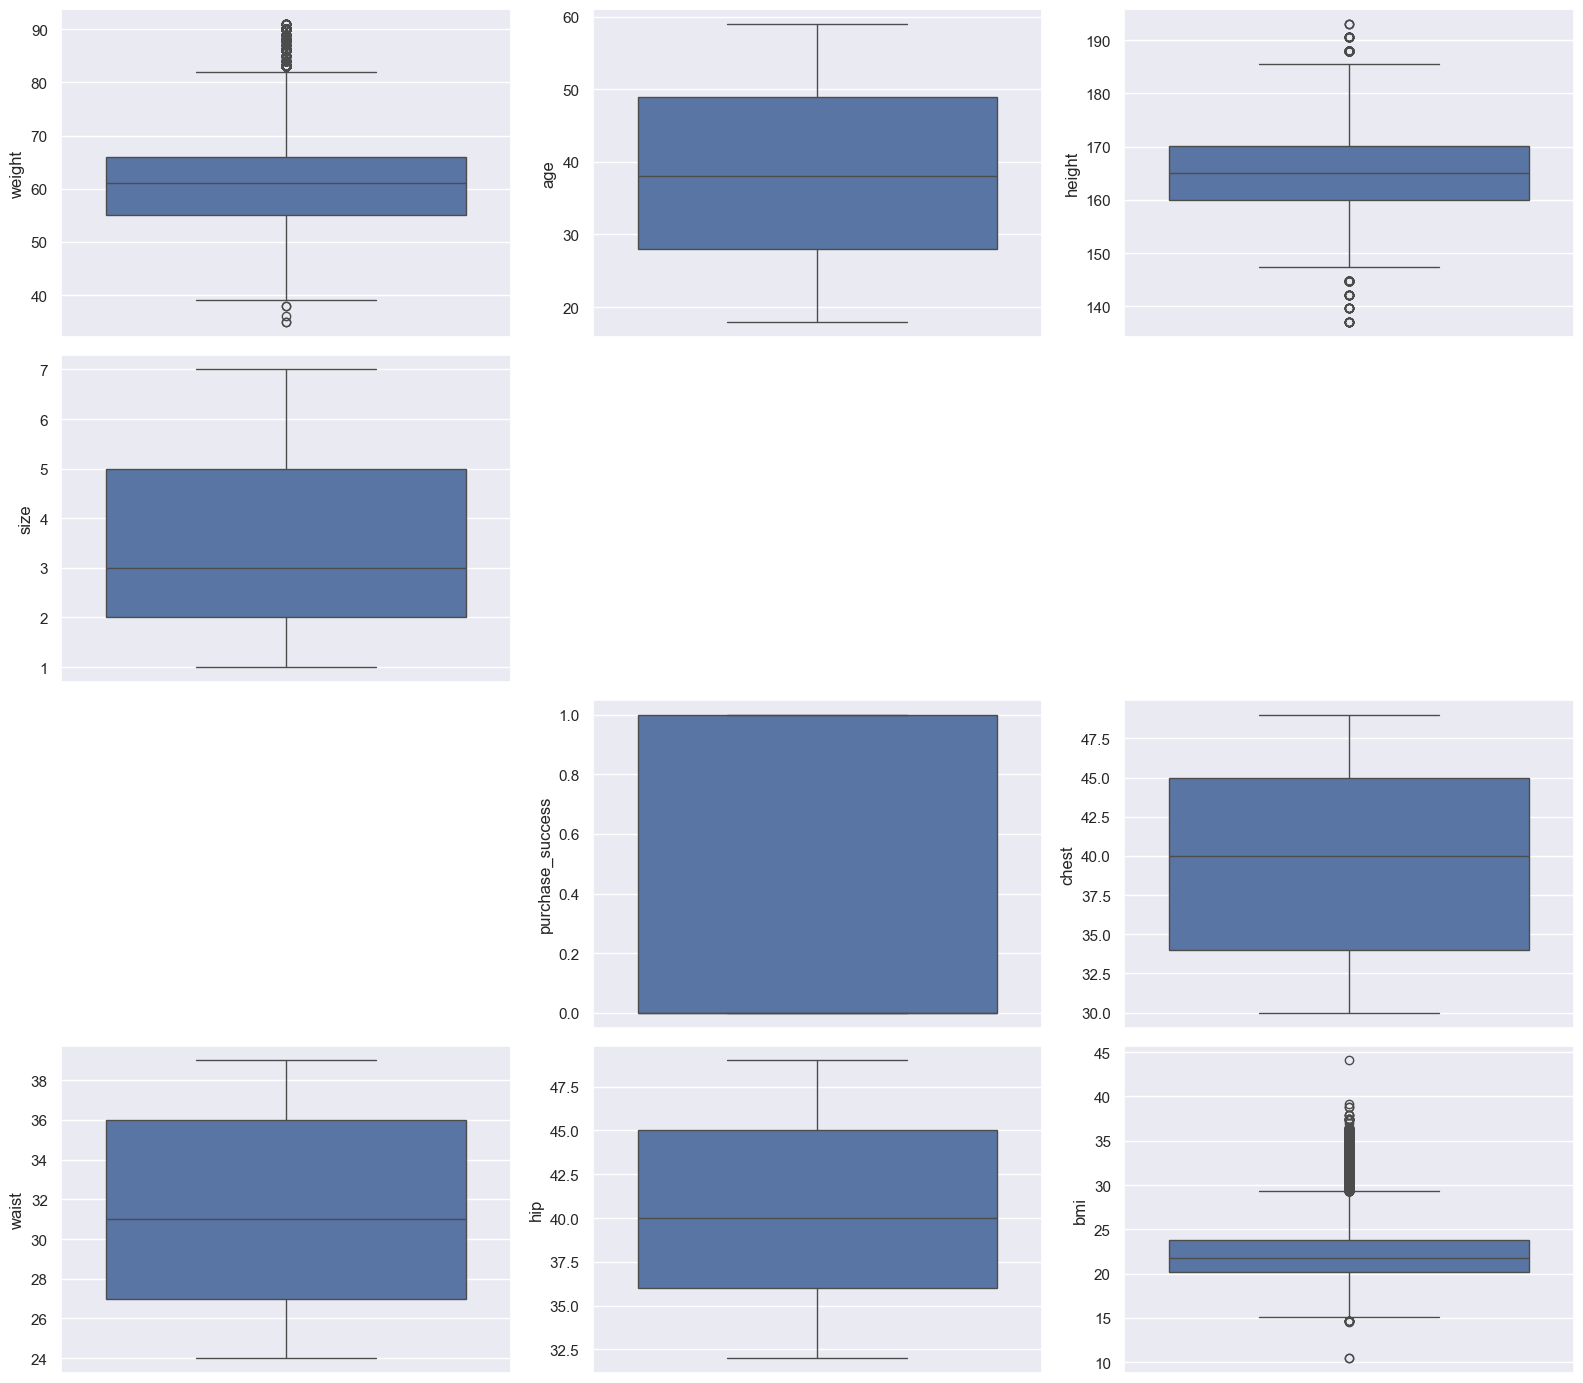

In [20]:
plt.figure(figsize=(16,14))
print(dataframed.columns)

for i, col in enumerate(dataframed.columns):
    if dataframed[col].dtype != 'object':  # Check if the column is not of object type (e.g., string)
        plt.subplot(4, 3, i+1)  # Adjust the subplot grid to fit all columns
        sns.boxplot(data=dataframed[col])
    
    plt.tight_layout()  # Adjust the layout to avoid overlap

# Column : Weight (in kgs)

# Distribution of rows in terms of Weight

[(22.0, 136.0)]

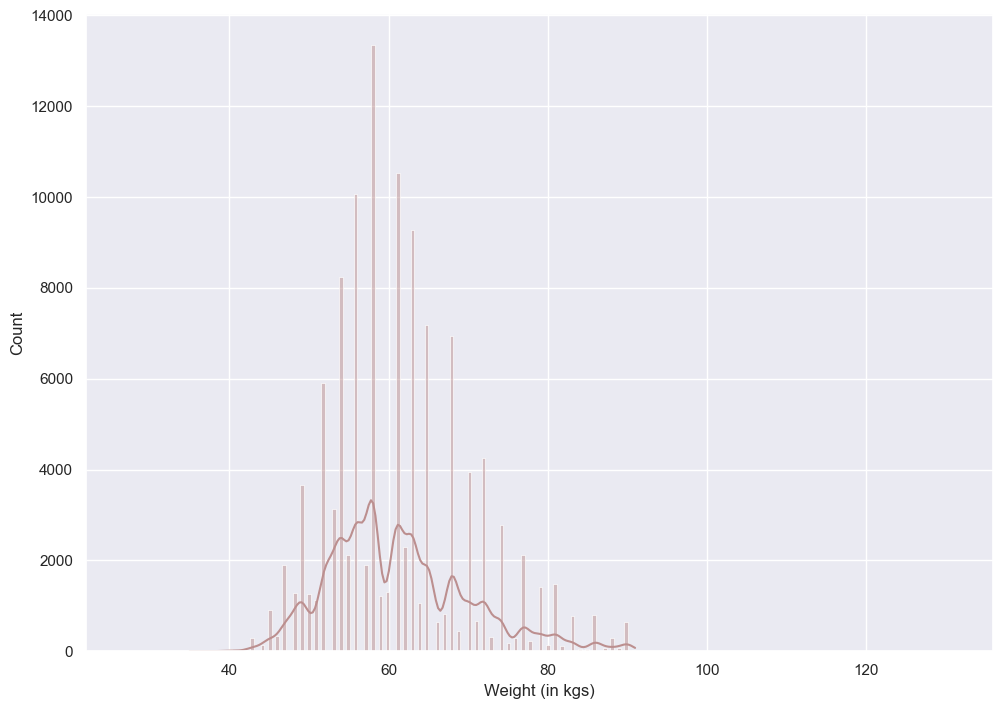

In [21]:
count_plotted = sns.histplot(x = 'weight', data = dataframed, kde = True, color = 'rosybrown')
count_plotted.set(xlabel = "Weight (in kgs)")
count_plotted.set(xlim = (22.0000,136.0000))

# Outliers : Weight

[(22.0, 136.0)]

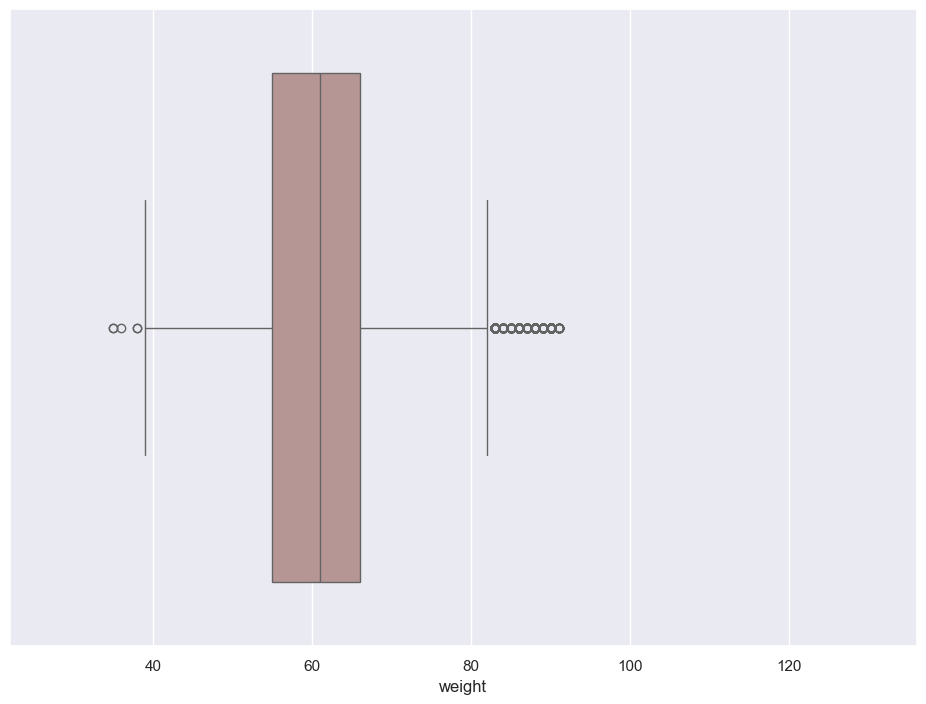

In [22]:
boxxer_plot = sns.boxplot(x = 'weight', data = dataframed, color = 'rosybrown')
boxxer_plot.set(xlim = (22.0000,136.0000))

# How many outliers in Weight Column?

In [23]:
numpy_array = np.array(dataframed['weight'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 38.5000 or greater than 82.5000
There are 2784 outliers.


# Column : Age

# Distribution of rows in terms of Age

[(0.0, 117.0)]

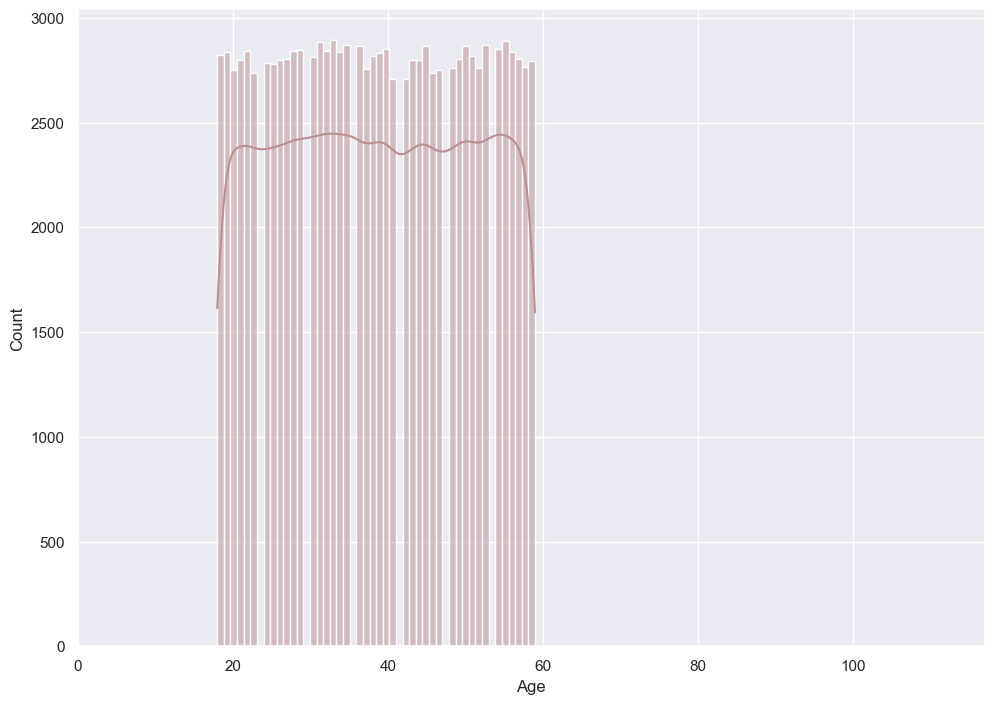

In [24]:
count_plotted = sns.histplot(x = 'age', data = dataframed, kde = True, color = 'rosybrown')
count_plotted.set(xlabel = "Age")
count_plotted.set(xlim = (0.0000, 117.0000))

# Outliers : Age

[(0.0, 117.0)]

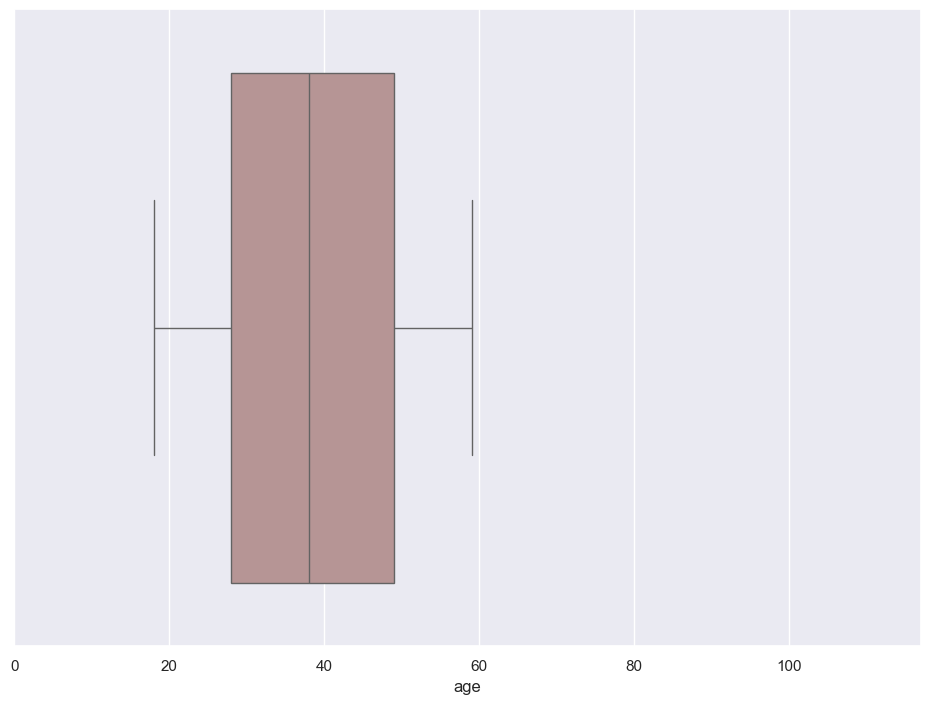

In [25]:
boxxer_plot = sns.boxplot(x = 'age', data = dataframed, color = 'rosybrown')
boxxer_plot.set(xlim = (0.0000, 117.0000))

# How many outliers in Age Column?

In [26]:
numpy_array = np.array(dataframed['age'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -3.5000 or greater than 80.5000
There are 0 outliers.


# Column : Height (in cm)

# Distribution of rows in terms of Height

[(137.16, 193.04)]

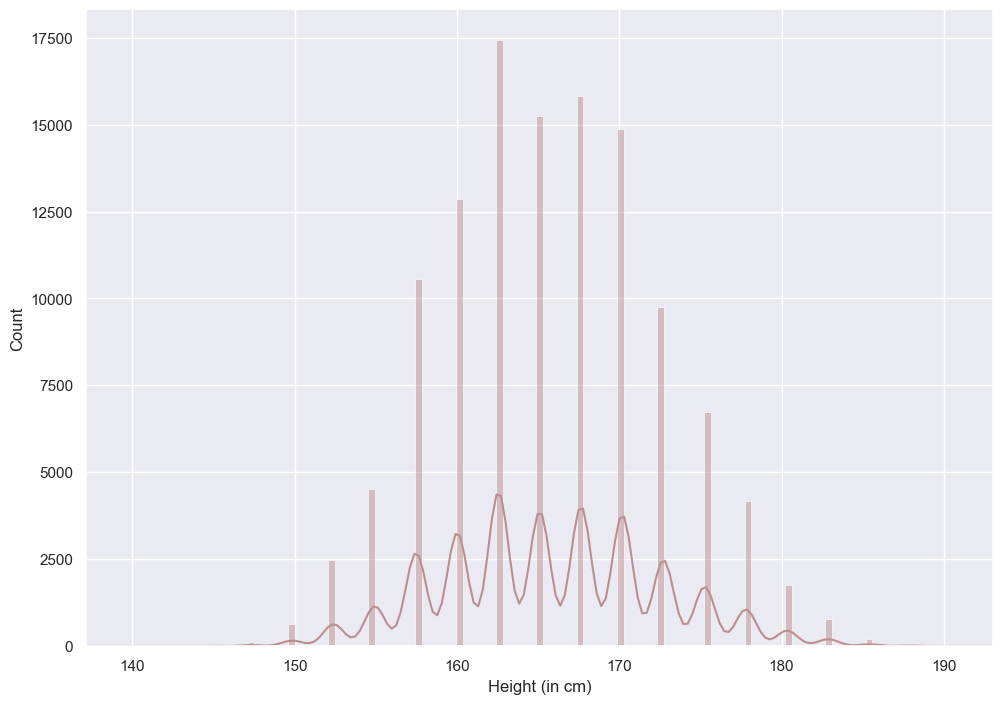

In [27]:
count_plotted = sns.histplot(x = 'height', data = dataframed, kde = True, color = 'rosybrown')
count_plotted.set(xlabel = "Height (in cm)")
count_plotted.set(xlim = (137.1600, 193.0400))

# Outliers : Height

[(137.16, 193.04)]

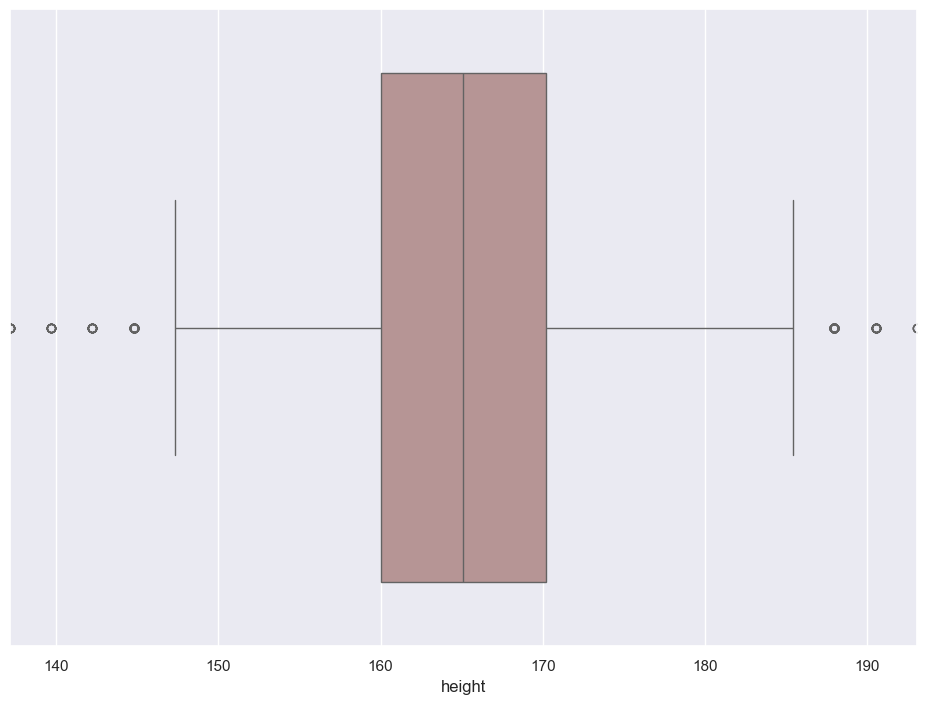

In [28]:
boxxer_plot = sns.boxplot(x = 'height', data = dataframed, color = 'rosybrown')
boxxer_plot.set(xlim = (137.1600, 193.0400))

# How many outliers in Height Column?

In [29]:
numpy_array = np.array(dataframed['height'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 144.7800 or greater than 185.4200
There are 173 outliers.


# Column : Size

# Distribution of rows in terms of Size

[(1.0, 7.0)]

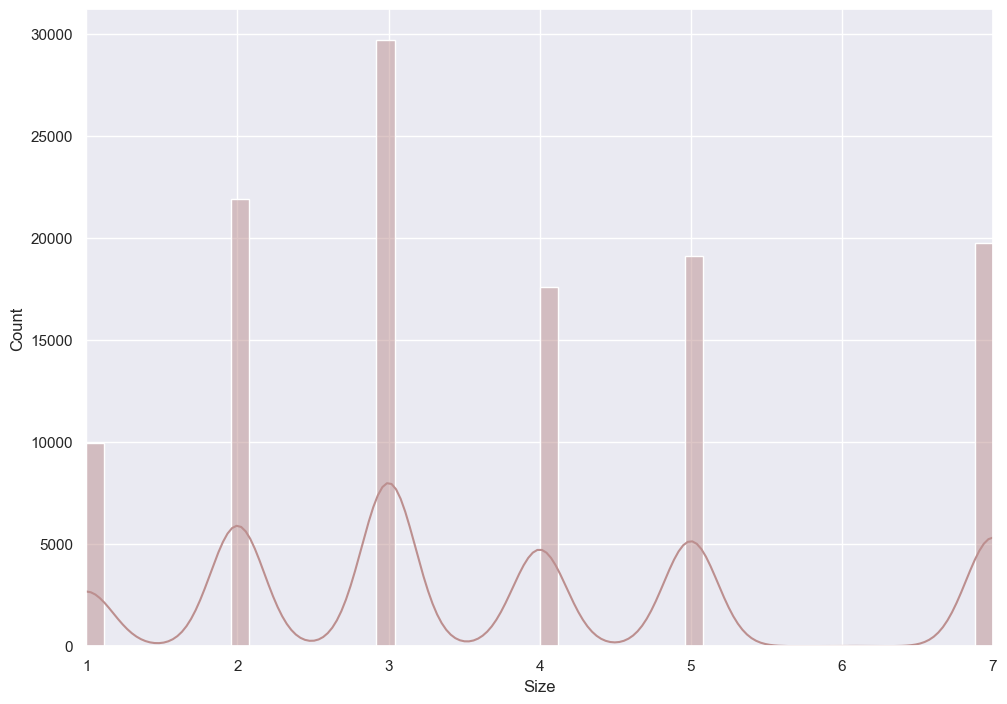

In [30]:
count_plotted = sns.histplot(x = 'size', data = dataframed, kde = True, color = 'rosybrown')
count_plotted.set(xlabel = "Size")
count_plotted.set(xlim = (1.0000, 7.0000))

# Outliers : Size

[(1.0, 7.0)]

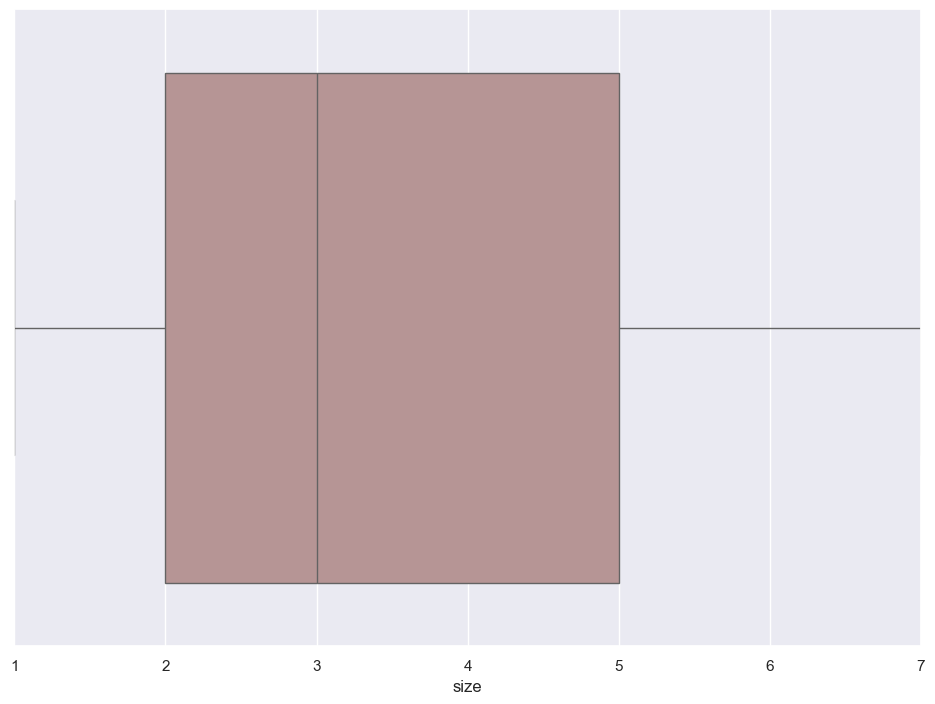

In [31]:
boxxer_plot = sns.boxplot(x = 'size', data = dataframed, color = 'rosybrown')
boxxer_plot.set(xlim = (1.0000, 7.0000))

# How many outliers in Size Column?

In [32]:
numpy_array = np.array(dataframed['size'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values greater than 9.5000
There are 0 outliers.


# Column : BMI

# Distribution of rows in terms of BMI

[(7.8283, 54.3236)]

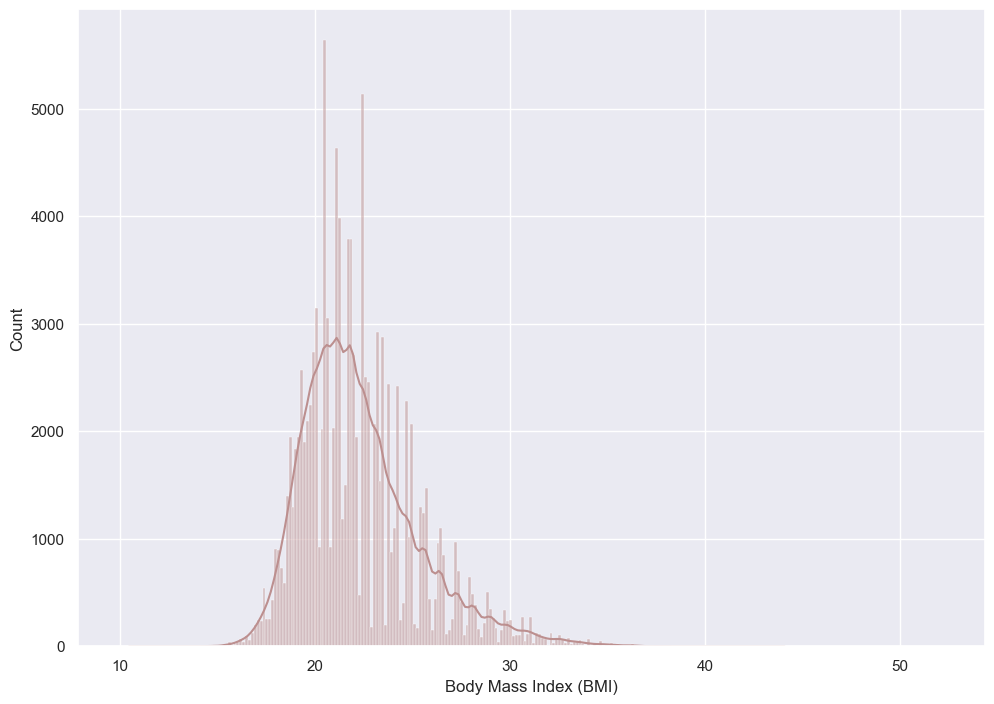

In [33]:
count_plotted = sns.histplot(x = 'bmi', data = dataframed, kde = True, color = 'rosybrown')
count_plotted.set(xlabel = "Body Mass Index (BMI)")
count_plotted.set(xlim = (7.8283, 54.3236))

# Outliers : BMI

[(7.8283, 54.3236)]

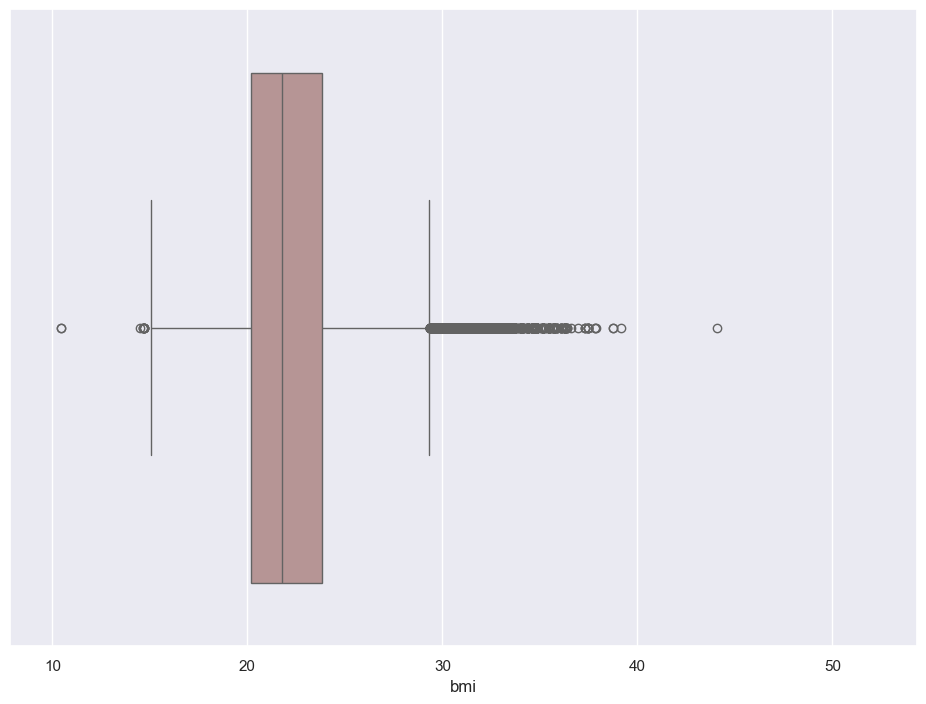

In [34]:
boxxer_plot = sns.boxplot(x = 'bmi', data = dataframed, color = 'rosybrown')
boxxer_plot.set(xlim = (7.8283, 54.3236))

# How many outliers in BMI Column?

In [35]:
numpy_array = np.array(dataframed['bmi'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 14.7016 or greater than 29.3236
There are 3430 outliers.


# Types of Rows : XXS Clothing Size Samples

# Column : Weight (in kgs)

# Distribution of rows in terms of Weight

[(22.0, 136.0)]

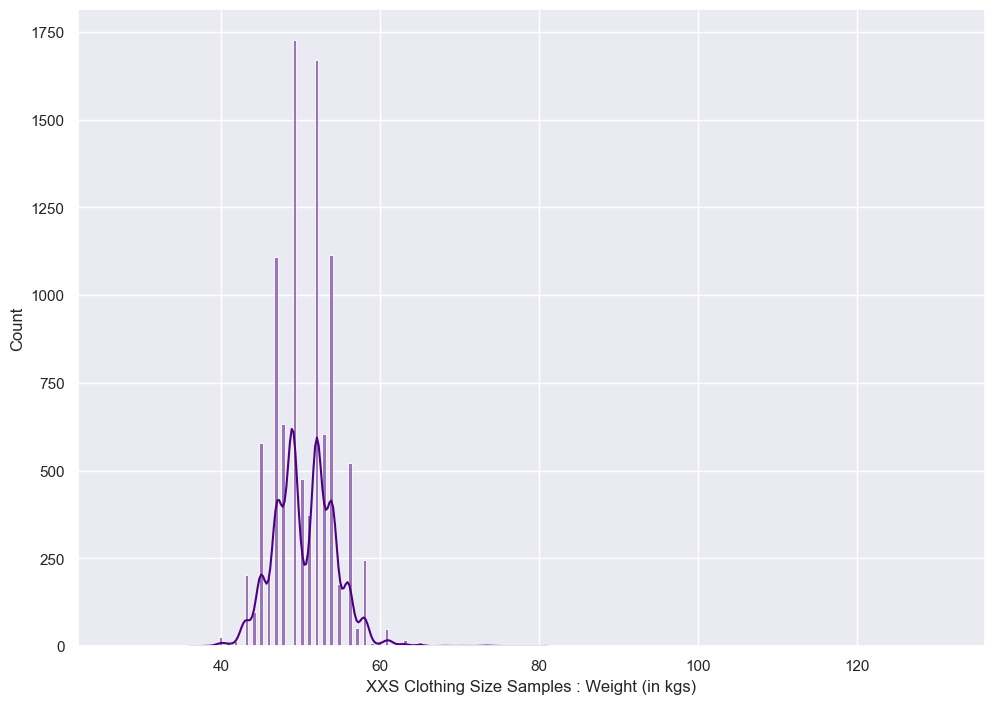

In [36]:
count_plotted = sns.histplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 1], kde = True, color = 'indigo')
count_plotted.set(xlabel = "XXS Clothing Size Samples : Weight (in kgs)")
count_plotted.set(xlim = (22.0000,136.0000))

# Outliers : Weight

[Text(0.5, 0, 'XXS Clothing Size Samples : Weight (in kgs)')]

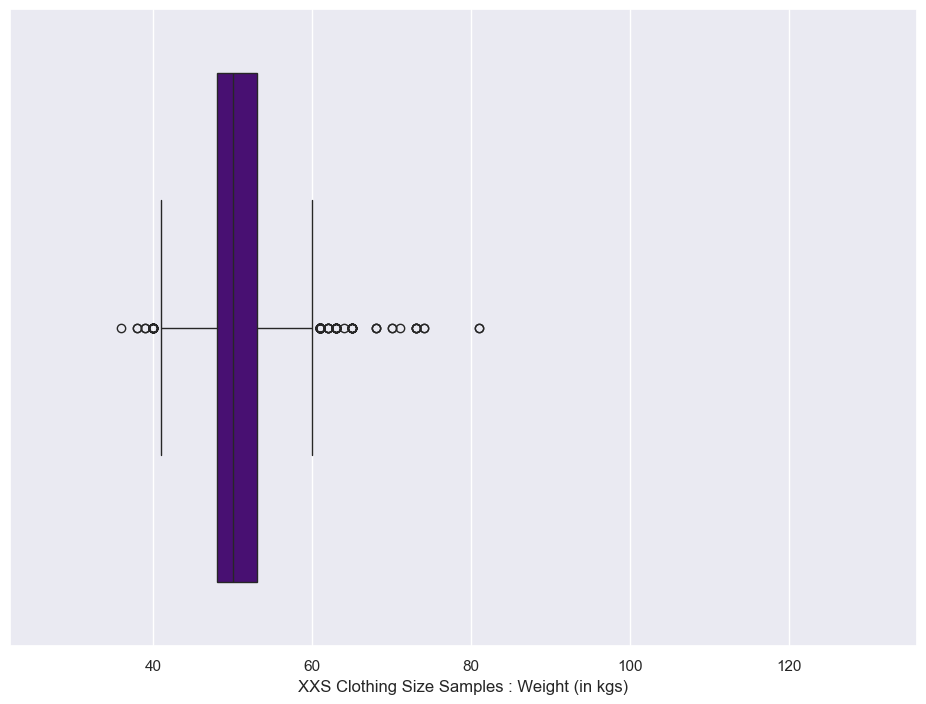

In [37]:
boxxer_plot = sns.boxplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 1], color = 'indigo')
boxxer_plot.set(xlim = (22.0000,136.0000))
boxxer_plot.set(xlabel = "XXS Clothing Size Samples : Weight (in kgs)")

# How many outliers in Weight Column?

In [38]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 1]['weight'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 40.5000 or greater than 60.5000
There are 130 outliers.


# Column : Age

# Distribution of rows in terms of Age

[(0.0, 117.0)]

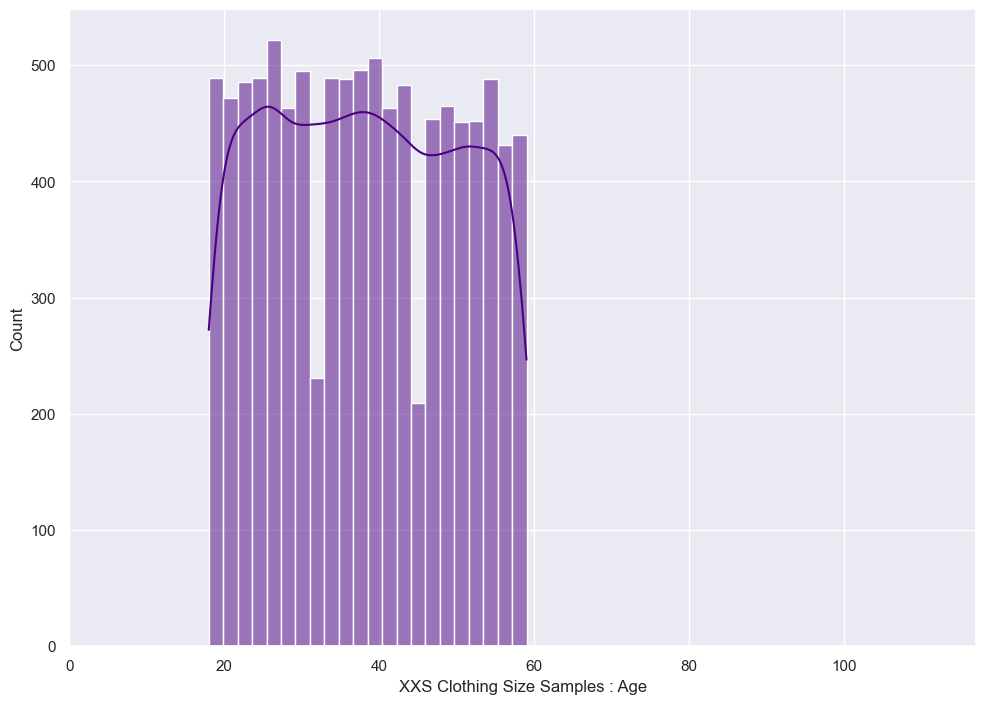

In [39]:
count_plotted = sns.histplot(x = 'age', data = dataframed.loc[dataframed['size'] == 1], kde = True, color = 'indigo')
count_plotted.set(xlabel = "XXS Clothing Size Samples : Age")
count_plotted.set(xlim = (0.0000, 117.0000))

# Outliers : Age

[Text(0.5, 0, 'XXS Clothing Size Samples : Age')]

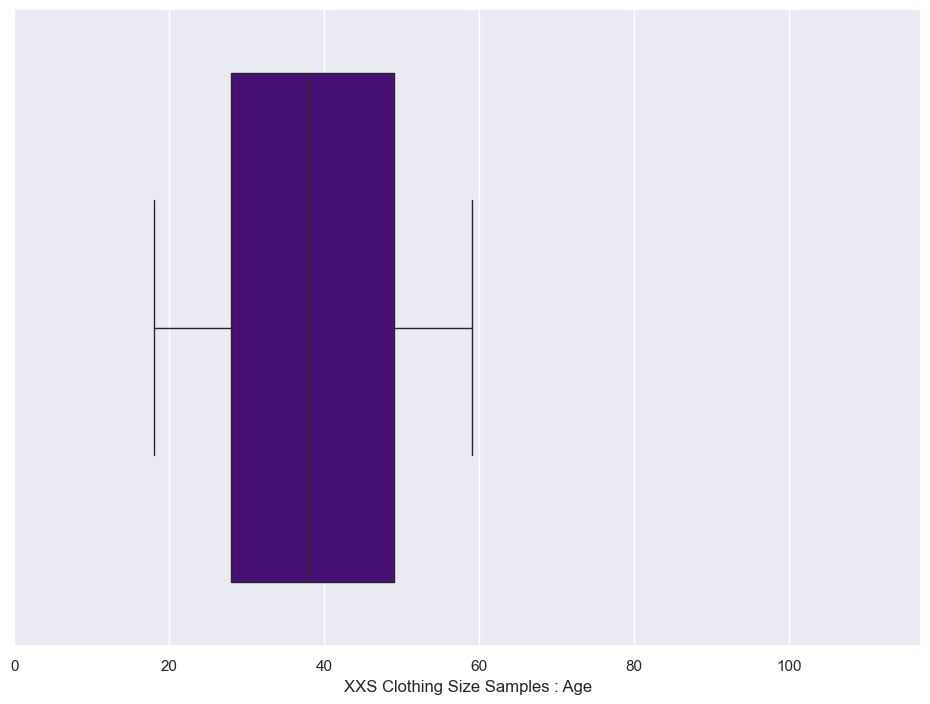

In [40]:
boxxer_plot = sns.boxplot(x = 'age', data = dataframed.loc[dataframed['size'] == 1], color = 'indigo')
boxxer_plot.set(xlim = (0.0000, 117.0000))
boxxer_plot.set(xlabel = "XXS Clothing Size Samples : Age")

# How many outliers in Age Column?

In [41]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 1]['age'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -3.5000 or greater than 80.5000
There are 0 outliers.


# Column : Height (in cm)

# Distribution of rows in terms of Height

[(137.16, 193.04)]

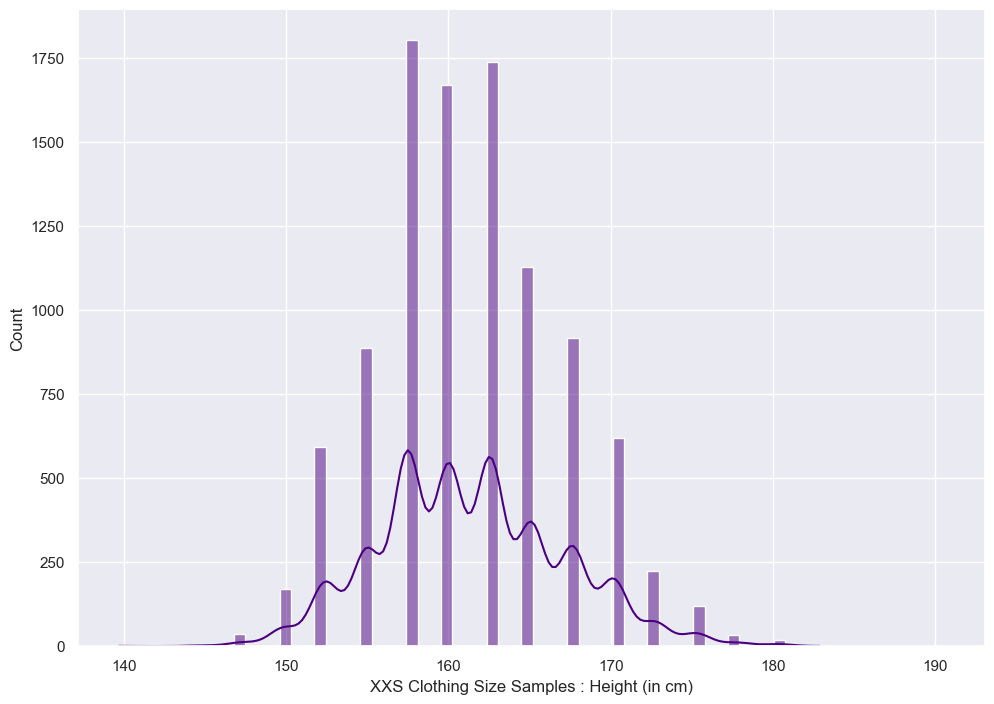

In [42]:
count_plotted = sns.histplot(x = 'height', data = dataframed.loc[dataframed['size'] == 1], kde = True, color = 'indigo')
count_plotted.set(xlabel = "XXS Clothing Size Samples : Height (in cm)")
count_plotted.set(xlim = (137.1600, 193.0400))

# Outliers : Height

[Text(0.5, 0, 'XXS Clothing Size Samples : Height (in cm)')]

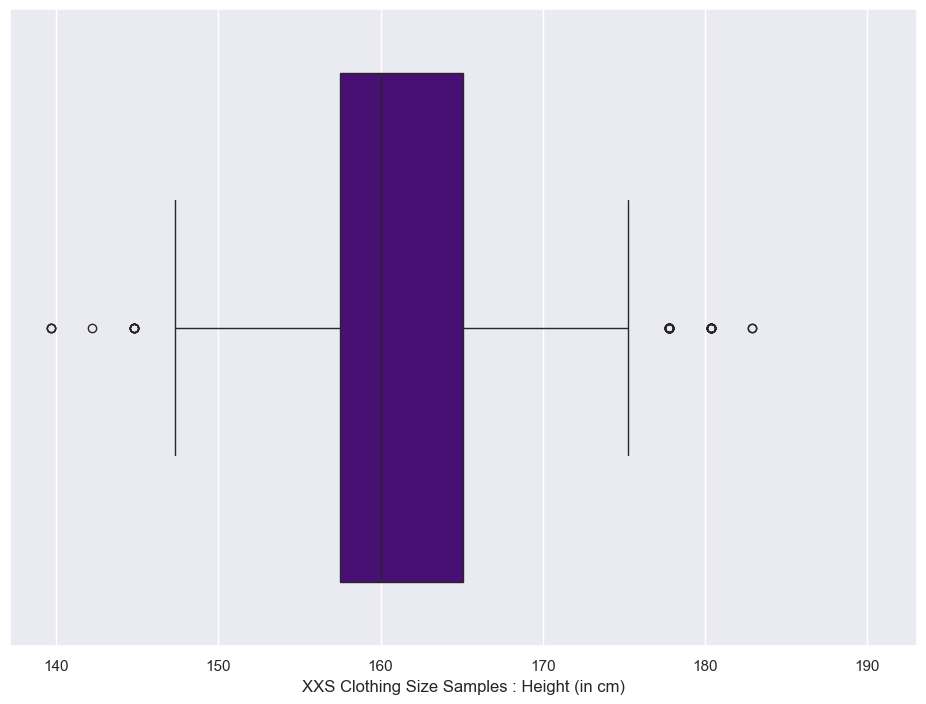

In [43]:
boxxer_plot = sns.boxplot(x = 'height', data = dataframed.loc[dataframed['size'] == 1], color = 'indigo')
boxxer_plot.set(xlim = (137.1600, 193.0400))
boxxer_plot.set(xlabel = "XXS Clothing Size Samples : Height (in cm)")

# How many outliers in Height Column?

In [44]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 1]['height'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 146.0500 or greater than 176.5300
There are 65 outliers.


# Column : Size

# Distribution of rows in terms of Size

[(1.0, 7.0)]

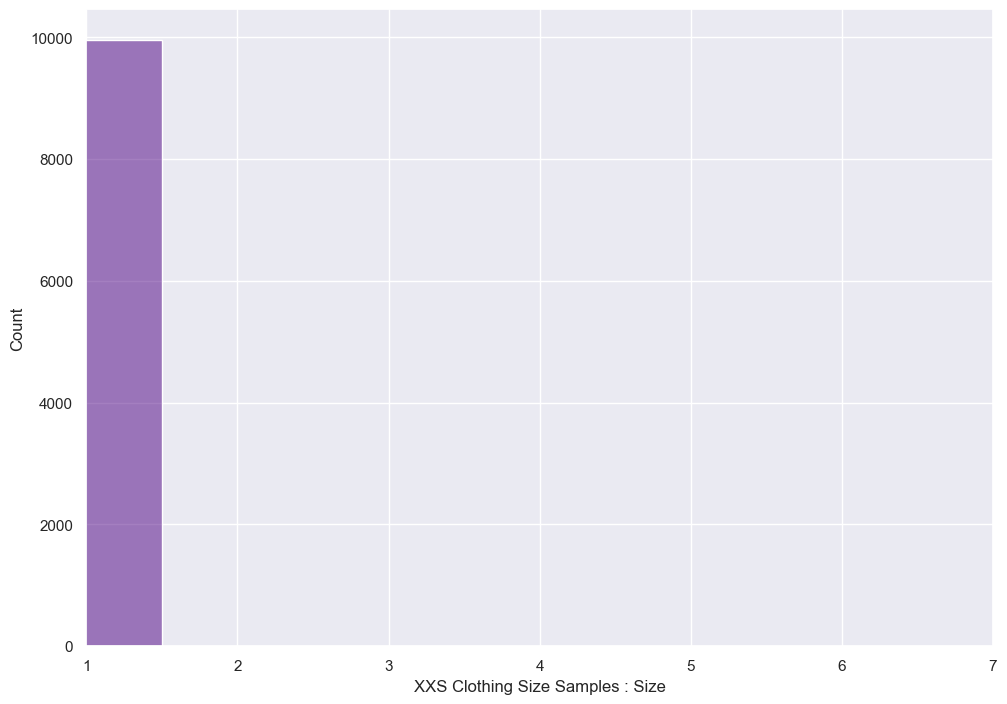

In [45]:
count_plotted = sns.histplot(x = 'size', data = dataframed.loc[dataframed['size'] == 1], kde = True, color = 'indigo')
count_plotted.set(xlabel = "XXS Clothing Size Samples : Size")
count_plotted.set(xlim = (1.0000, 7.0000))

# Outliers : Size

[Text(0.5, 0, 'XXS Clothing Size Samples : Size')]

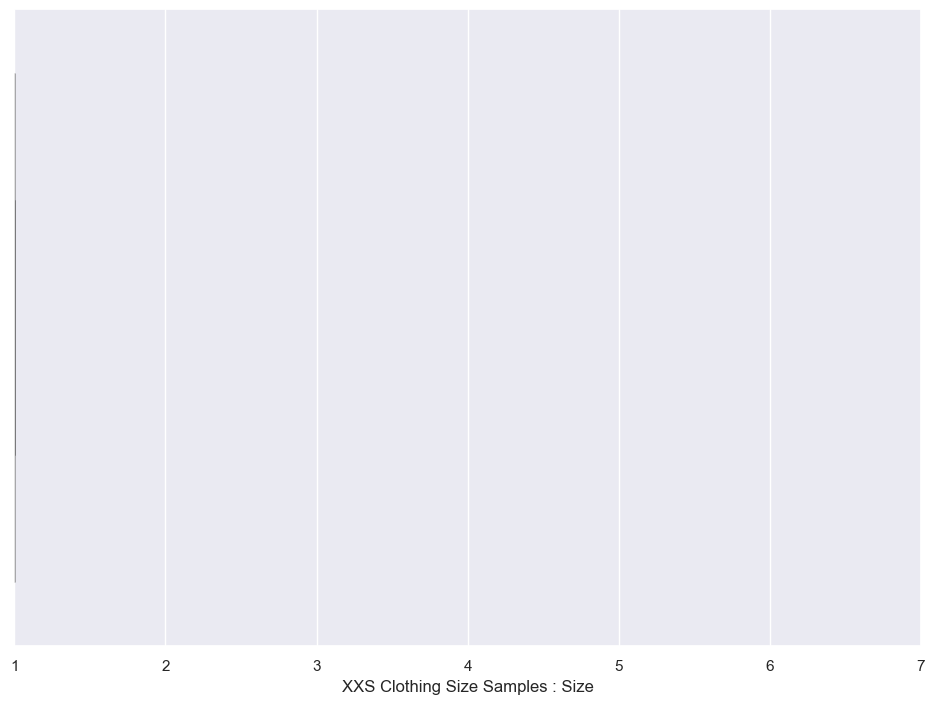

In [46]:
boxxer_plot = sns.boxplot(x = 'size', data = dataframed.loc[dataframed['size'] == 1], color = 'indigo')
boxxer_plot.set(xlim = (1.0000, 7.0000))
boxxer_plot.set(xlabel = "XXS Clothing Size Samples : Size")

# How many outliers in Size Column?

In [47]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 1]['size'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 1.0000 or greater than 1.0000
There are 0 outliers.


# Column : BMI

# Distribution of rows in terms of BMI

[(7.8283, 54.3236)]

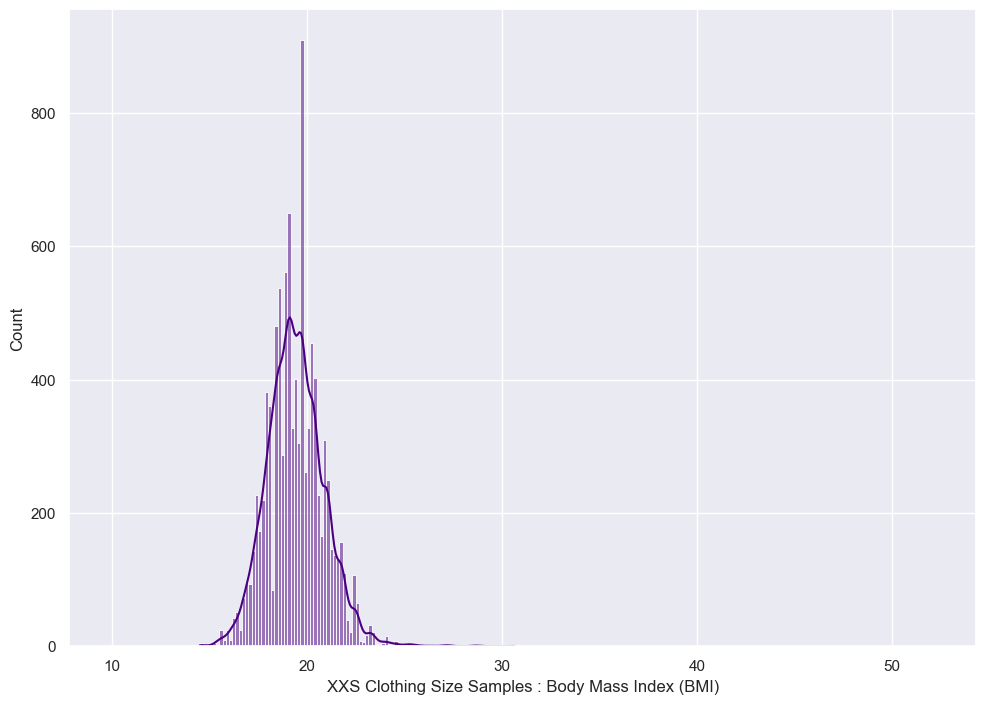

In [48]:
count_plotted = sns.histplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 1], kde = True, color = 'indigo')
count_plotted.set(xlabel = "XXS Clothing Size Samples : Body Mass Index (BMI)")
count_plotted.set(xlim = (7.8283, 54.3236))

# Outliers : BMI

[Text(0.5, 0, 'XXS Clothing Size Samples : Body Mass Index (BMI)')]

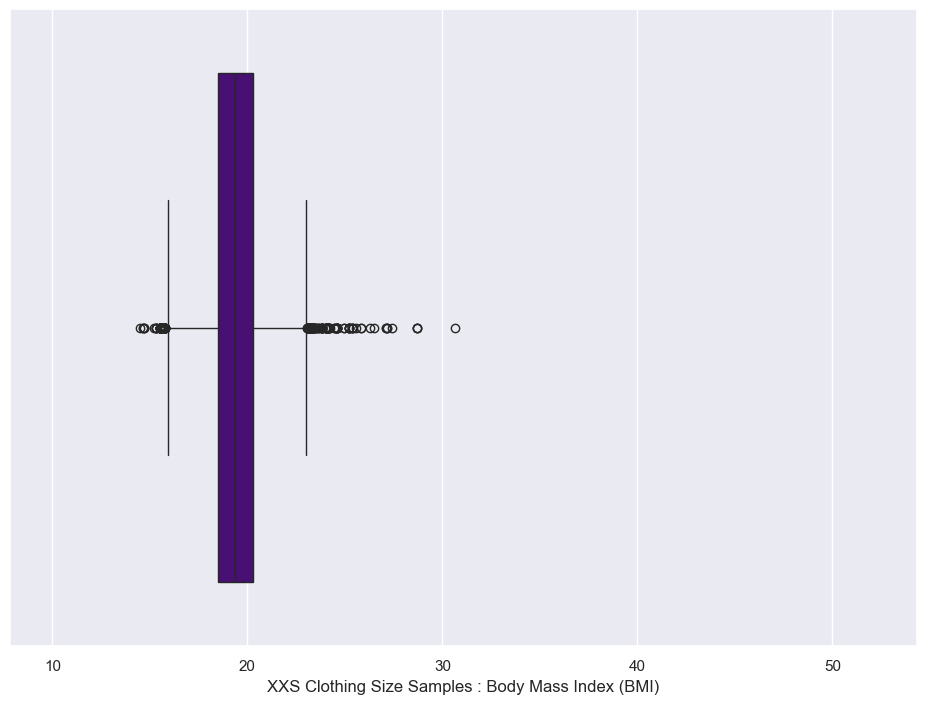

In [49]:
boxxer_plot = sns.boxplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 1], color = 'indigo')
boxxer_plot.set(xlim = (7.8283, 54.3236))
boxxer_plot.set(xlabel = "XXS Clothing Size Samples : Body Mass Index (BMI)")

# How many outliers in BMI Column?

In [50]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 1]['bmi'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 15.7970 or greater than 23.0137
There are 176 outliers.


# Types of Rows : S Clothing Size Samples

# Column : Weight (in kgs)

# Distribution of rows in terms of Weight

[(22.0, 136.0)]

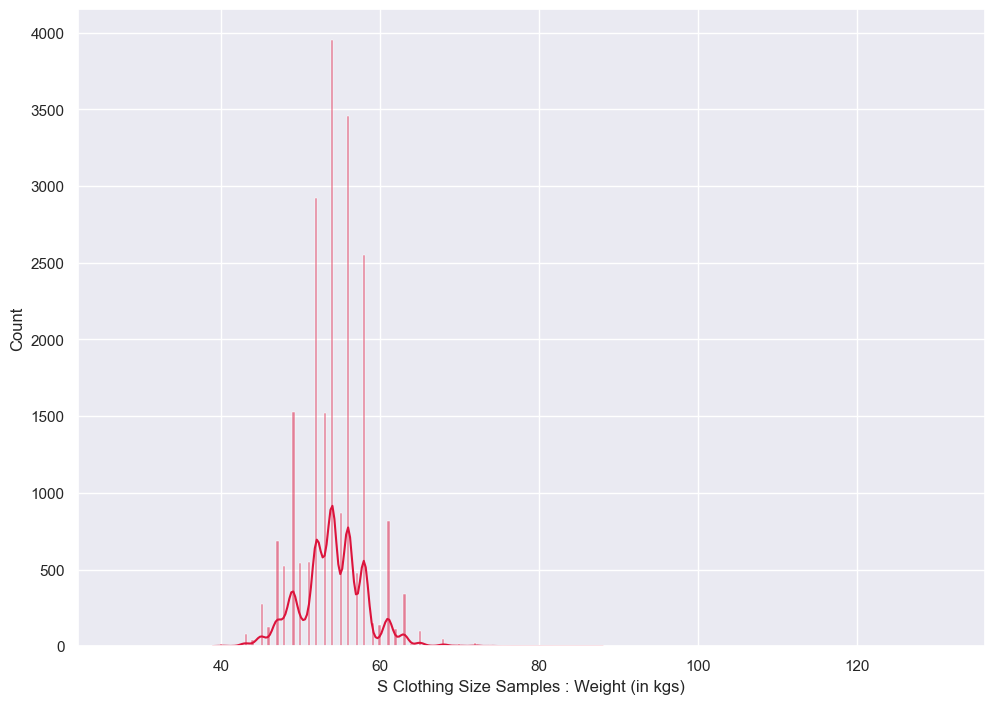

In [51]:
count_plotted = sns.histplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 2], kde = True, color = 'crimson')
count_plotted.set(xlabel = "S Clothing Size Samples : Weight (in kgs)")
count_plotted.set(xlim = (22.0000, 136.0000))

# Outliers : Weight

[Text(0.5, 0, 'S Clothing Size Samples : Weight (in kgs)')]

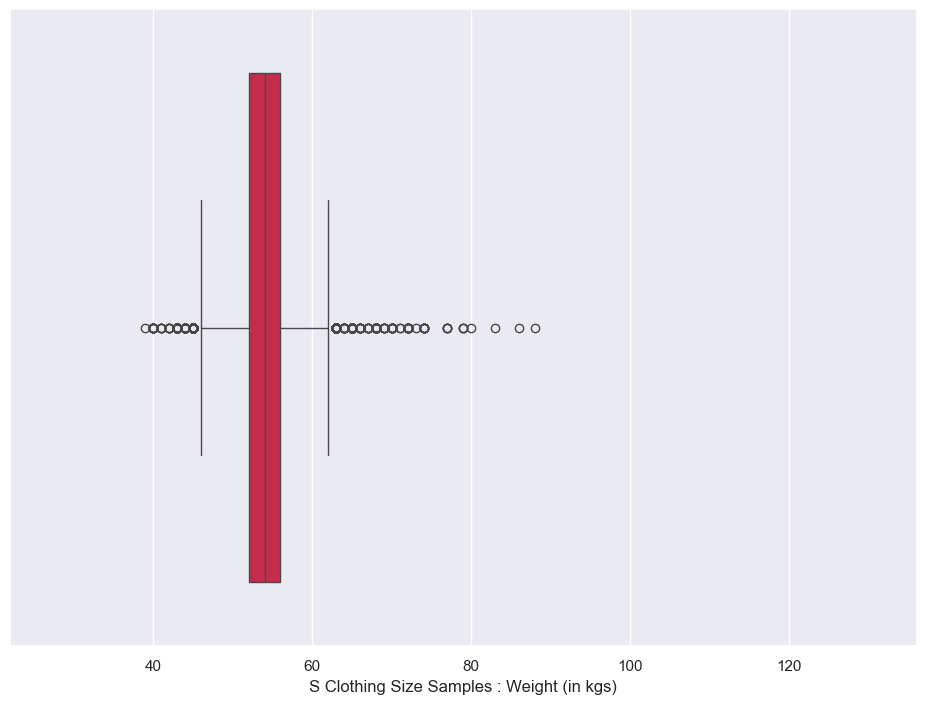

In [52]:
boxxer_plot = sns.boxplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 2], color = 'crimson')
boxxer_plot.set(xlim = (22.0000, 136.0000))
boxxer_plot.set(xlabel = "S Clothing Size Samples : Weight (in kgs)")

# How many outliers in Weight Column?

In [53]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 2]['weight'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 46.0000 or greater than 62.0000
There are 997 outliers.


# Column : Age

# Distribution of rows in terms of Age

[(0.0, 117.0)]

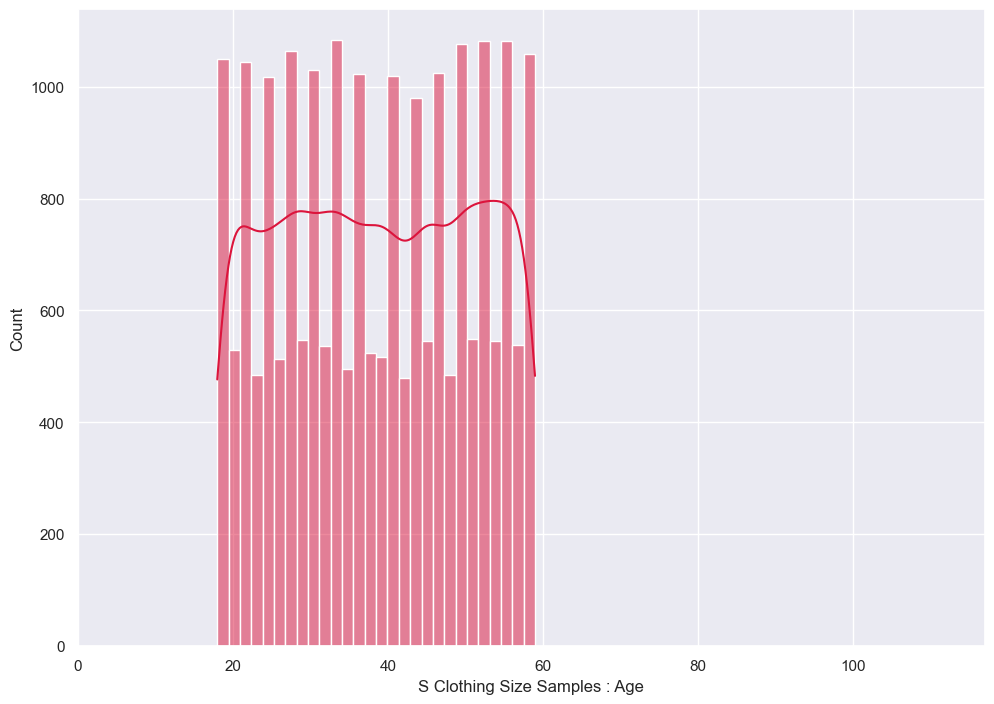

In [54]:
count_plotted = sns.histplot(x = 'age', data = dataframed.loc[dataframed['size'] == 2], kde = True, color = 'crimson')
count_plotted.set(xlabel = "S Clothing Size Samples : Age")
count_plotted.set(xlim = (0.0000, 117.0000))

# Outliers : Age

[Text(0.5, 0, 'S Clothing Size Samples : Age')]

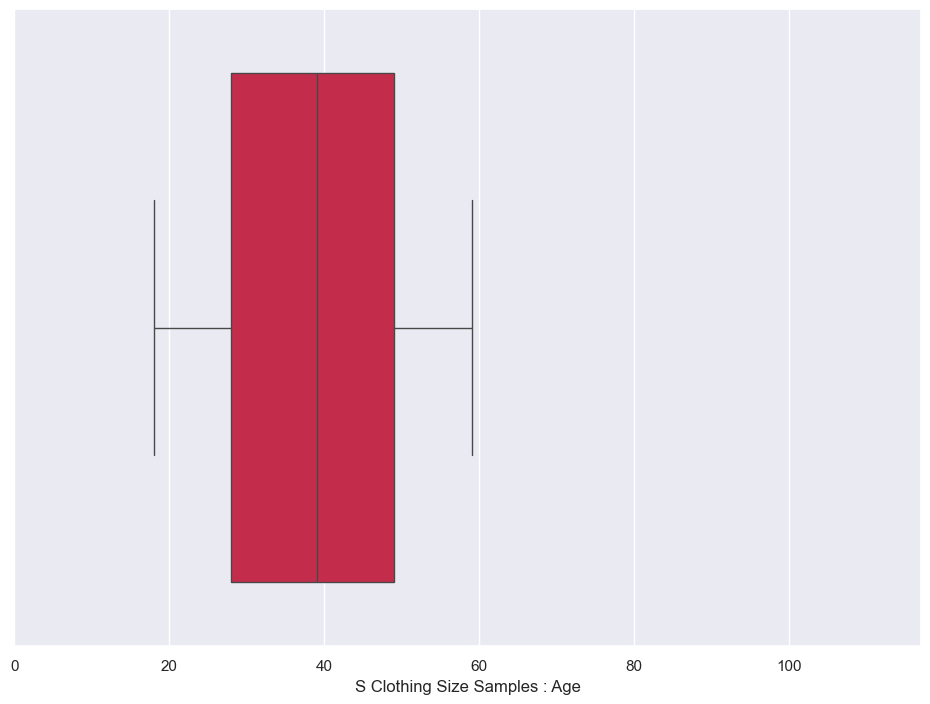

In [55]:
boxxer_plot = sns.boxplot(x = 'age', data = dataframed.loc[dataframed['size'] == 2], color = 'crimson')
boxxer_plot.set(xlim = (0.0000, 117.0000))
boxxer_plot.set(xlabel = "S Clothing Size Samples : Age")

# How many outliers in Age Column?

In [56]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 2]['age'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -3.5000 or greater than 80.5000
There are 0 outliers.


# Column : Height (in cm)

# Distribution of rows in terms of Height

[(137.16, 193.04)]

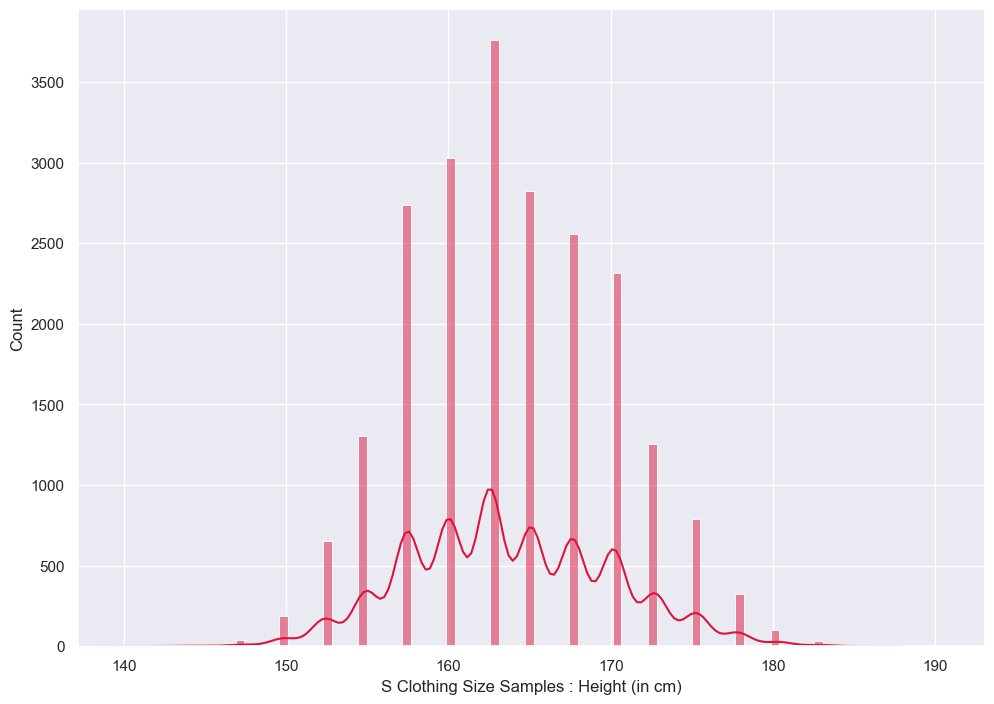

In [57]:
count_plotted = sns.histplot(x = 'height', data = dataframed.loc[dataframed['size'] == 2], kde = True, color = 'crimson')
count_plotted.set(xlabel = "S Clothing Size Samples : Height (in cm)")
count_plotted.set(xlim = (137.1600, 193.0400))

# Outliers : Height

[Text(0.5, 0, 'S Clothing Size Samples : Height (in cm)')]

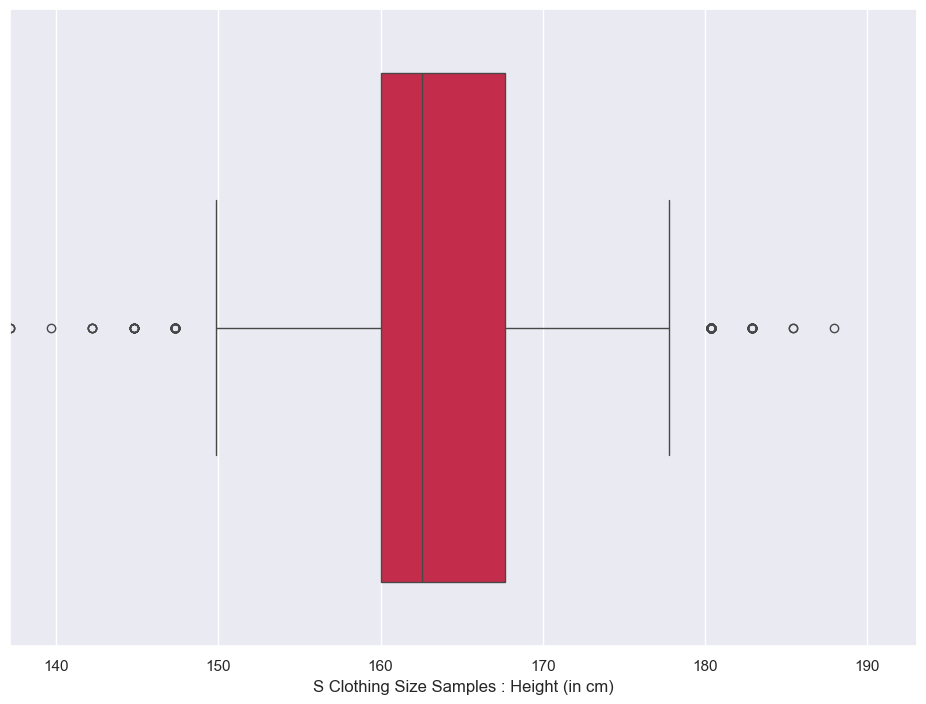

In [58]:
boxxer_plot = sns.boxplot(x = 'height', data = dataframed.loc[dataframed['size'] == 2], color = 'crimson')
boxxer_plot.set(xlim = (137.1600, 193.0400))
boxxer_plot.set(xlabel = "S Clothing Size Samples : Height (in cm)")

# How many outliers in Height Column?

In [59]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 2]['height'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 148.5900 or greater than 179.0700
There are 189 outliers.


# Column : Size

# Distribution of rows in terms of Size

[(1.0, 7.0)]

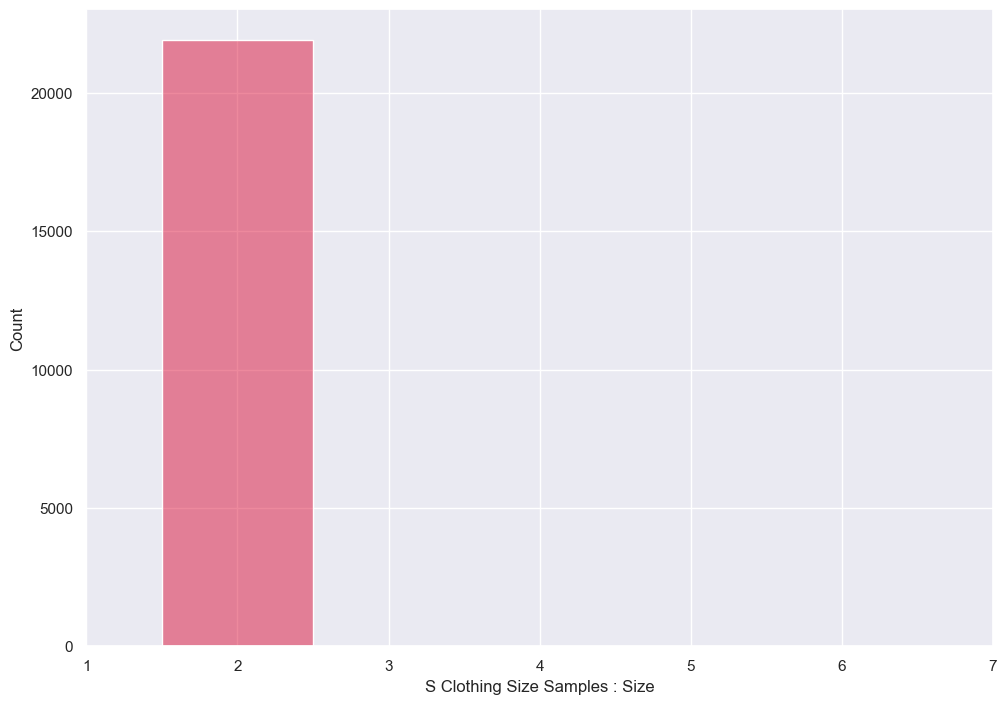

In [60]:
count_plotted = sns.histplot(x = 'size', data = dataframed.loc[dataframed['size'] == 2], kde = True, color = 'crimson')
count_plotted.set(xlabel = "S Clothing Size Samples : Size")
count_plotted.set(xlim = (1.0000, 7.0000))

# Outliers : Size

[Text(0.5, 0, 'S Clothing Size Samples : Size')]

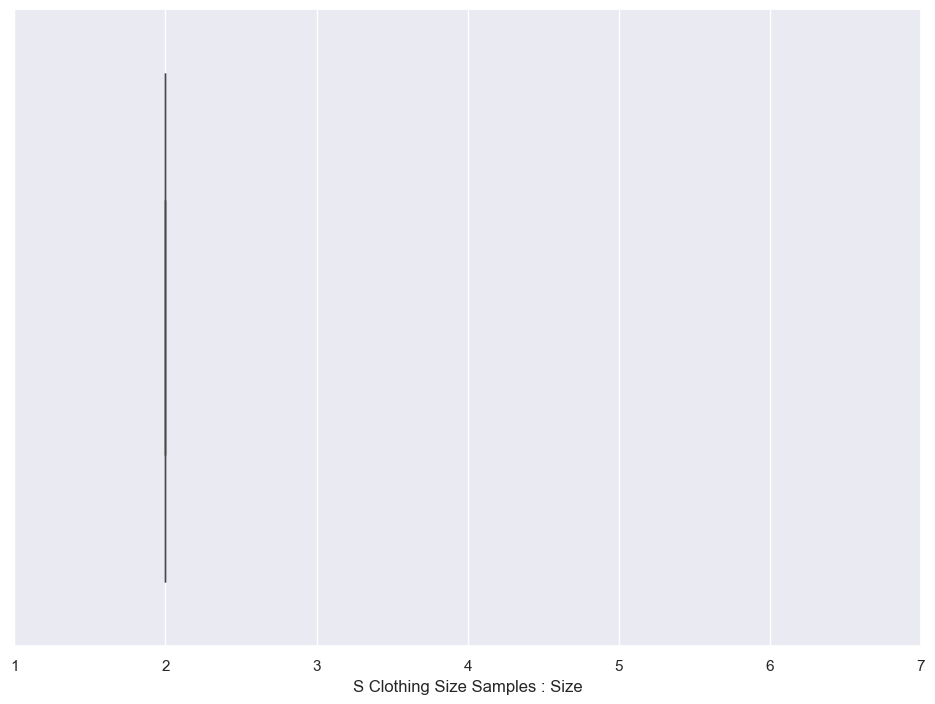

In [61]:
boxxer_plot = sns.boxplot(x = 'size', data = dataframed.loc[dataframed['size'] == 2], color = 'crimson')
boxxer_plot.set(xlim = (1.0000, 7.0000))
boxxer_plot.set(xlabel = "S Clothing Size Samples : Size")

# How many outliers in Size Column?

In [62]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 2]['size'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 2.0000 or greater than 2.0000
There are 0 outliers.


# Column : BMI

# Distribution of rows in terms of BMI

[(7.8283, 54.3236)]

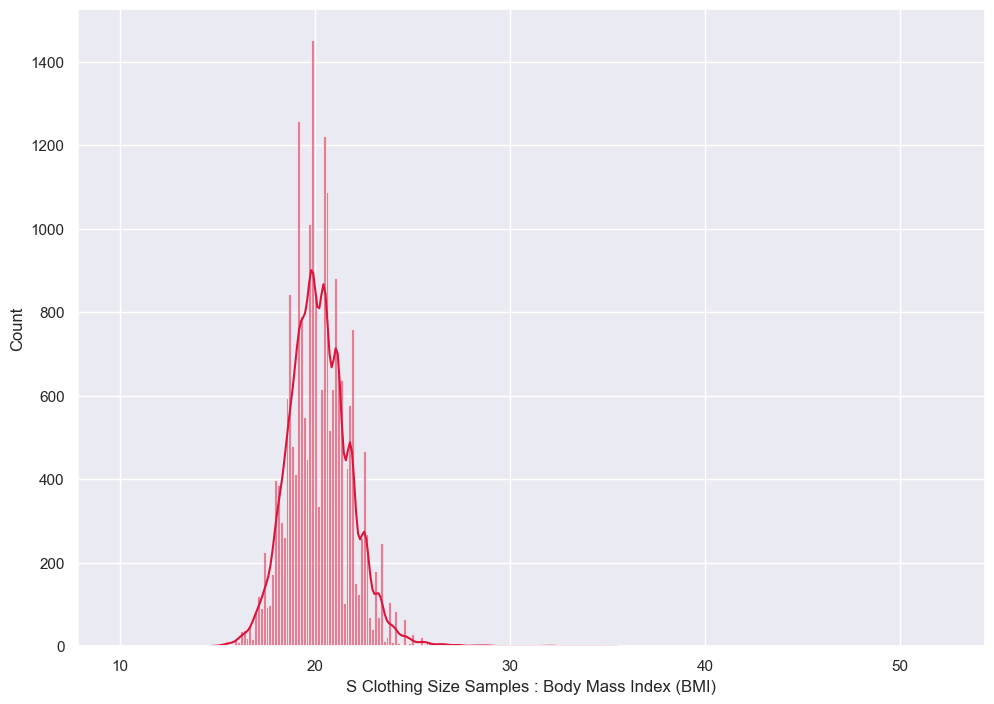

In [63]:
count_plotted = sns.histplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 2], kde = True, color = 'crimson')
count_plotted.set(xlabel = "S Clothing Size Samples : Body Mass Index (BMI)")
count_plotted.set(xlim = (7.8283, 54.3236))

# Outliers : BMI

[Text(0.5, 0, 'S Clothing Size Samples : Body Mass Index (BMI)')]

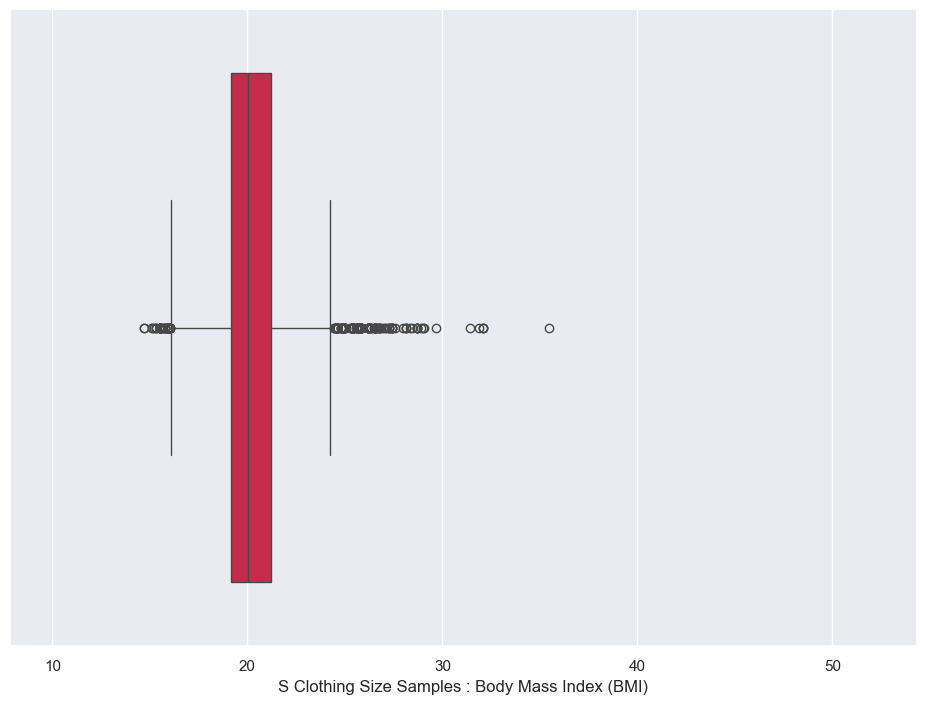

In [64]:
boxxer_plot = sns.boxplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 2], color = 'crimson')
boxxer_plot.set(xlim = (7.8283, 54.3236))
boxxer_plot.set(xlabel = "S Clothing Size Samples : Body Mass Index (BMI)")

# How many outliers in BMI Column?

In [65]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 2]['bmi'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 16.0524 or greater than 24.2749
There are 262 outliers.


# Types of Rows : M Clothing Size Samples

# Column : Weight (in kgs)

# Distribution of rows in terms of Weight

[(22.0, 136.0)]

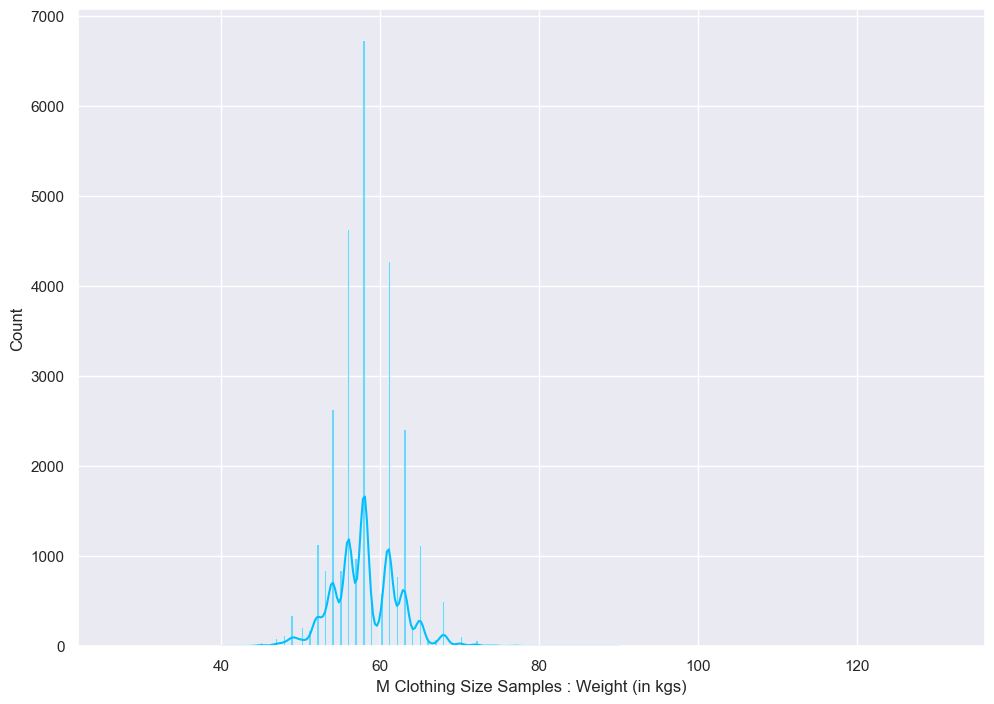

In [66]:
count_plotted = sns.histplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 3], kde = True, color = 'deepskyblue')
count_plotted.set(xlabel = "M Clothing Size Samples : Weight (in kgs)")
count_plotted.set(xlim = (22.0000, 136.0000))

# Outliers : Weight

[Text(0.5, 0, 'M Clothing Size Samples : Weight (in kgs)')]

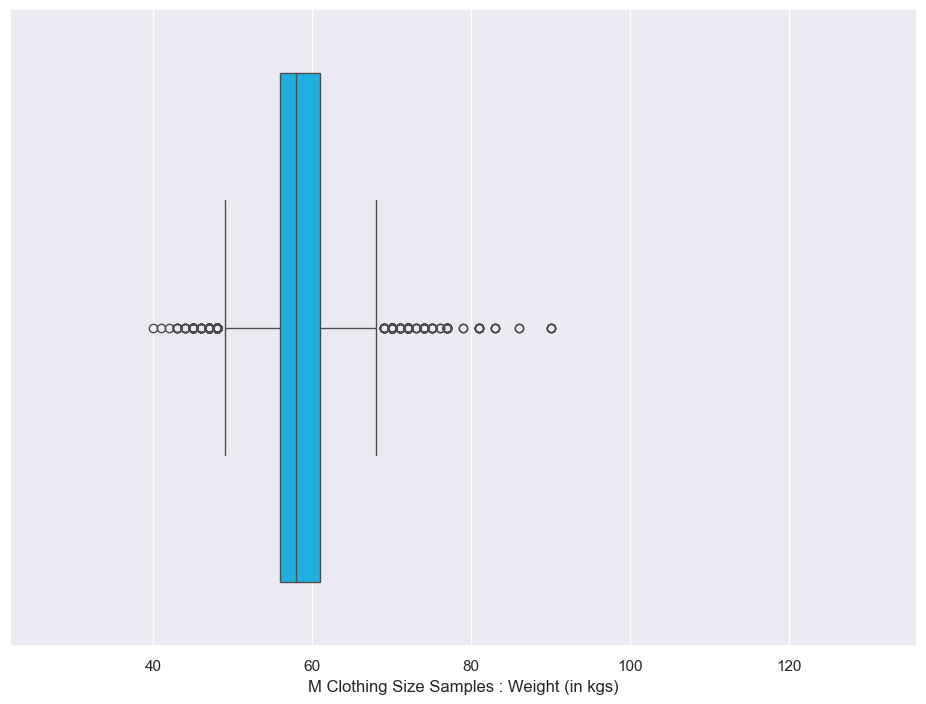

In [67]:
boxxer_plot = sns.boxplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 3], color = 'deepskyblue')
boxxer_plot.set(xlim = (22.0000, 136.0000))
boxxer_plot.set(xlabel = "M Clothing Size Samples : Weight (in kgs)")

# How many outliers in Weight Column?

In [68]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 3]['weight'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 48.5000 or greater than 68.5000
There are 575 outliers.


# Column : Age

# Distribution of rows in terms of Age

[(0.0, 117.0)]

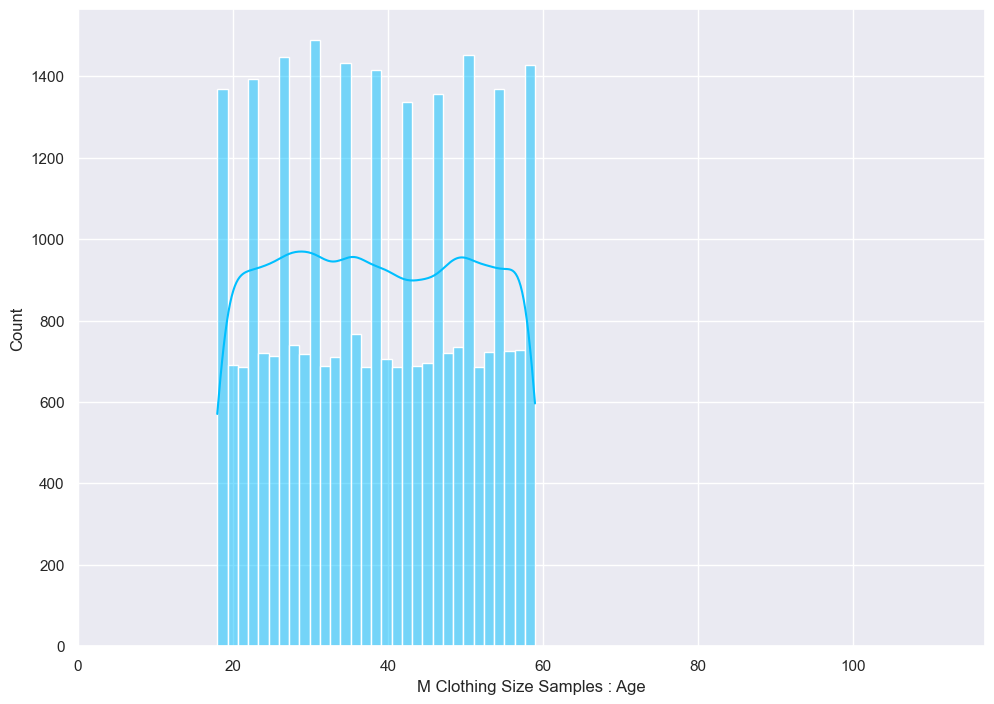

In [69]:
count_plotted = sns.histplot(x = 'age', data = dataframed.loc[dataframed['size'] == 3], kde = True, color = 'deepskyblue')
count_plotted.set(xlabel = "M Clothing Size Samples : Age")
count_plotted.set(xlim = (0.0000, 117.0000))

# Outliers : Age

[Text(0.5, 0, 'M Clothing Size Samples : Age')]

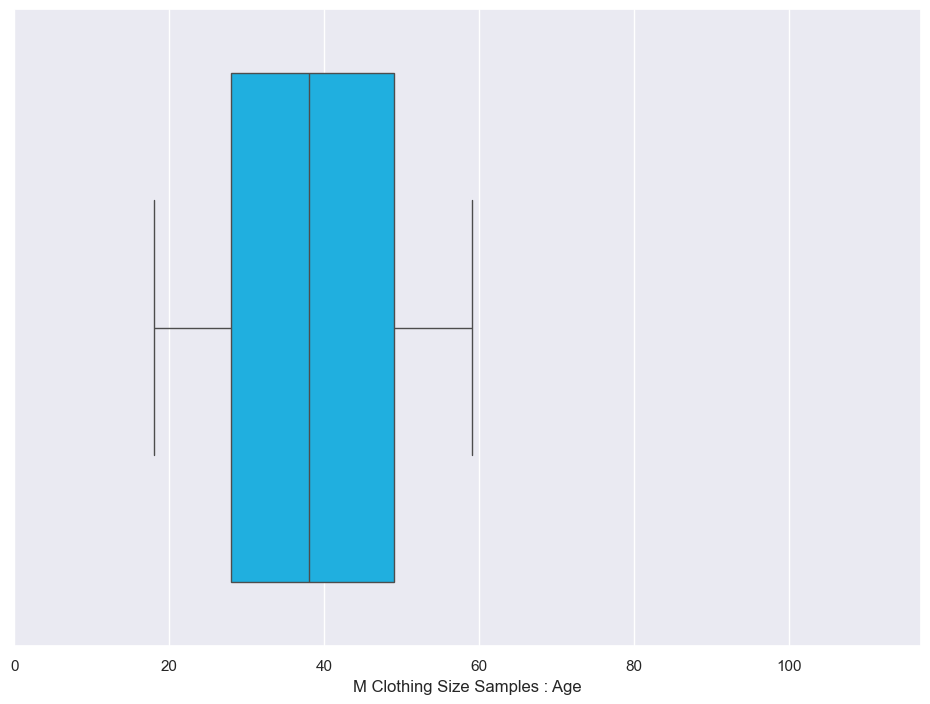

In [70]:
boxxer_plot = sns.boxplot(x = 'age', data = dataframed.loc[dataframed['size'] == 3], color = 'deepskyblue')
boxxer_plot.set(xlim = (0.0000, 117.0000))
boxxer_plot.set(xlabel = "M Clothing Size Samples : Age")

# How many outliers in Age Column?

In [71]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 3]['age'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -3.5000 or greater than 80.5000
There are 0 outliers.


# Column : Height (in cm)

# Distribution of rows in terms of Height

[(137.16, 193.04)]

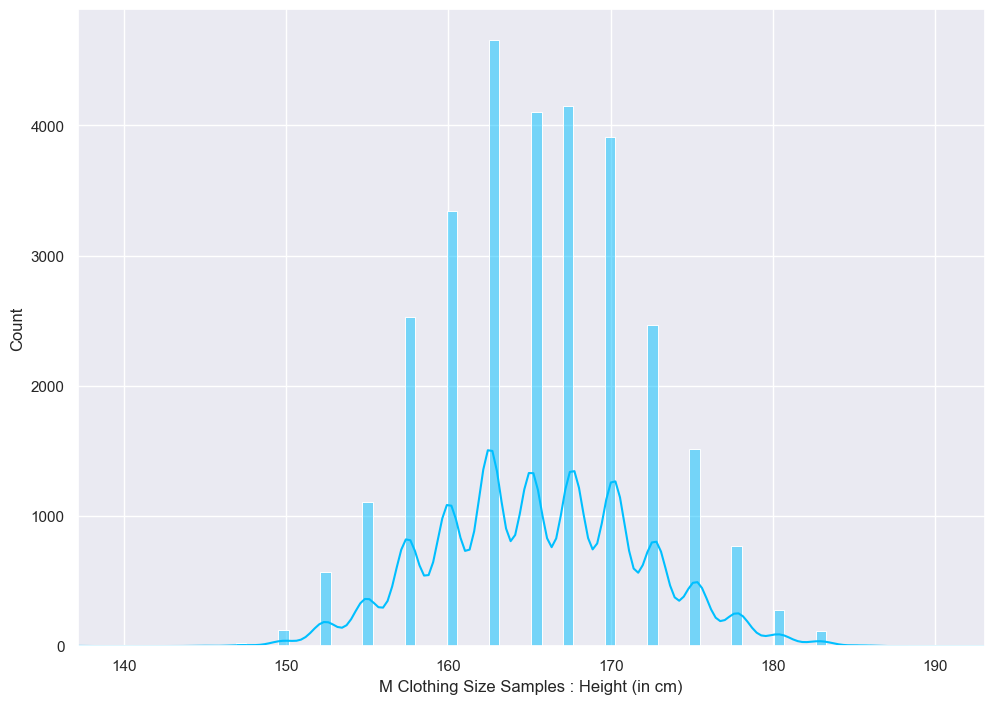

In [72]:
count_plotted = sns.histplot(x = 'height', data = dataframed.loc[dataframed['size'] == 3], kde = True, color = 'deepskyblue')
count_plotted.set(xlabel = "M Clothing Size Samples : Height (in cm)")
count_plotted.set(xlim = (137.1600, 193.0400))

# Outliers : Height

[Text(0.5, 0, 'M Clothing Size Samples : Height (in cm)')]

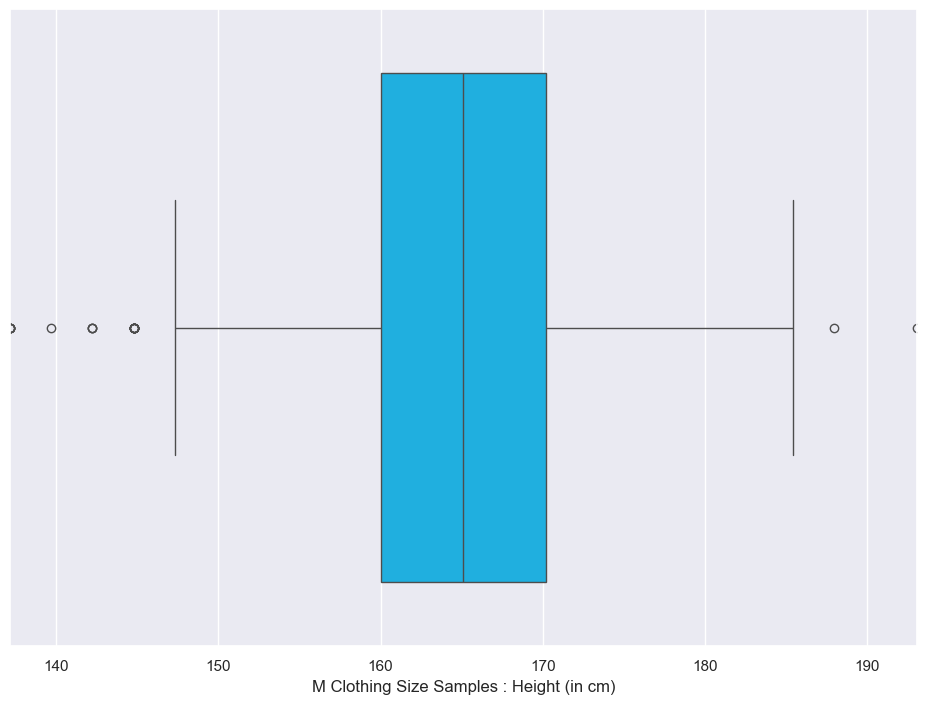

In [73]:
boxxer_plot = sns.boxplot(x = 'height', data = dataframed.loc[dataframed['size'] == 3], color = 'deepskyblue')
boxxer_plot.set(xlim = (137.1600, 193.0400))
boxxer_plot.set(xlabel = "M Clothing Size Samples : Height (in cm)")

# How many outliers in Height Column?

In [74]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 3]['height'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 144.7800 or greater than 185.4200
There are 22 outliers.


# Column : Size

# Distribution of rows in terms of Size

[(1.0, 7.0)]

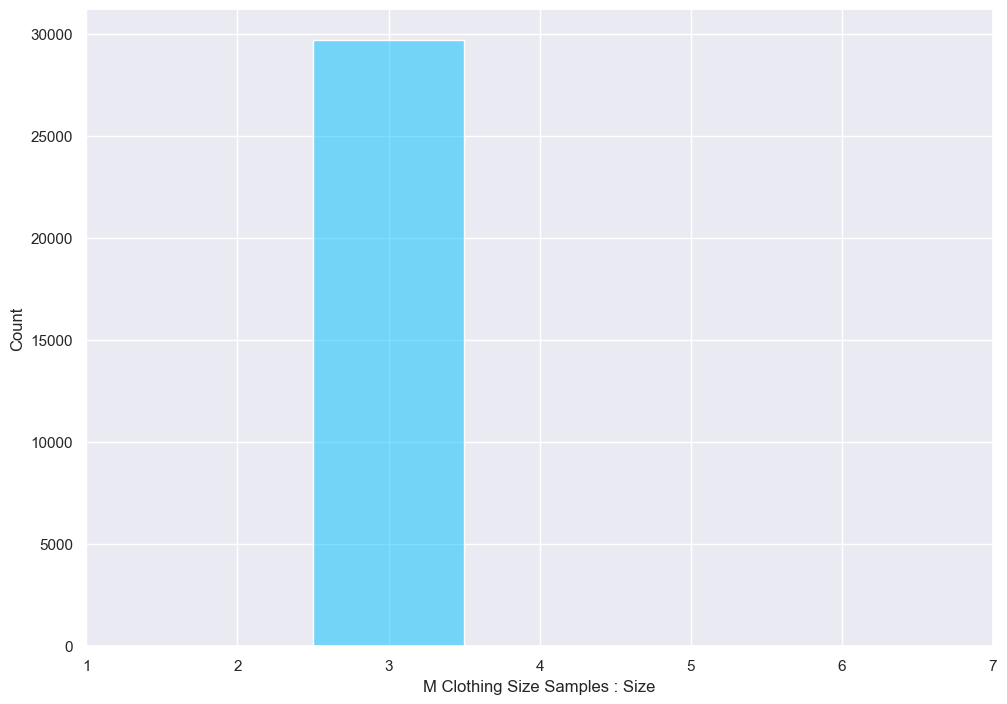

In [75]:
count_plotted = sns.histplot(x = 'size', data = dataframed.loc[dataframed['size'] == 3], kde = True, color = 'deepskyblue')
count_plotted.set(xlabel = "M Clothing Size Samples : Size")
count_plotted.set(xlim = (1.0000, 7.0000))

# Outliers : Size

[Text(0.5, 0, 'M Clothing Size Samples : Size')]

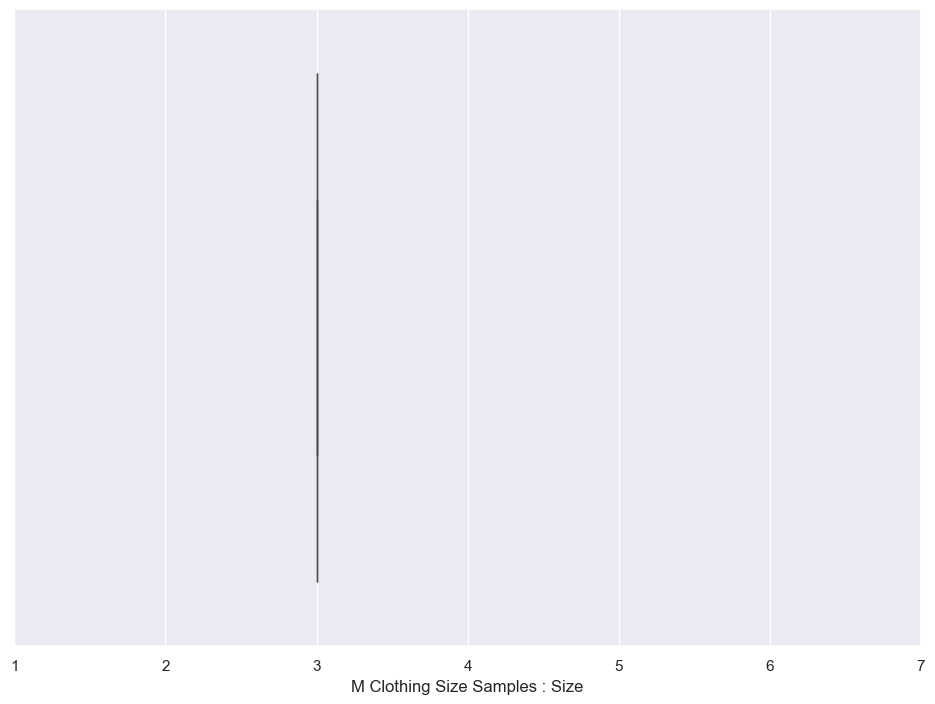

In [76]:
boxxer_plot = sns.boxplot(x = 'size', data = dataframed.loc[dataframed['size'] == 3], color = 'deepskyblue')
boxxer_plot.set(xlim = (1.0000, 7.0000))
boxxer_plot.set(xlabel = "M Clothing Size Samples : Size")

# How many outliers in Size Column?

In [77]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 3]['size'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 3.0000 or greater than 3.0000
There are 0 outliers.


# Column : BMI

# Distribution of rows in terms of BMI

[(7.8283, 54.3236)]

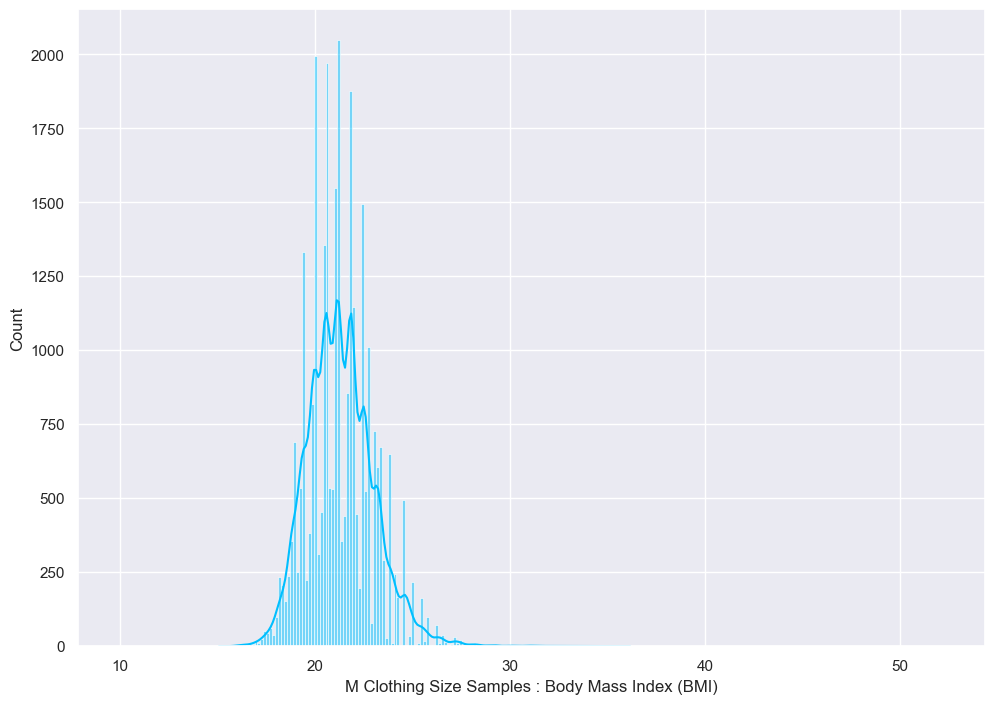

In [78]:
count_plotted = sns.histplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 3], kde = True, color = 'deepskyblue')
count_plotted.set(xlabel = "M Clothing Size Samples : Body Mass Index (BMI)")
count_plotted.set(xlim = (7.8283, 54.3236))

# Outliers : BMI

[Text(0.5, 0, 'M Clothing Size Samples : Body Mass Index (BMI)')]

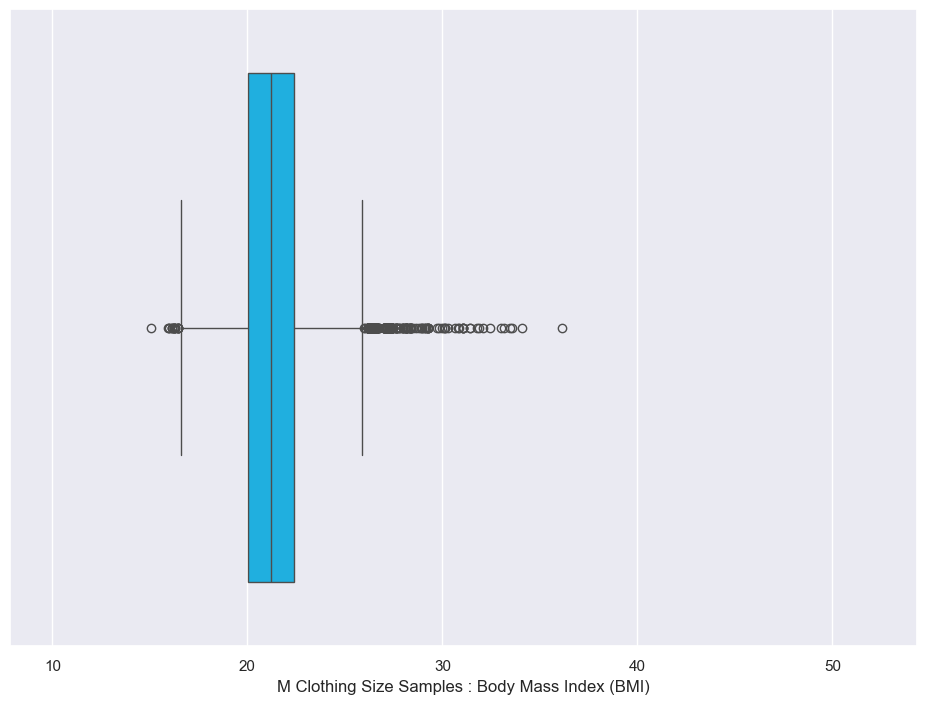

In [79]:
boxxer_plot = sns.boxplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 3], color = 'deepskyblue')
boxxer_plot.set(xlim = (7.8283, 54.3236))
boxxer_plot.set(xlabel = "M Clothing Size Samples : Body Mass Index (BMI)")

# How many outliers in BMI Column?

In [80]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 3]['bmi'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 16.4988 or greater than 25.9067
There are 300 outliers.


# Types of Rows : L Clothing Size Samples

# Column : Weight (in kgs)

# Distribution of rows in terms of Weight

[(22.0, 136.0)]

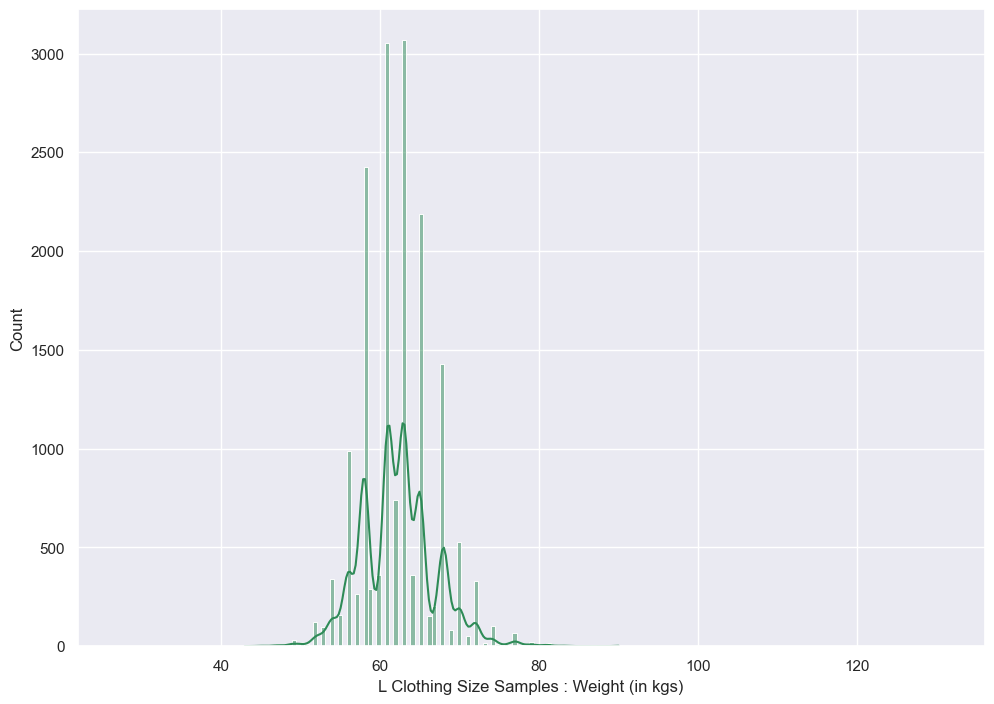

In [81]:
count_plotted = sns.histplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 4], kde = True, color = 'seagreen')
count_plotted.set(xlabel = "L Clothing Size Samples : Weight (in kgs)")
count_plotted.set(xlim = (22.0000, 136.0000))

# Outliers : Weight

[Text(0.5, 0, 'L Clothing Size Samples : Weight (in kgs)')]

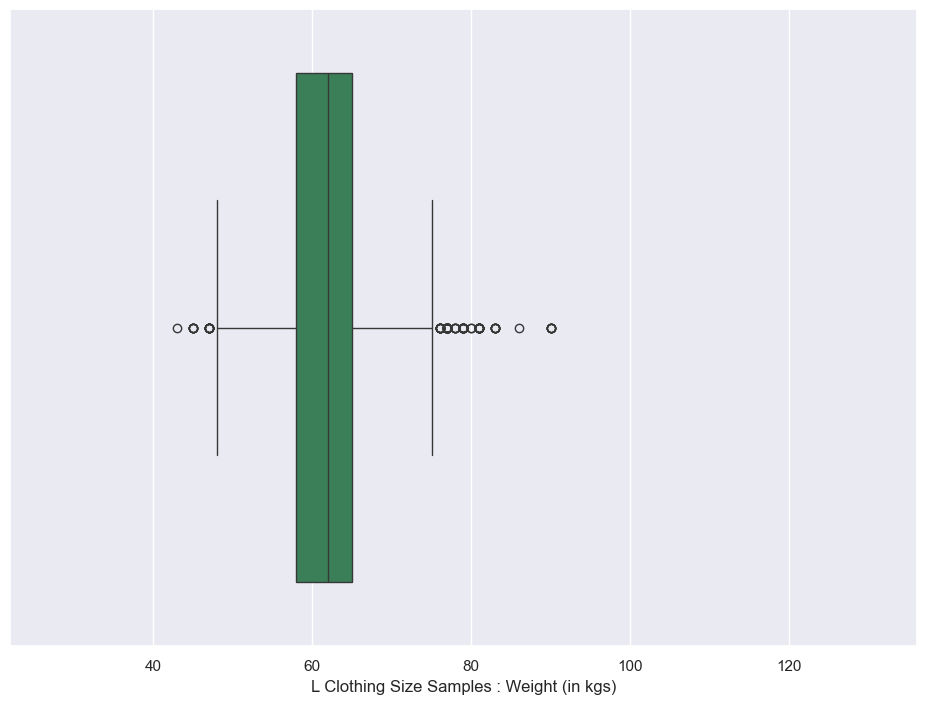

In [82]:
boxxer_plot = sns.boxplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 4], color = 'seagreen')
boxxer_plot.set(xlim = (22.0000, 136.0000))
boxxer_plot.set(xlabel = "L Clothing Size Samples : Weight (in kgs)")

# How many outliers in Weight Column?

In [83]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 4]['weight'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 47.5000 or greater than 75.5000
There are 159 outliers.


# Column : Age

# Distribution of rows in terms of Age

[(0.0, 117.0)]

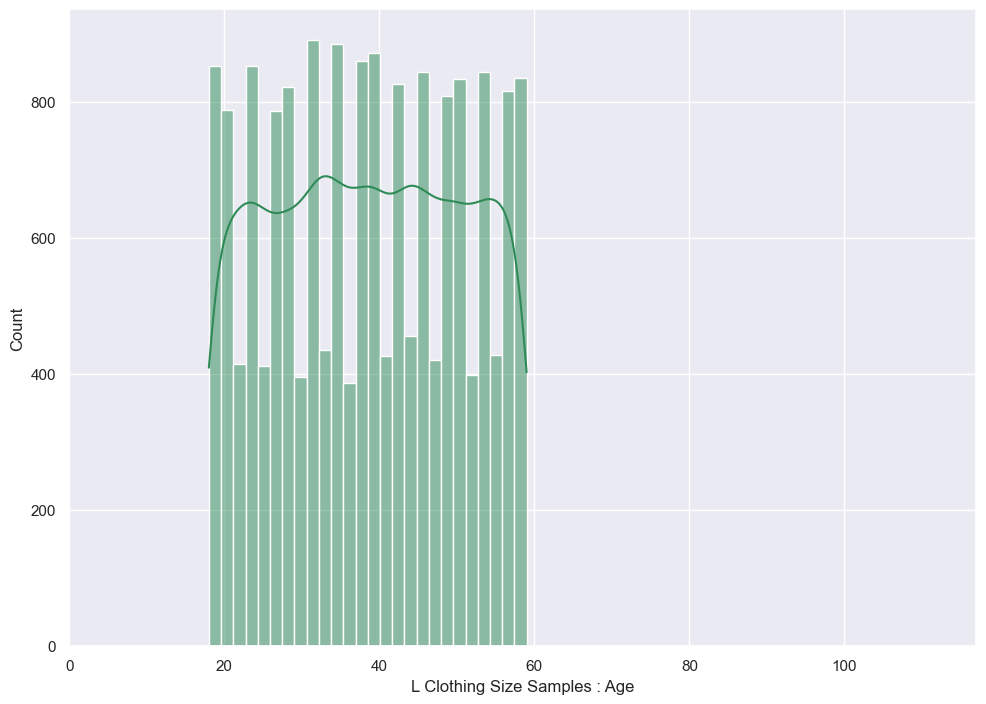

In [84]:
count_plotted = sns.histplot(x = 'age', data = dataframed.loc[dataframed['size'] == 4], kde = True, color = 'seagreen')
count_plotted.set(xlabel = "L Clothing Size Samples : Age")
count_plotted.set(xlim = (0.0000, 117.0000))

# Outliers : Age

[Text(0.5, 0, 'L Clothing Size Samples : Age')]

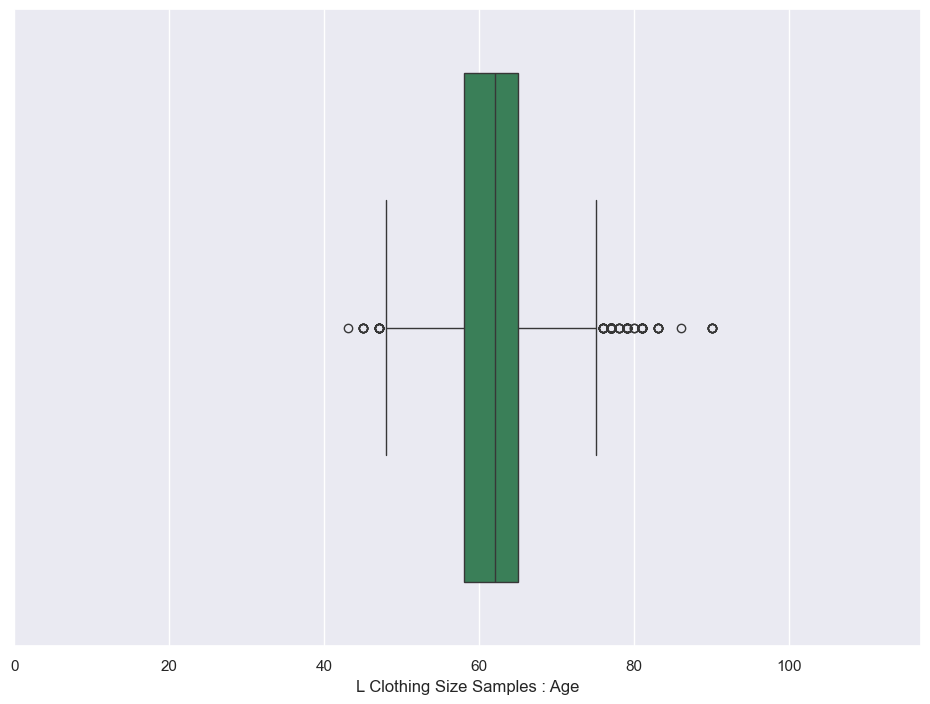

In [85]:
boxxer_plot = sns.boxplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 4], color = 'seagreen')
boxxer_plot.set(xlim = (0.0000, 117.0000))
boxxer_plot.set(xlabel = "L Clothing Size Samples : Age")

# How many outliers in Age Column?

In [86]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 4]['age'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -3.5000 or greater than 80.5000
There are 0 outliers.


# Column : Height (in cm)

# Distribution of rows in terms of Height

[(137.16, 193.04)]

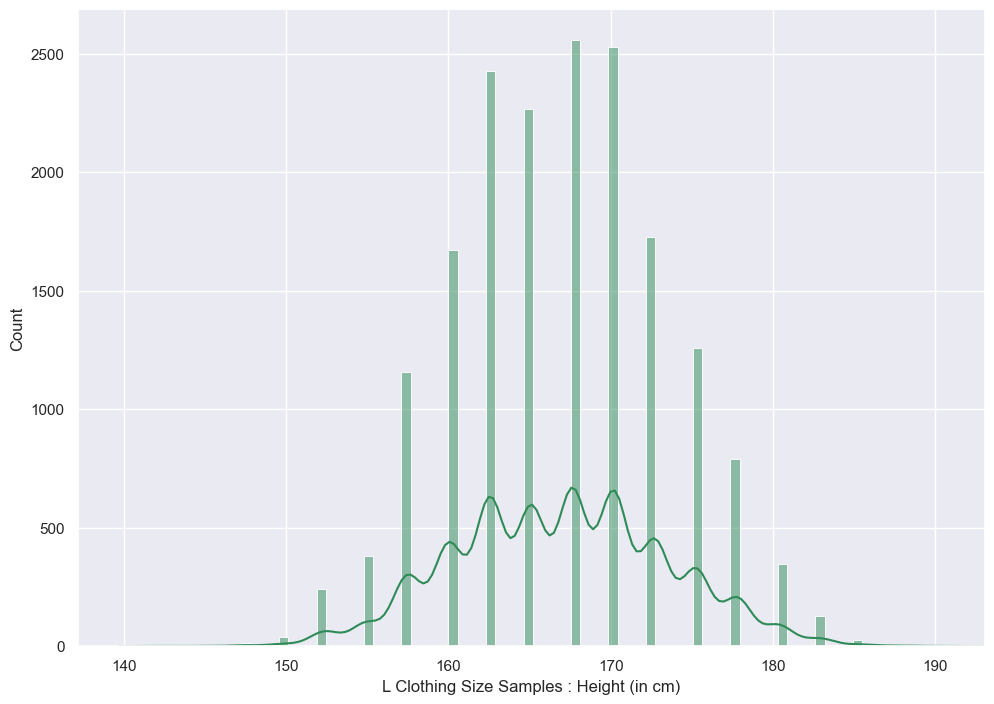

In [87]:
count_plotted = sns.histplot(x = 'height', data = dataframed.loc[dataframed['size'] == 4], kde = True, color = 'seagreen')
count_plotted.set(xlabel = "L Clothing Size Samples : Height (in cm)")
count_plotted.set(xlim = (137.1600, 193.0400))

# Outliers : Height

[Text(0.5, 0, 'L Clothing Size Samples : Height (in cm)')]

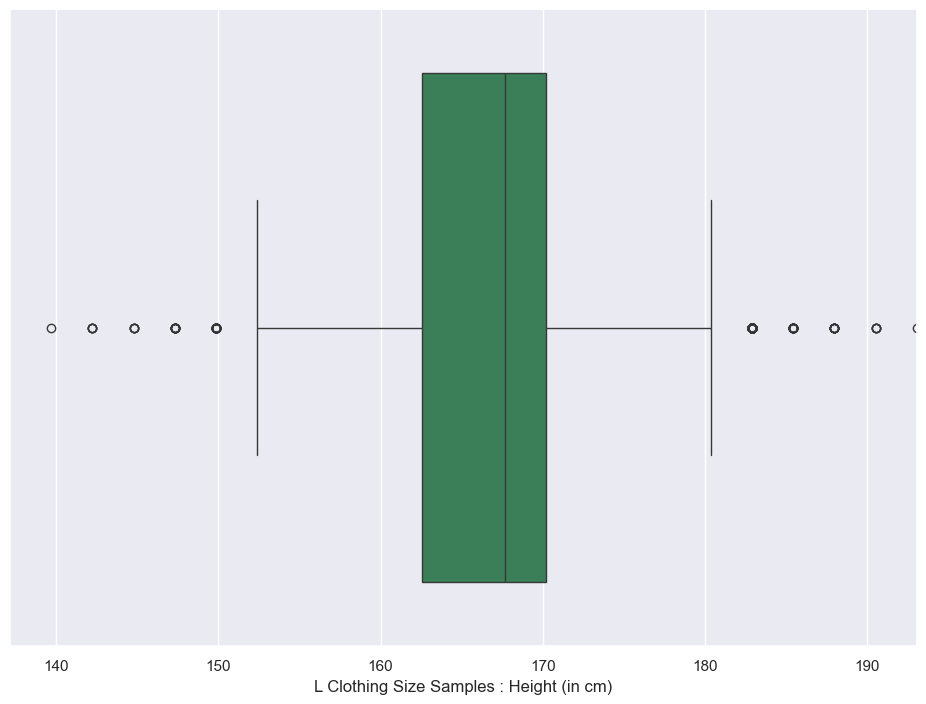

In [88]:
boxxer_plot = sns.boxplot(x = 'height', data = dataframed.loc[dataframed['size'] == 4], color = 'seagreen')
boxxer_plot.set(xlim = (137.1600, 193.0400))
boxxer_plot.set(xlabel = "L Clothing Size Samples : Height (in cm)")

# How many outliers in Height Column?

In [89]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 4]['height'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 151.1300 or greater than 181.6100
There are 231 outliers.


# Column : Size

# Distribution of rows in terms of Size

[(1.0, 7.0)]

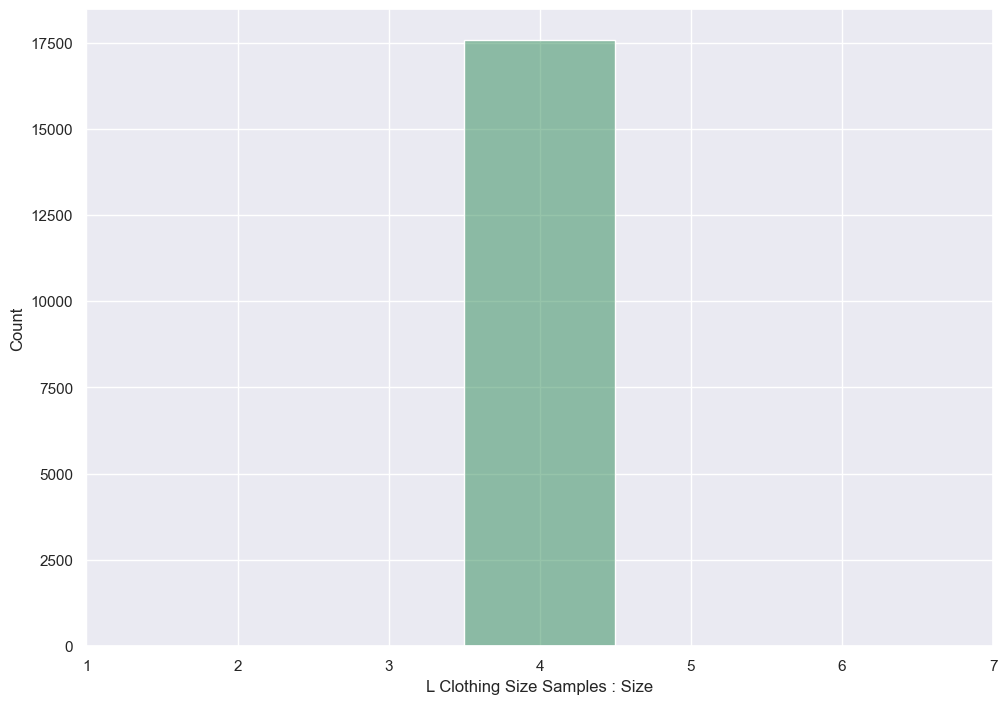

In [90]:
count_plotted = sns.histplot(x = 'size', data = dataframed.loc[dataframed['size'] == 4], kde = True, color = 'seagreen')
count_plotted.set(xlabel = "L Clothing Size Samples : Size")
count_plotted.set(xlim = (1.0000, 7.0000))

# Outliers : Size

[Text(0.5, 0, 'L Clothing Size Samples : Size')]

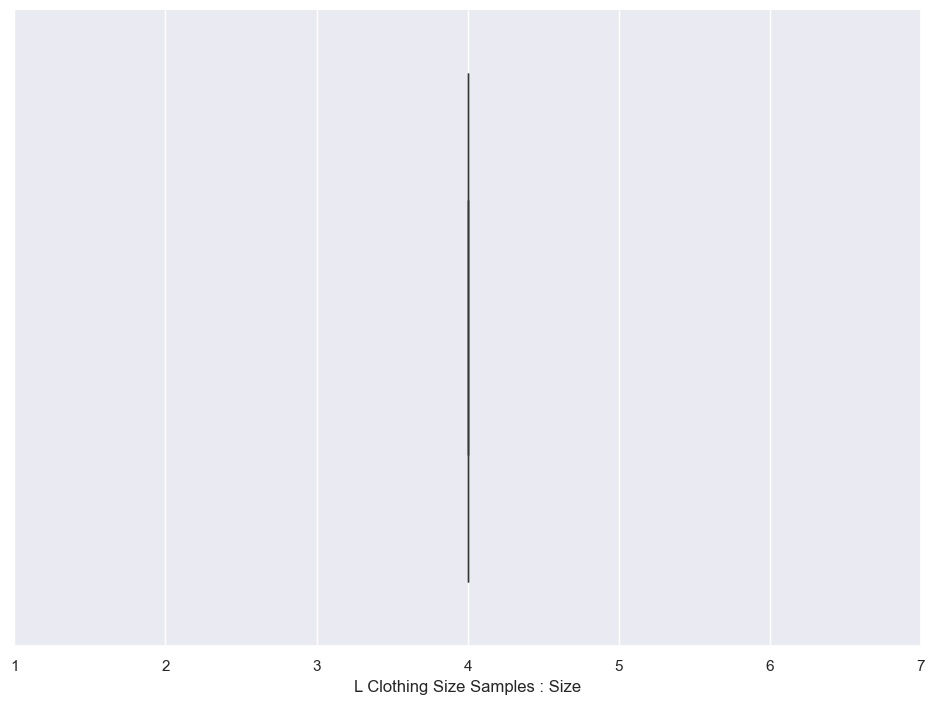

In [91]:
boxxer_plot = sns.boxplot(x = 'size', data = dataframed.loc[dataframed['size'] == 4], color = 'seagreen')
boxxer_plot.set(xlim = (1.0000, 7.0000))
boxxer_plot.set(xlabel = "L Clothing Size Samples : Size")

# How many outliers in Size Column?

In [92]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 4]['size'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 4.0000 or greater than 4.0000
There are 0 outliers.


# Column : BMI

# Distribution of rows in terms of BMI

[(7.8283, 54.3236)]

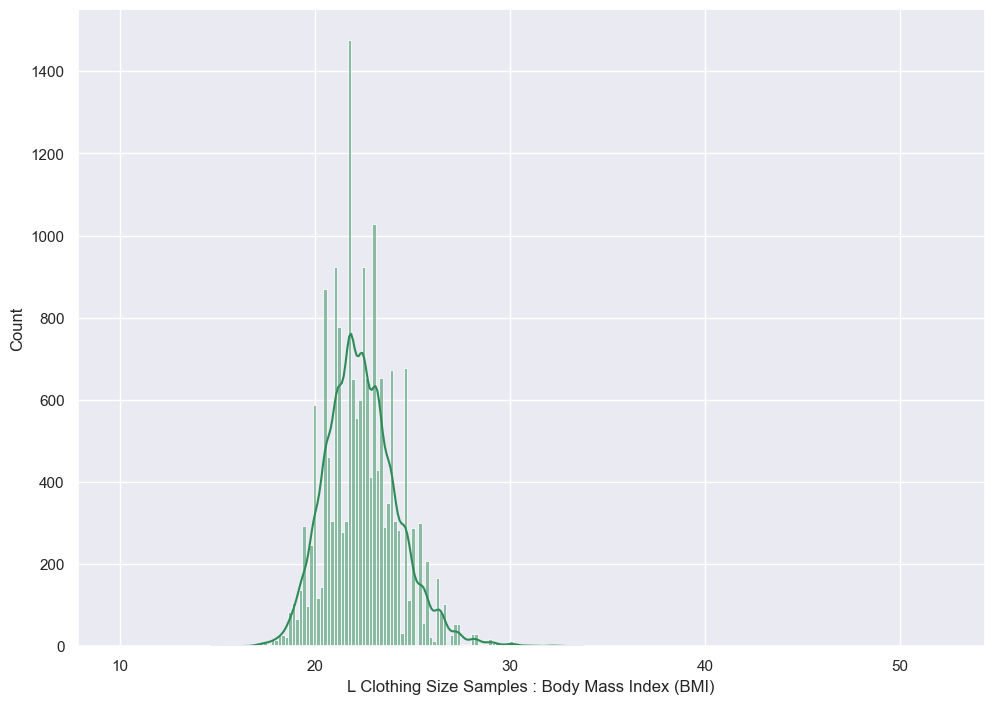

In [93]:
count_plotted = sns.histplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 4], kde = True, color = 'seagreen')
count_plotted.set(xlabel = "L Clothing Size Samples : Body Mass Index (BMI)")
count_plotted.set(xlim = (7.8283, 54.3236))

# Outliers : BMI

[Text(0.5, 0, 'L Clothing Size Samples : Body Mass Index (BMI)')]

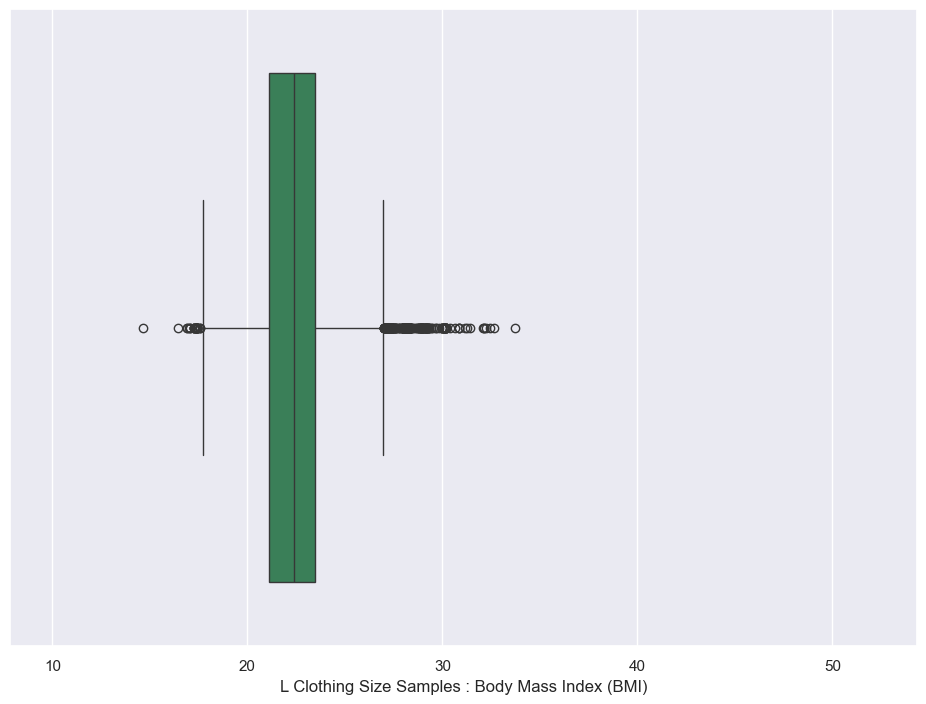

In [94]:
boxxer_plot = sns.boxplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 4], color = 'seagreen')
boxxer_plot.set(xlim = (7.8283, 54.3236))
boxxer_plot.set(xlabel = "L Clothing Size Samples : Body Mass Index (BMI)")

# How many outliers in BMI Column?

In [95]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 4]['bmi'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 17.6024 or greater than 26.9777
There are 322 outliers.


# Types of Rows : XL Clothing Size Samples

# Column : Weight (in kgs)

# Distribution of rows in terms of Weight

[(22.0, 136.0)]

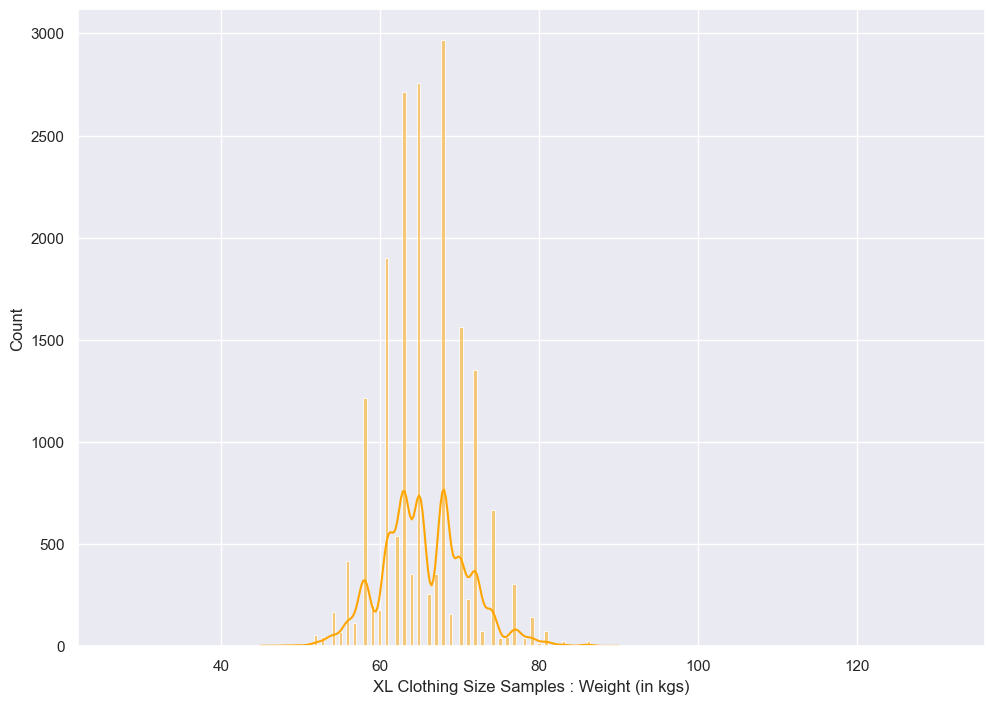

In [96]:
count_plotted = sns.histplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 5], kde = True, color = 'orange')
count_plotted.set(xlabel = "XL Clothing Size Samples : Weight (in kgs)")
count_plotted.set(xlim = (22.0000, 136.0000))

# Outliers : Weight

[Text(0.5, 0, 'XL Clothing Size Samples : Weight (in kgs)')]

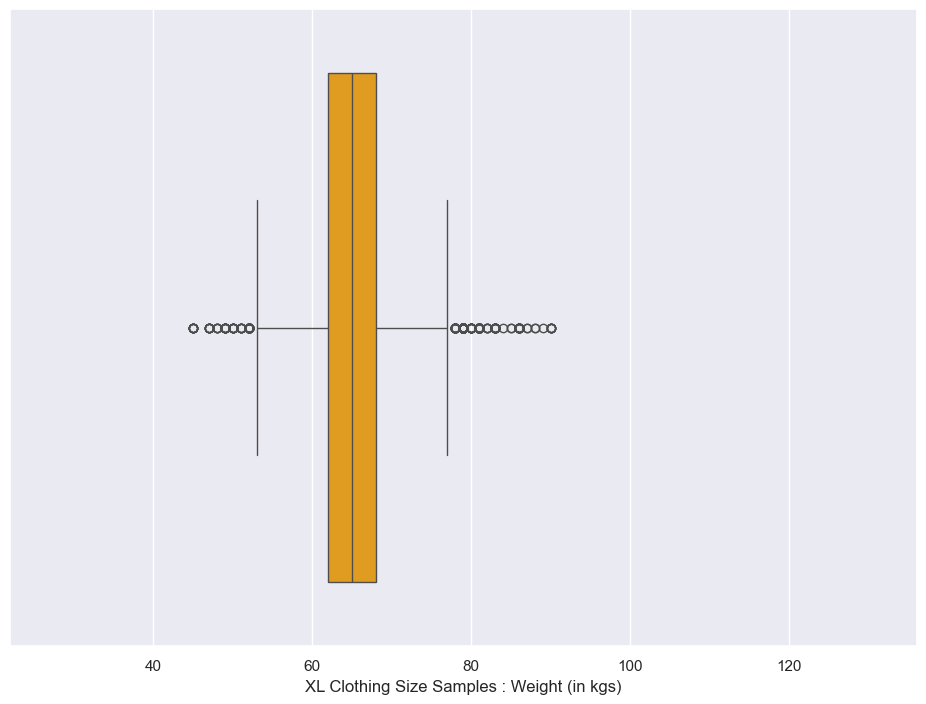

In [97]:
boxxer_plot = sns.boxplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 5], color = 'orange')
boxxer_plot.set(xlim = (22.0000, 136.0000))
boxxer_plot.set(xlabel = "XL Clothing Size Samples : Weight (in kgs)")

# How many outliers in Weight Column?

In [98]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 5]['weight'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 53.0000 or greater than 77.0000
There are 439 outliers.


# Column : Age

# Distribution of rows in terms of Age

[(0.0, 117.0)]

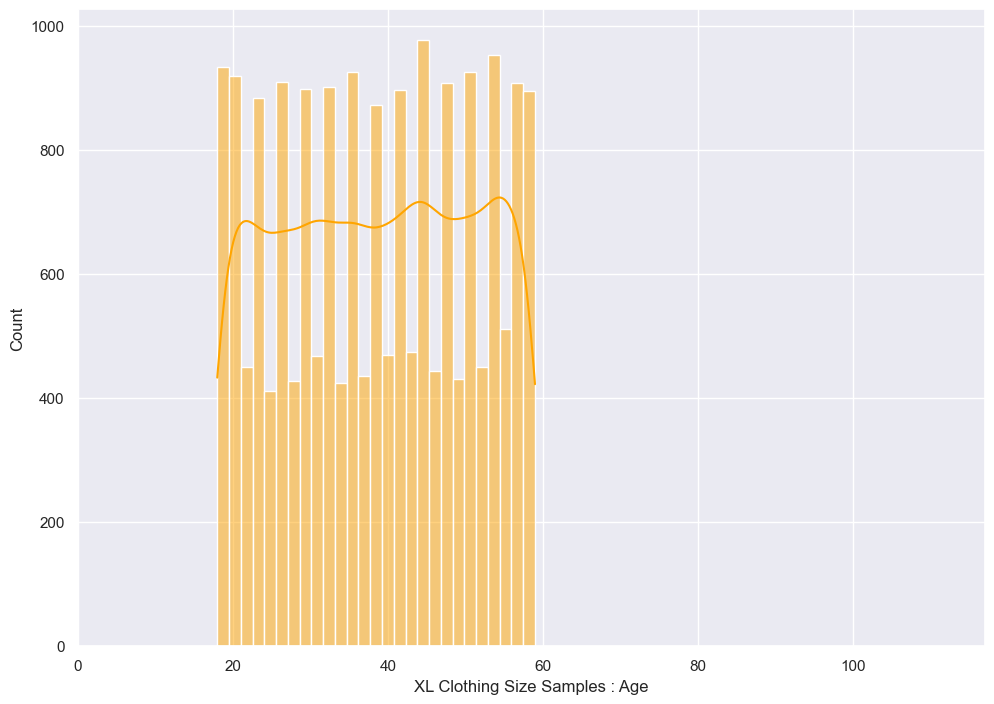

In [99]:
count_plotted = sns.histplot(x = 'age', data = dataframed.loc[dataframed['size'] == 5], kde = True, color = 'orange')
count_plotted.set(xlabel = "XL Clothing Size Samples : Age")
count_plotted.set(xlim = (0.0000, 117.0000))

# Outliers : Age

[Text(0.5, 0, 'XL Clothing Size Samples : Age')]

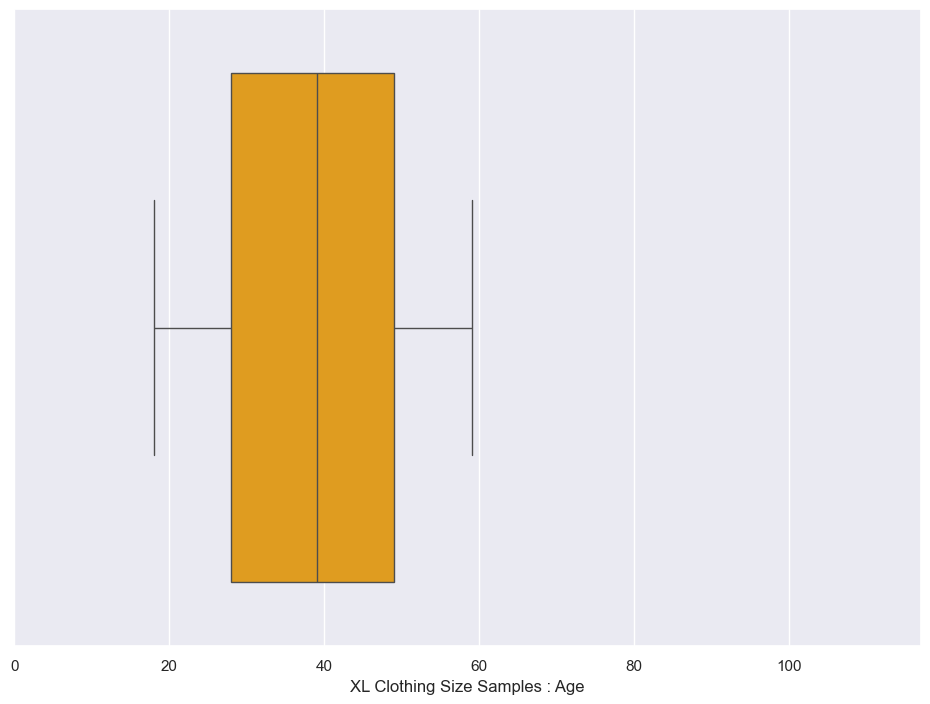

In [100]:
boxxer_plot = sns.boxplot(x = 'age', data = dataframed.loc[dataframed['size'] == 5], color = 'orange')
boxxer_plot.set(xlim = (0.0000, 117.0000))
boxxer_plot.set(xlabel = "XL Clothing Size Samples : Age")

# How many outliers in Age Column?

In [101]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 5]['age'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -3.5000 or greater than 80.5000
There are 0 outliers.


# Column : Height (in cm)

# Distribution of rows in terms of Height

[(137.16, 193.04)]

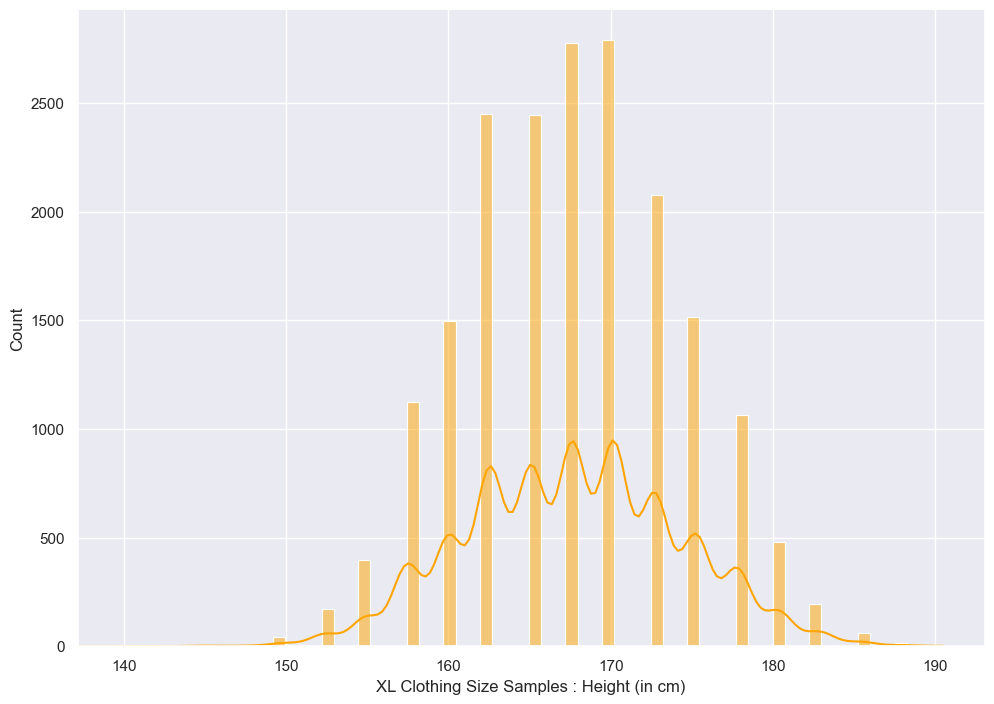

In [102]:
count_plotted = sns.histplot(x = 'height', data = dataframed.loc[dataframed['size'] == 5], kde = True, color = 'orange')
count_plotted.set(xlabel = "XL Clothing Size Samples : Height (in cm)")
count_plotted.set(xlim = (137.1600, 193.0400))

# Outliers : Height

[Text(0.5, 0, 'XL Clothing Size Samples : Height (in cm)')]

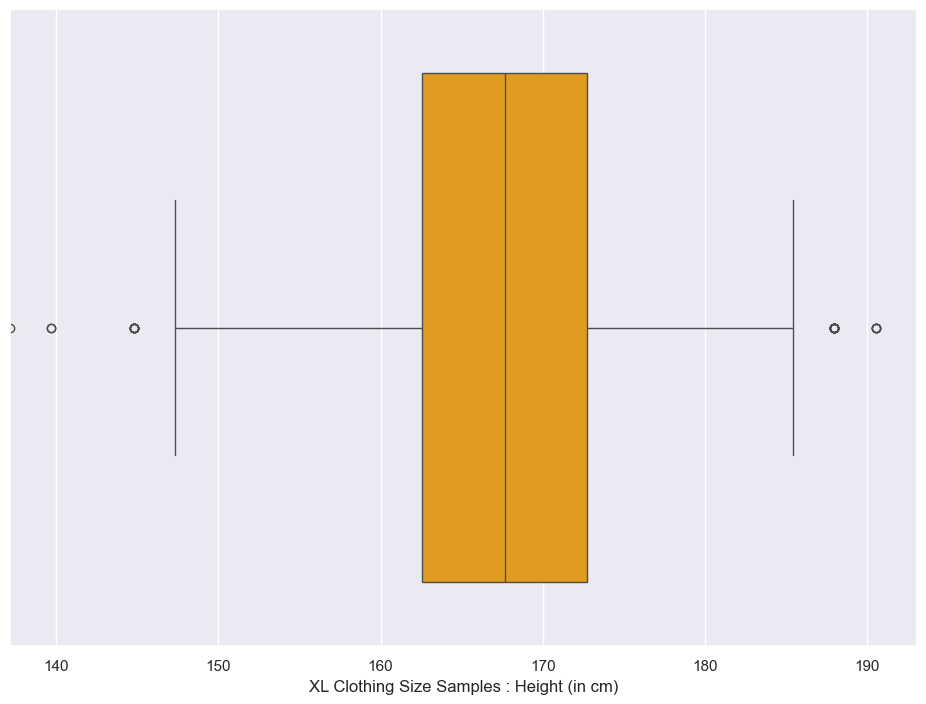

In [103]:
boxxer_plot = sns.boxplot(x = 'height', data = dataframed.loc[dataframed['size'] == 5], color = 'orange')
boxxer_plot.set(xlim = (137.1600, 193.0400))
boxxer_plot.set(xlabel = "XL Clothing Size Samples : Height (in cm)")

# How many outliers in Height Column?

In [104]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 5]['height'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 147.3200 or greater than 187.9600
There are 28 outliers.


# Column : Size

# Distribution of rows in terms of Size

[(1.0, 7.0)]

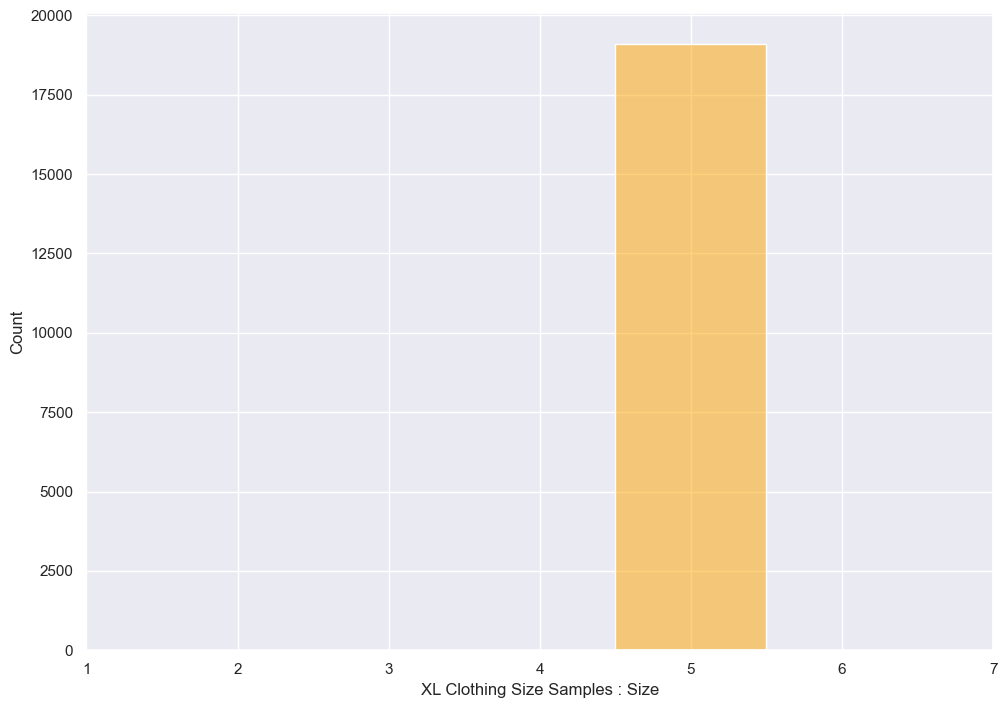

In [105]:
count_plotted = sns.histplot(x = 'size', data = dataframed.loc[dataframed['size'] == 5], kde = True, color = 'orange')
count_plotted.set(xlabel = "XL Clothing Size Samples : Size")
count_plotted.set(xlim = (1.0000, 7.0000))

# Outliers : Size

[Text(0.5, 0, 'XL Clothing Size Samples : Size')]

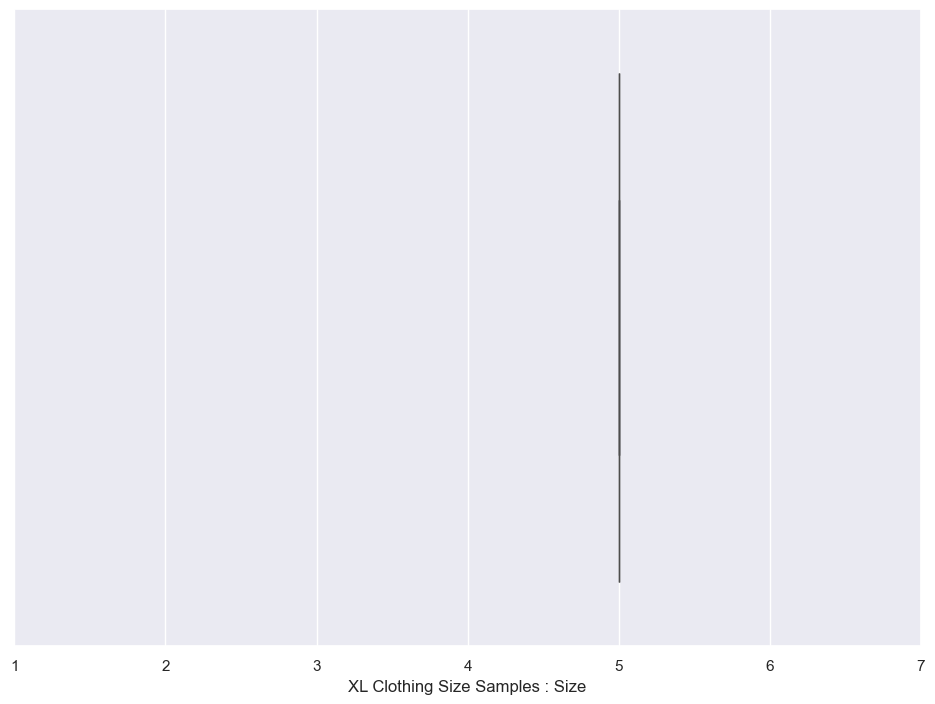

In [106]:
boxxer_plot = sns.boxplot(x = 'size', data = dataframed.loc[dataframed['size'] == 5], color = 'orange')
boxxer_plot.set(xlim = (1.0000, 7.0000))
boxxer_plot.set(xlabel = "XL Clothing Size Samples : Size")

# How many outliers in Size Column?

In [107]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 5]['size'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 5.0000 or greater than 5.0000
There are 0 outliers.


# Column : BMI

# Distribution of rows in terms of BMI

[(7.8283, 54.3236)]

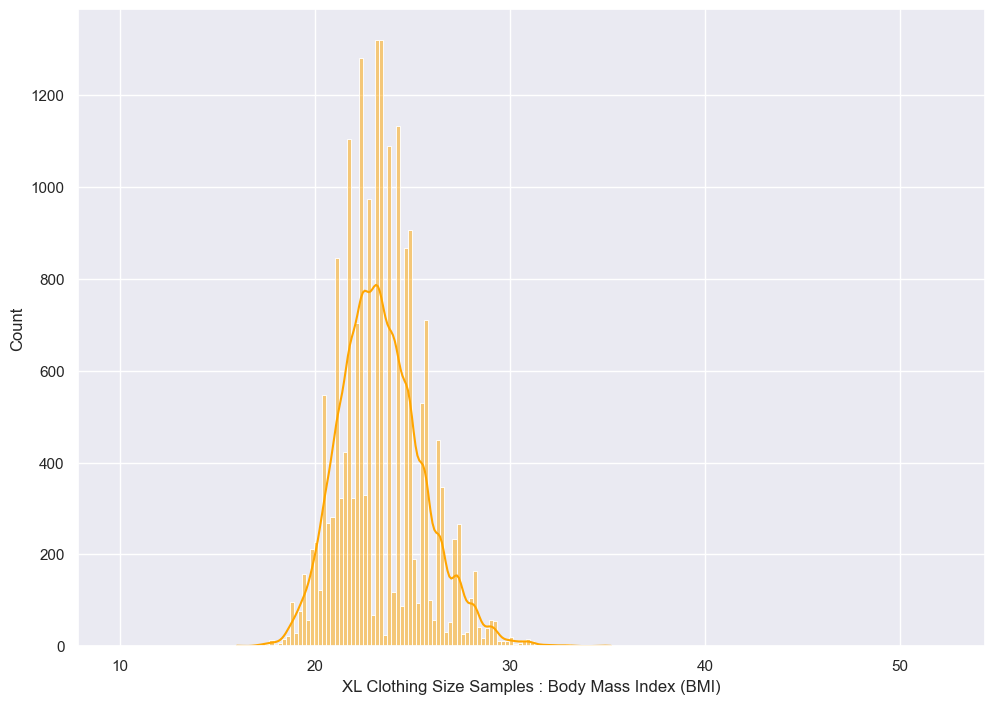

In [108]:
count_plotted = sns.histplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 5], kde = True, color = 'orange')
count_plotted.set(xlabel = "XL Clothing Size Samples : Body Mass Index (BMI)")
count_plotted.set(xlim = (7.8283, 54.3236))

# Outliers : BMI

[Text(0.5, 0, 'XL Clothing Size Samples : Body Mass Index (BMI)')]

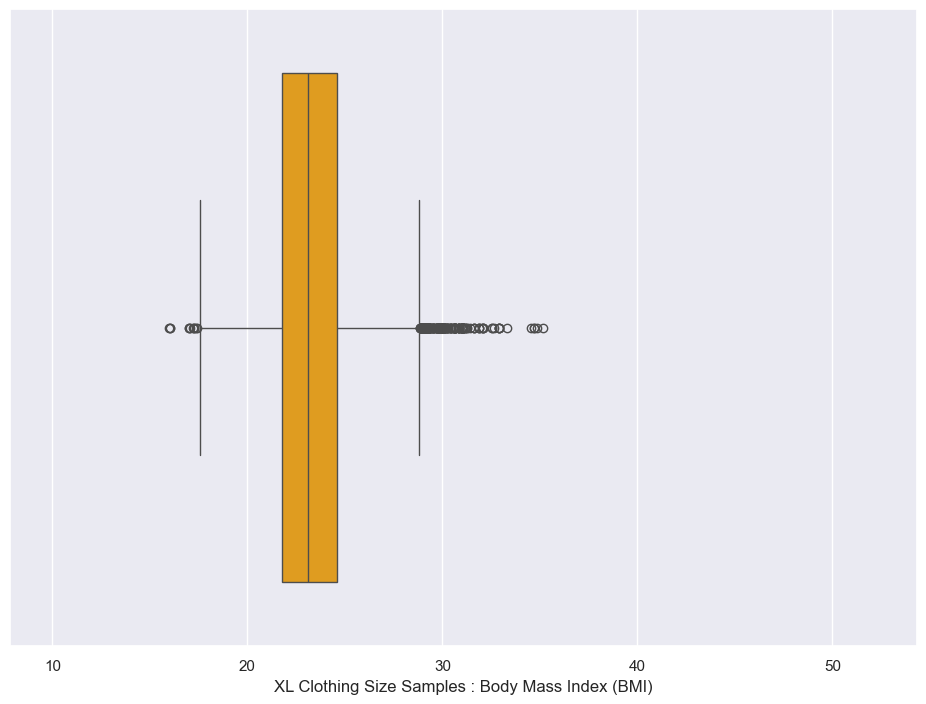

In [109]:
boxxer_plot = sns.boxplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 5], color = 'orange')
boxxer_plot.set(xlim = (7.8283, 54.3236))
boxxer_plot.set(xlabel = "XL Clothing Size Samples : Body Mass Index (BMI)")

# How many outliers in BMI Column?

In [110]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 5]['bmi'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 17.5665 or greater than 28.8253
There are 276 outliers.


# Types of Rows : XXL Clothing Size Samples

# Column : Weight (in kgs)

# Distribution of rows in terms of Weight

[(22.0, 136.0)]

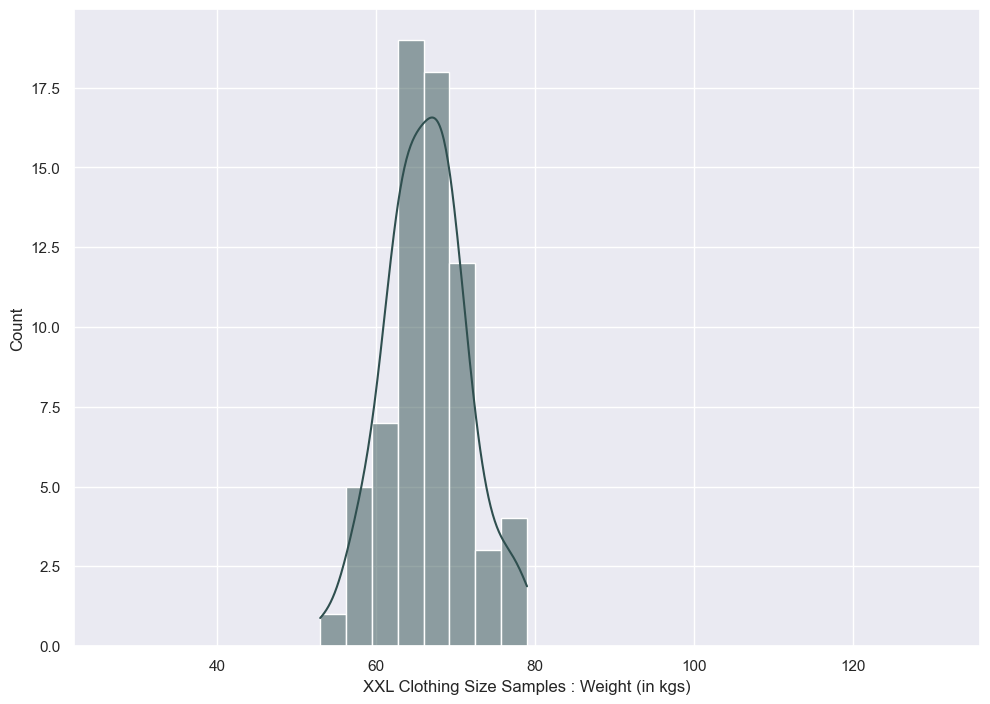

In [111]:
count_plotted = sns.histplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 6], kde = True, color = 'darkslategrey')
count_plotted.set(xlabel = "XXL Clothing Size Samples : Weight (in kgs)")
count_plotted.set(xlim = (22.0000, 136.0000))

# Outliers : Weight

[Text(0.5, 0, 'XXL Clothing Size Samples : Weight (in kgs)')]

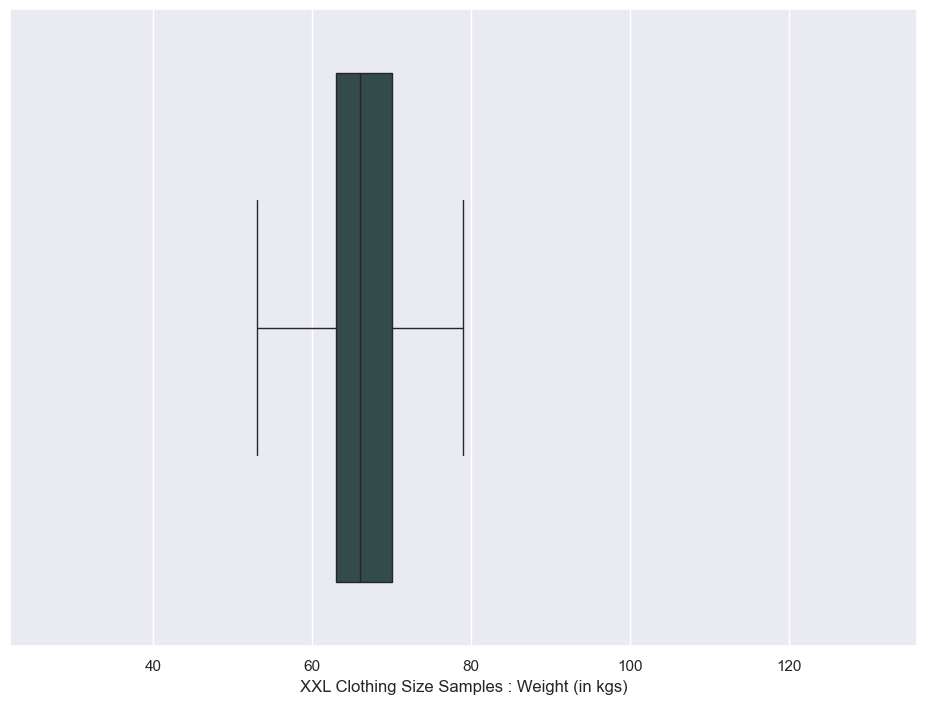

In [112]:
boxxer_plot = sns.boxplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 6], color = 'darkslategrey')
boxxer_plot.set(xlim = (22.0000, 136.0000))
boxxer_plot.set(xlabel = "XXL Clothing Size Samples : Weight (in kgs)")

# How many outliers in Weight Column?

In [113]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 6]['weight'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 52.5000 or greater than 80.5000
There are 0 outliers.


# Column : Age

# Distribution of rows in terms of Age

[(0.0, 117.0)]

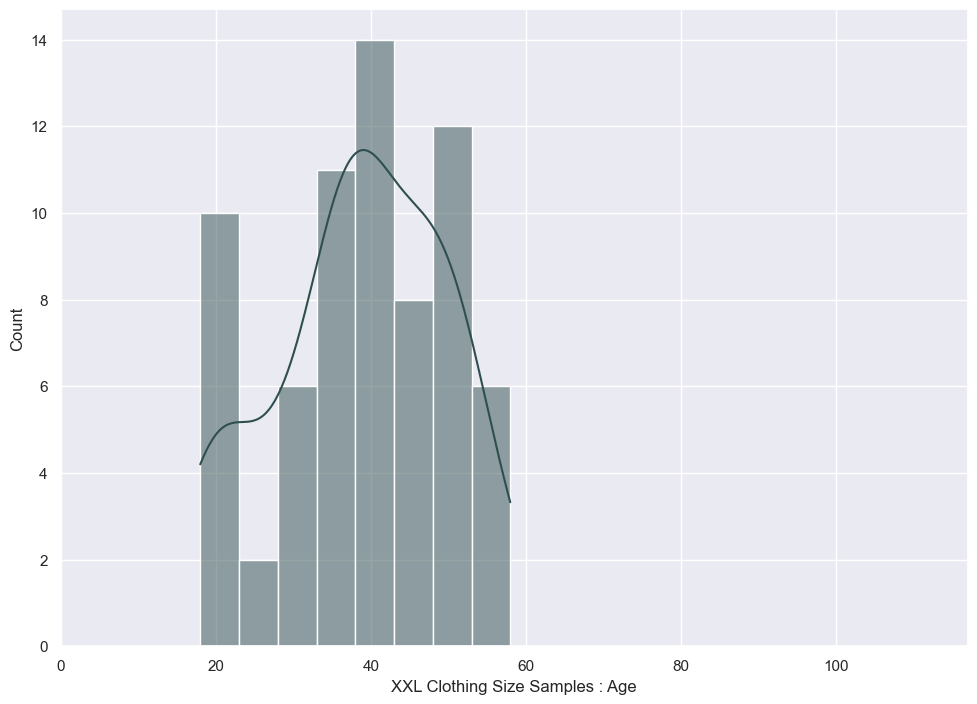

In [114]:
count_plotted = sns.histplot(x = 'age', data = dataframed.loc[dataframed['size'] == 6], kde = True, color = 'darkslategrey')
count_plotted.set(xlabel = "XXL Clothing Size Samples : Age")
count_plotted.set(xlim = (0.0000, 117.0000))

# Outliers : Age

[Text(0.5, 0, 'XXL Clothing Size Samples : Age')]

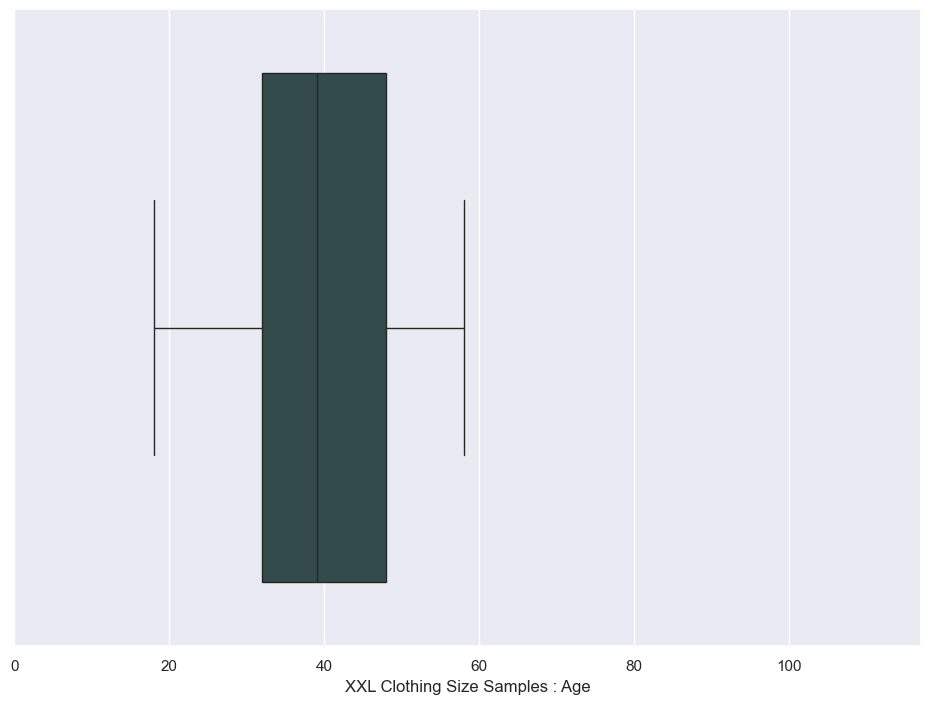

In [115]:
boxxer_plot = sns.boxplot(x = 'age', data = dataframed.loc[dataframed['size'] == 6], color = 'darkslategrey')
boxxer_plot.set(xlim = (0.0000, 117.0000))
boxxer_plot.set(xlabel = "XXL Clothing Size Samples : Age")

# How many outliers in Age Column?

In [116]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 6]['age'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values greater than 72.0000
There are 0 outliers.


# Column : Height (in cm)

# Distribution of rows in terms of Height

[(137.16, 193.04)]

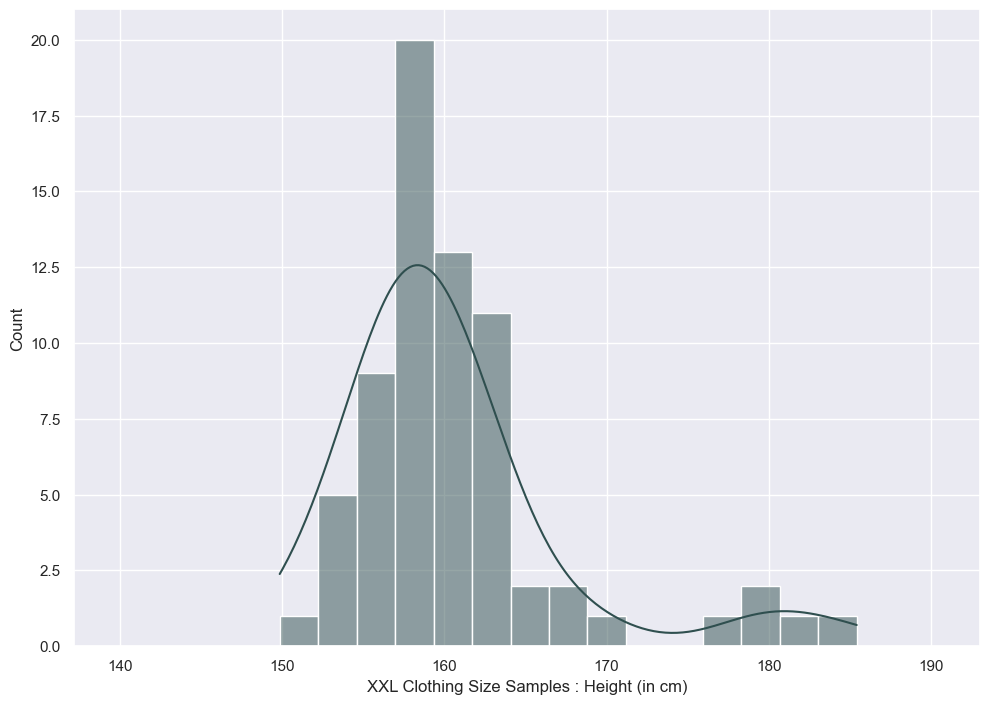

In [117]:
count_plotted = sns.histplot(x = 'height', data = dataframed.loc[dataframed['size'] == 6], kde = True, color = 'darkslategrey')
count_plotted.set(xlabel = "XXL Clothing Size Samples : Height (in cm)")
count_plotted.set(xlim = (137.1600, 193.0400))

# Outliers : Height

[Text(0.5, 0, 'XXL Clothing Size Samples : Height (in cm)')]

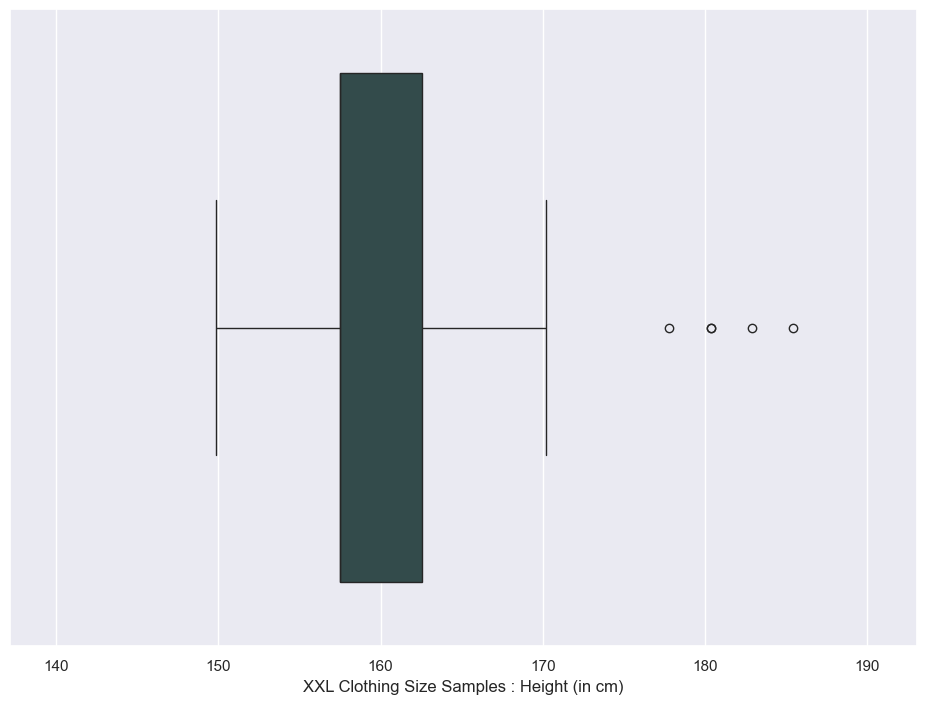

In [118]:
boxxer_plot = sns.boxplot(x = 'height', data = dataframed.loc[dataframed['size'] == 6], color = 'darkslategrey')
boxxer_plot.set(xlim = (137.1600, 193.0400))
boxxer_plot.set(xlabel = "XXL Clothing Size Samples : Height (in cm)")

# How many outliers in Height Column?

In [119]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 6]['height'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values greater than 170.1800
There are 5 outliers.


# Column : Size

# Distribution of rows in terms of Size

[(1.0, 7.0)]

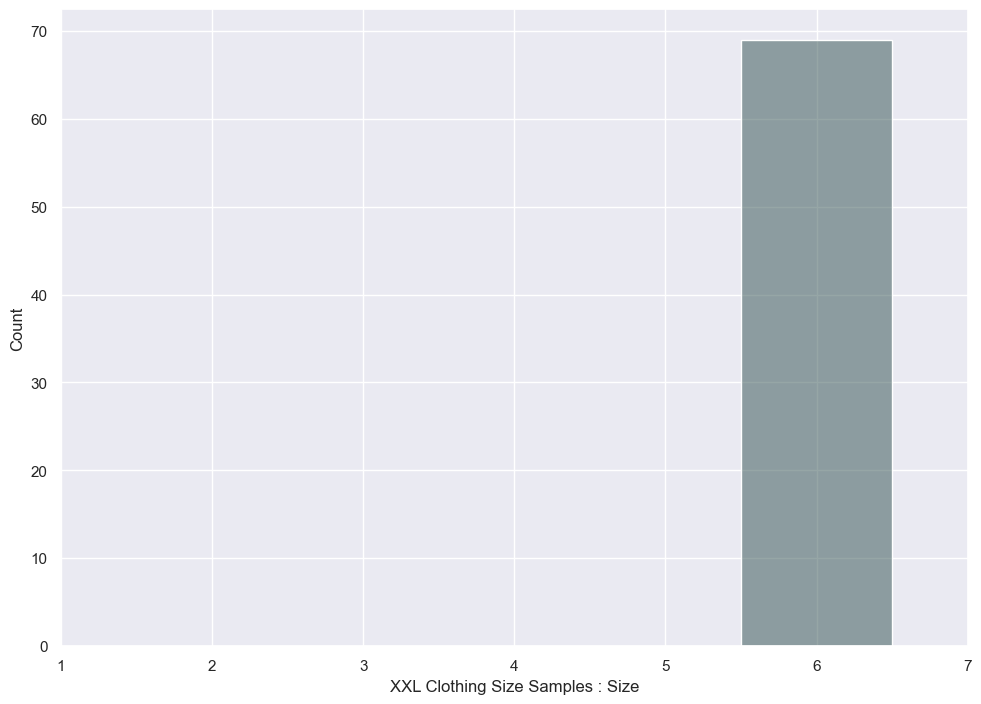

In [120]:
count_plotted = sns.histplot(x = 'size', data = dataframed.loc[dataframed['size'] == 6], kde = True, color = 'darkslategrey')
count_plotted.set(xlabel = "XXL Clothing Size Samples : Size")
count_plotted.set(xlim = (1.0000, 7.0000))

# Outliers : Size

[Text(0.5, 0, 'XXL Clothing Size Samples : Size')]

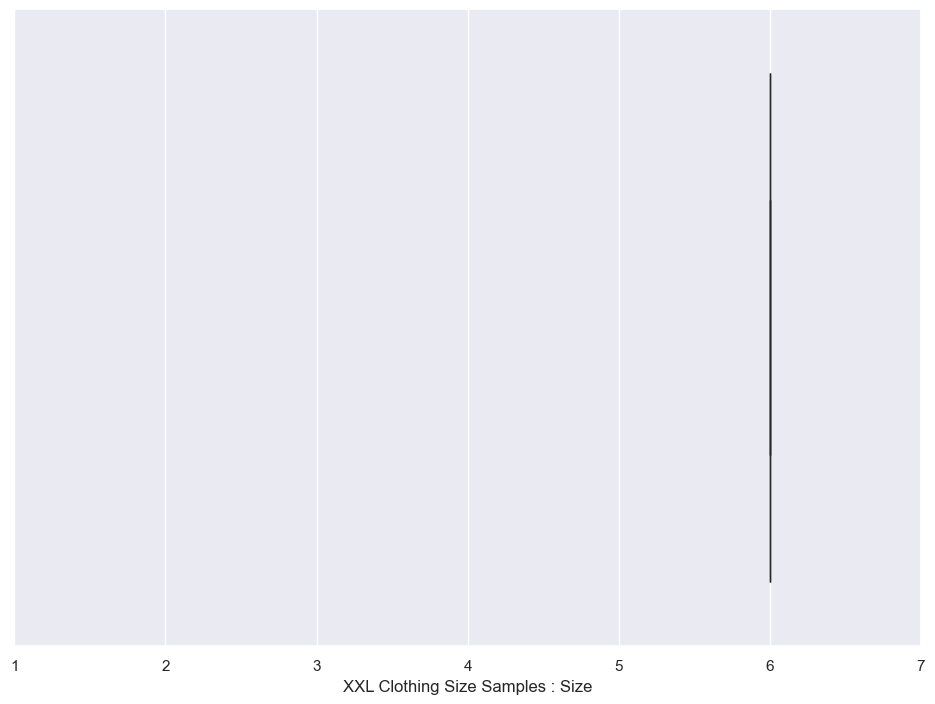

In [121]:
boxxer_plot = sns.boxplot(x = 'size', data = dataframed.loc[dataframed['size'] == 6], color = 'darkslategrey')
boxxer_plot.set(xlim = (1.0000, 7.0000))
boxxer_plot.set(xlabel = "XXL Clothing Size Samples : Size")

# How many outliers in Size Column?

In [122]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 6]['size'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 6.0000 or greater than 6.0000
There are 0 outliers.


# Column : BMI

# Distribution of rows in terms of BMI

[(7.8283, 54.3236)]

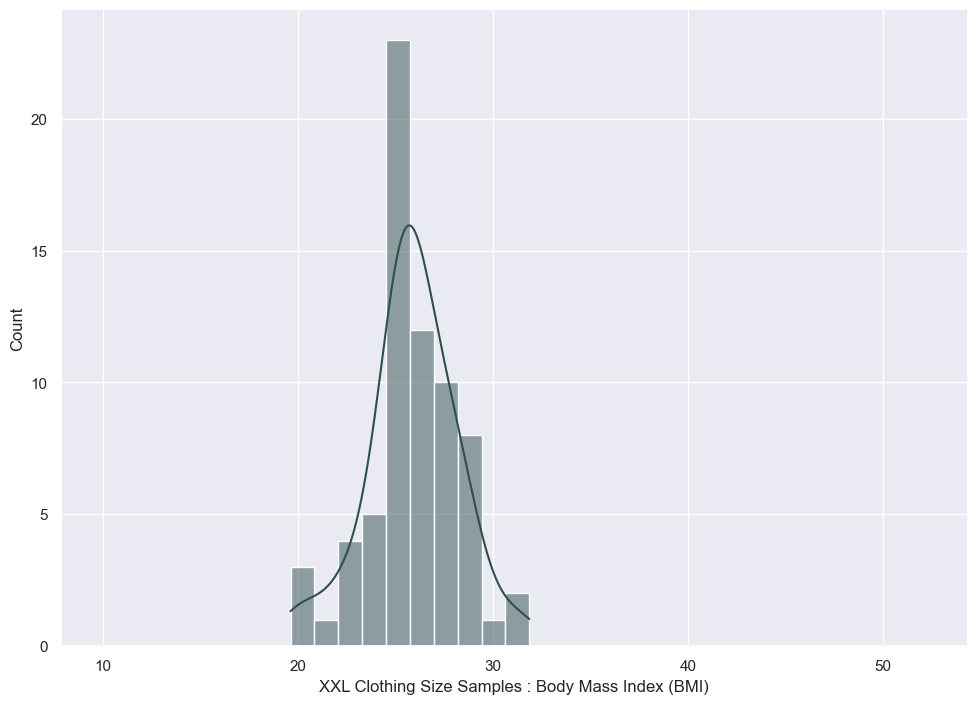

In [123]:
count_plotted = sns.histplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 6], kde = True, color = 'darkslategrey')
count_plotted.set(xlabel = "XXL Clothing Size Samples : Body Mass Index (BMI)")
count_plotted.set(xlim = (7.8283, 54.3236))

# Outliers : BMI

[Text(0.5, 0, 'XXL Clothing Size Samples : Body Mass Index (BMI)')]

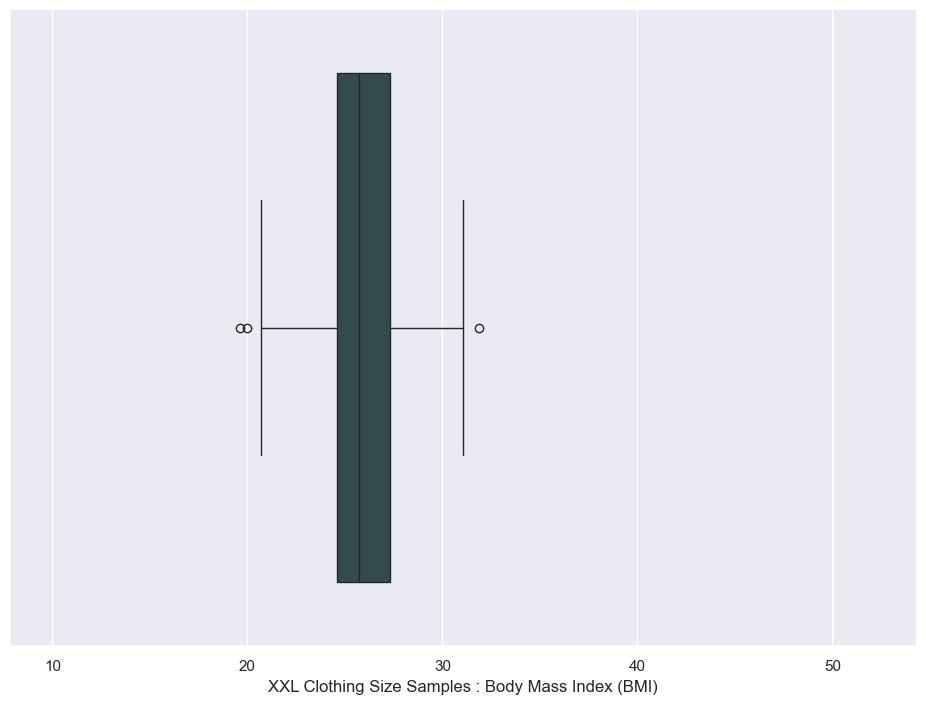

In [124]:
boxxer_plot = sns.boxplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 6], color = 'darkslategrey')
boxxer_plot.set(xlim = (7.8283, 54.3236))
boxxer_plot.set(xlabel = "XXL Clothing Size Samples : Body Mass Index (BMI)")

# How many outliers in BMI Column?

In [125]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 6]['bmi'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 20.5027 or greater than 31.4375
There are 3 outliers.


# Types of Rows : XXXL Clothing Size Samples

# Column : Weight (in kgs)

# Distribution of rows in terms of Weight

[(22.0, 136.0)]

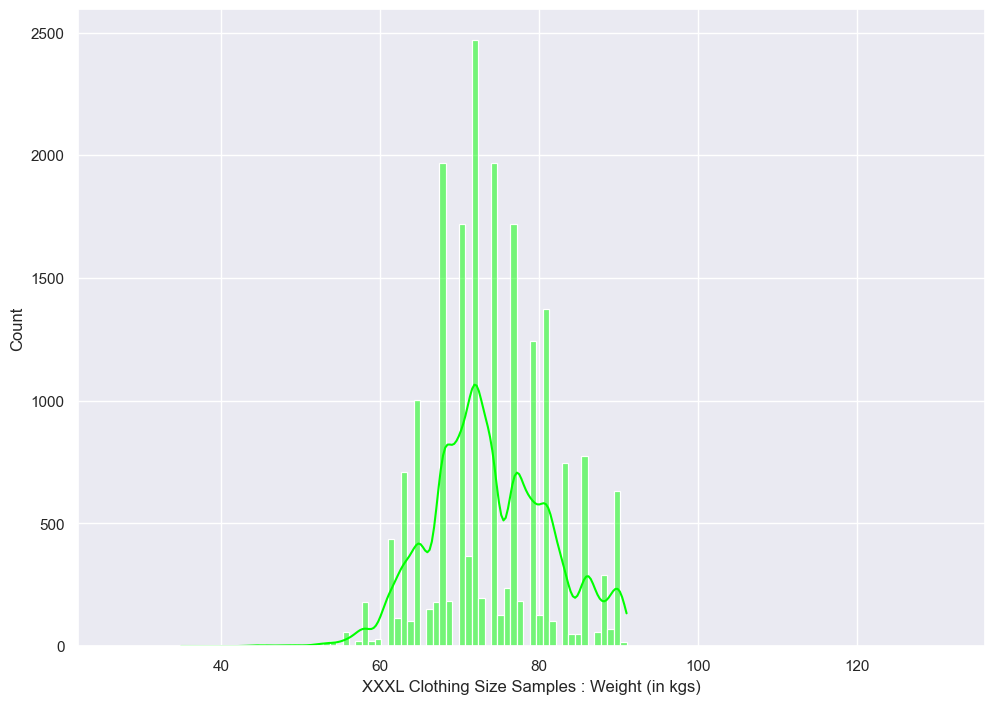

In [126]:
count_plotted = sns.histplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 7], kde = True, color = 'lime')
count_plotted.set(xlabel = "XXXL Clothing Size Samples : Weight (in kgs)")
count_plotted.set(xlim = (22.0000, 136.0000))

# Outliers : Weight

[Text(0.5, 0, 'XXXL Clothing Size Samples : Weight (in kgs)')]

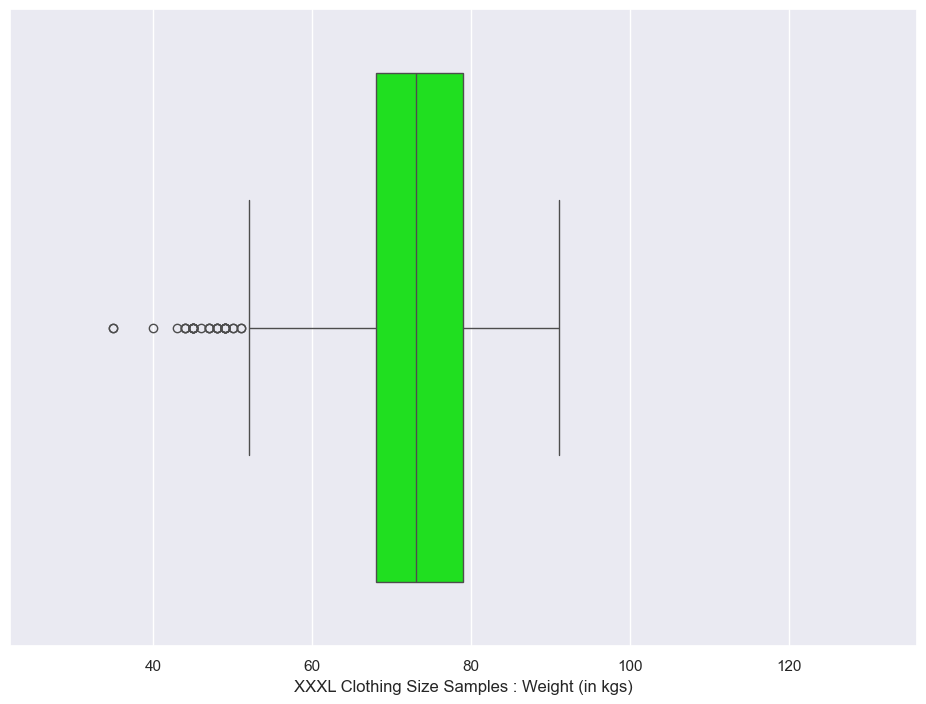

In [127]:
boxxer_plot = sns.boxplot(x = 'weight', data = dataframed.loc[dataframed['size'] == 7], color = 'lime')
boxxer_plot.set(xlim = (22.0000, 136.0000))
boxxer_plot.set(xlabel = "XXXL Clothing Size Samples : Weight (in kgs)")

# How many outliers in Weight Column?

In [128]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 7]['weight'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 51.5000 or greater than 95.5000
There are 33 outliers.


# Column : Age

# Distribution of rows in terms of Age

[(0.0, 117.0)]

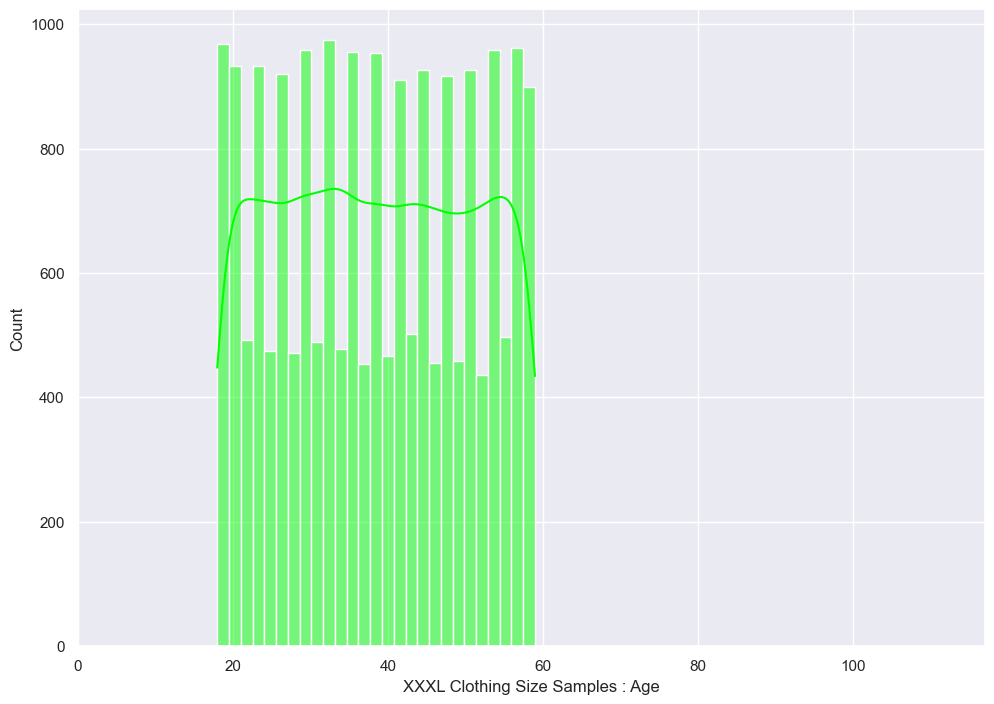

In [129]:
count_plotted = sns.histplot(x = 'age', data = dataframed.loc[dataframed['size'] == 7], kde = True, color = 'lime')
count_plotted.set(xlabel = "XXXL Clothing Size Samples : Age")
count_plotted.set(xlim = (0.0000, 117.0000))

# Outliers : Age

[Text(0.5, 0, 'XXXL Clothing Size Samples : Age')]

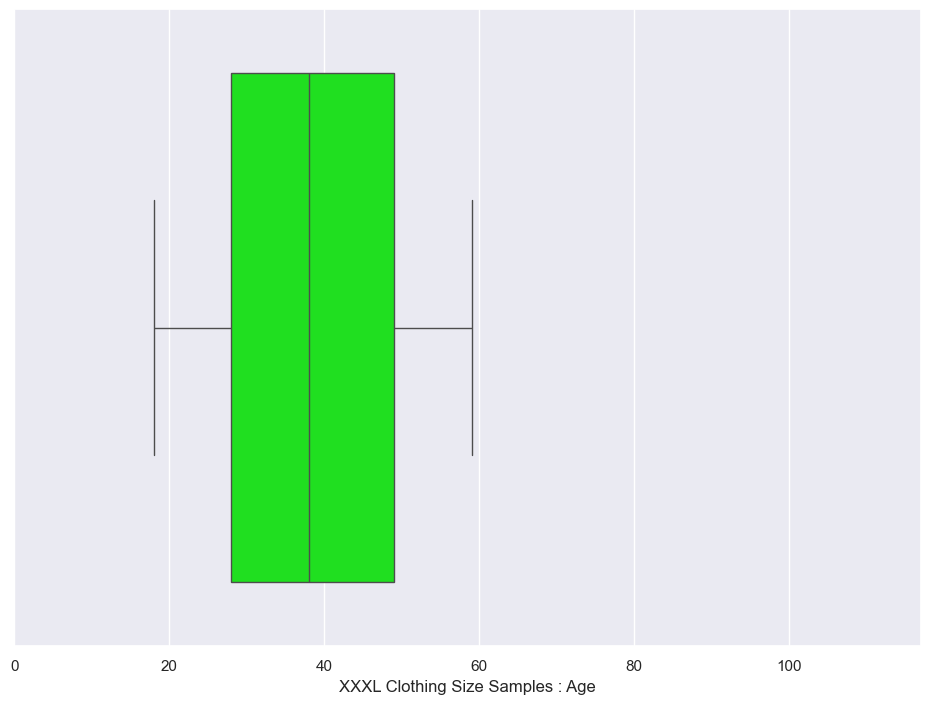

In [130]:
boxxer_plot = sns.boxplot(x = 'age', data = dataframed.loc[dataframed['size'] == 7], color = 'lime')
boxxer_plot.set(xlim = (0.0000, 117.0000))
boxxer_plot.set(xlabel = "XXXL Clothing Size Samples : Age")

# How many outliers in Age Column?

In [131]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 7]['age'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than -3.5000 or greater than 80.5000
There are 0 outliers.


# Column : Height (in cm)

# Distribution of rows in terms of Height

[(137.16, 193.04)]

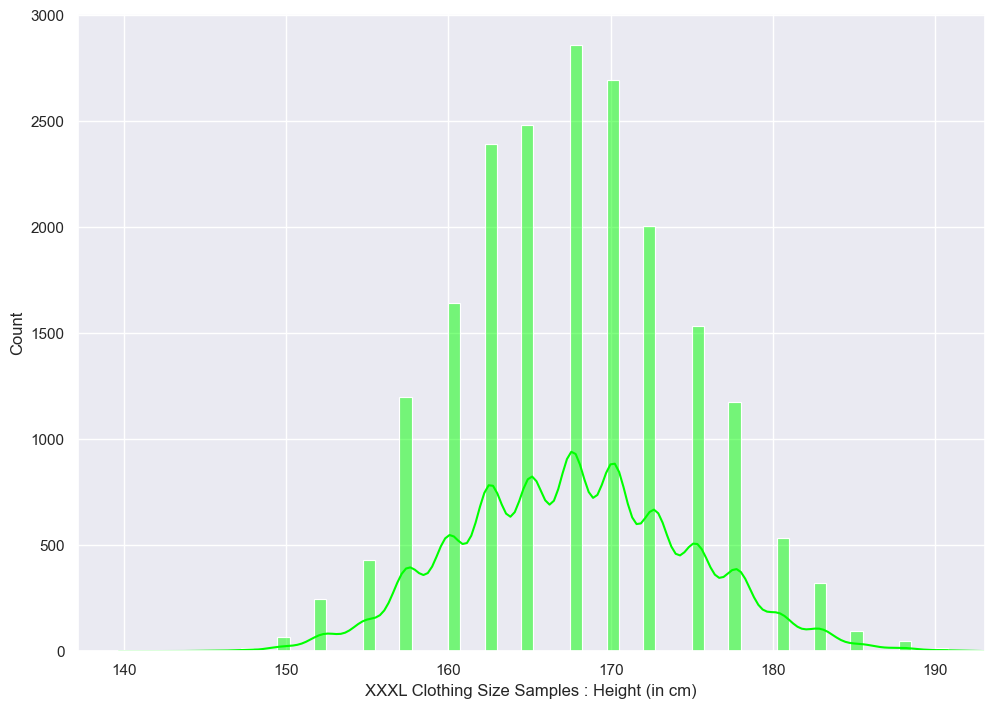

In [132]:
count_plotted = sns.histplot(x = 'height', data = dataframed.loc[dataframed['size'] == 7], kde = True, color = 'lime')
count_plotted.set(xlabel = "XXXL Clothing Size Samples : Height (in cm)")
count_plotted.set(xlim = (137.1600, 193.0400))

# Outliers : Height

[Text(0.5, 0, 'XXXL Clothing Size Samples : Height (in cm)')]

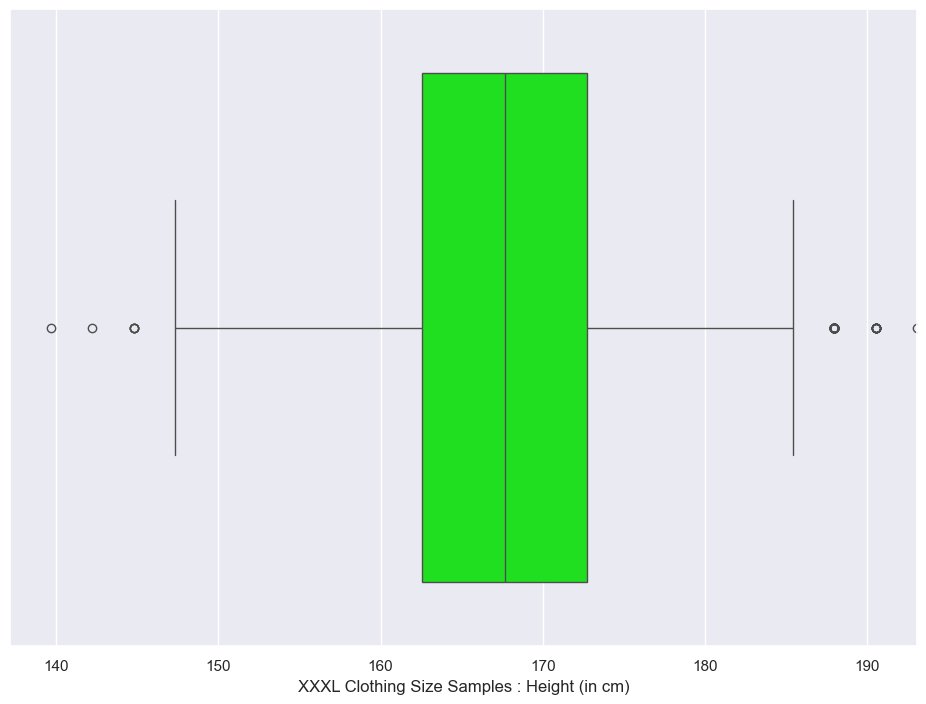

In [133]:
boxxer_plot = sns.boxplot(x = 'height', data = dataframed.loc[dataframed['size'] == 7], color = 'lime')
boxxer_plot.set(xlim = (137.1600, 193.0400))
boxxer_plot.set(xlabel = "XXXL Clothing Size Samples : Height (in cm)")

# How many outliers in Height Column?

In [134]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 7]['height'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 147.3200 or greater than 187.9600
There are 67 outliers.


# Column : Size

# Distribution of rows in terms of Size

[(1.0, 7.0)]

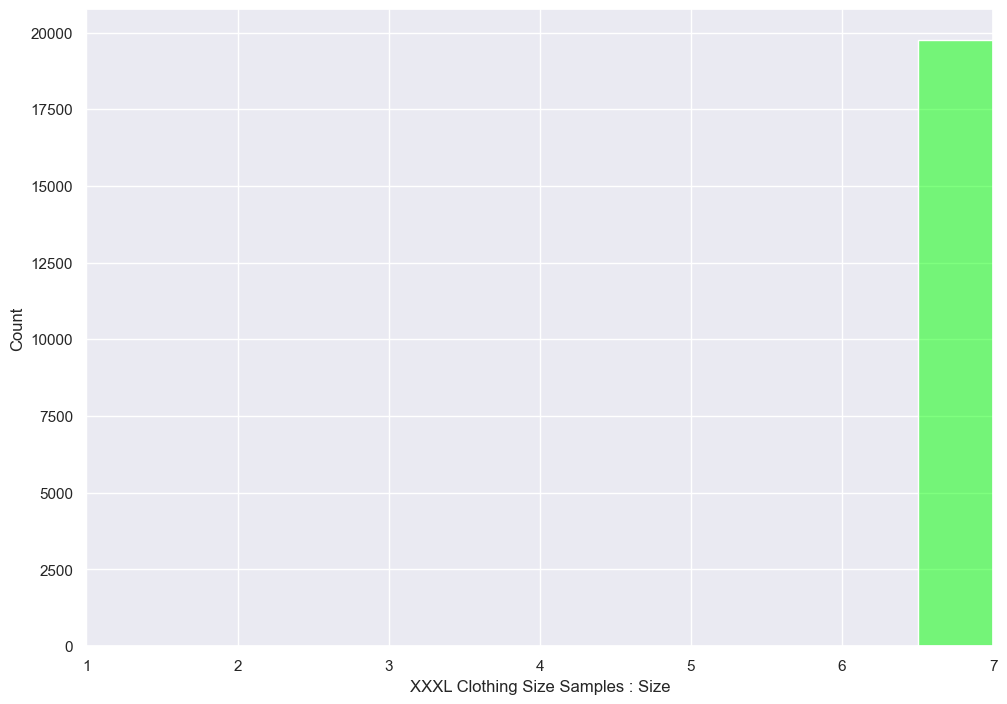

In [135]:
count_plotted = sns.histplot(x = 'size', data = dataframed.loc[dataframed['size'] == 7], kde = True, color = 'lime')
count_plotted.set(xlabel = "XXXL Clothing Size Samples : Size")
count_plotted.set(xlim = (1.0000, 7.0000))

# Outliers : Size

[Text(0.5, 0, 'XXXL Clothing Size Samples : Size')]

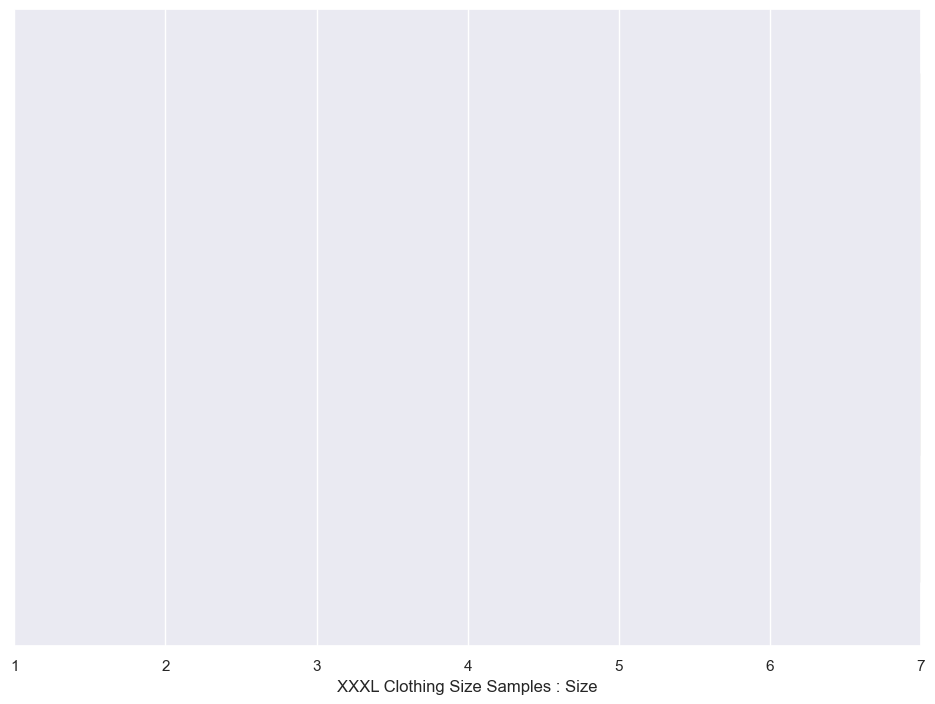

In [136]:
boxxer_plot = sns.boxplot(x = 'size', data = dataframed.loc[dataframed['size'] == 7], color = 'lime')
boxxer_plot.set(xlim = (1.0000, 7.0000))
boxxer_plot.set(xlabel = "XXXL Clothing Size Samples : Size")

# How many outliers in Size Column?

In [137]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 7]['size'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 7.0000 or greater than 7.0000
There are 0 outliers.


# Column : BMI

# Distribution of rows in terms of BMI

[(7.8283, 54.3236)]

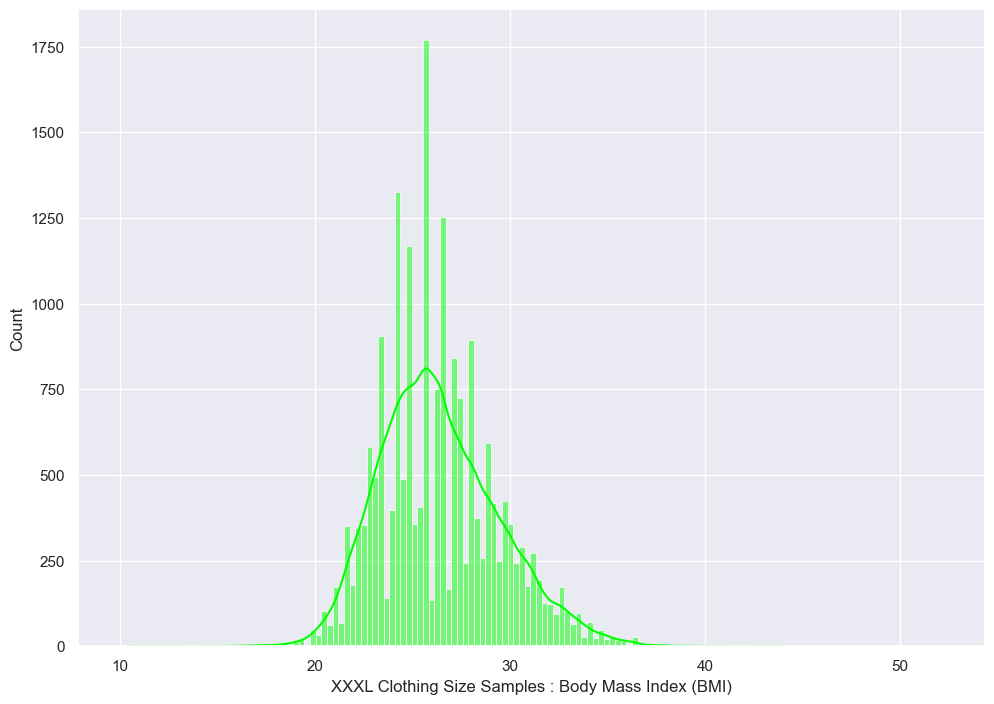

In [138]:
count_plotted = sns.histplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 7], kde = True, color = 'lime')
count_plotted.set(xlabel = "XXXL Clothing Size Samples : Body Mass Index (BMI)")
count_plotted.set(xlim = (7.8283, 54.3236))

# Outliers : BMI

[Text(0.5, 0, 'XXXL Clothing Size Samples : Body Mass Index (BMI)')]

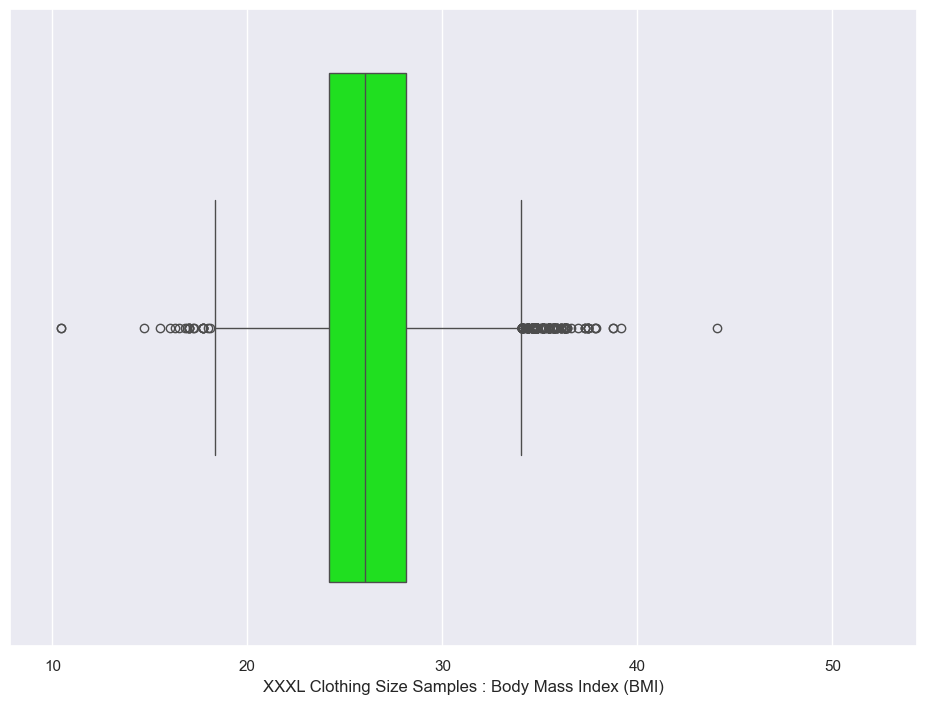

In [139]:
boxxer_plot = sns.boxplot(x = 'bmi', data = dataframed.loc[dataframed['size'] == 7], color = 'lime')
boxxer_plot.set(xlim = (7.8283, 54.3236))
boxxer_plot.set(xlabel = "XXXL Clothing Size Samples : Body Mass Index (BMI)")

# How many outliers in BMI Column?

In [140]:
numpy_array = np.array(dataframed.loc[dataframed['size'] == 7]['bmi'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("The Outliers are values less than {:.4f}".format(lower_bound), "or greater than {:.4f}".format(upper_bound))
print("There are" ,len(outliers), "outliers.")

The Outliers are values less than 18.2487 or greater than 34.0396
There are 283 outliers.


# Z-Score

Z-score is a statistical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score.

In [141]:
temp_frame = []
sizes = []
for size_type in dataframed['size'].unique():
    sizes.append(size_type)
    ndf = dataframed[['age','height','weight']][dataframed['size'] == size_type]
    zscore = ((ndf - ndf.mean())/ndf.std())
    temp_frame.append(zscore)

for x in range(len(temp_frame)):
    temp_frame[x]['age'] = temp_frame[x]['age'][(temp_frame[x]['age']>-3) & (temp_frame[x]['age']<3)]
    temp_frame[x]['height'] = temp_frame[x]['height'][(temp_frame[x]['height']>-3) & (temp_frame[x]['height']<3)]
    temp_frame[x]['weight'] = temp_frame[x]['weight'][(temp_frame[x]['weight']>-3) & (temp_frame[x]['weight']<3)]

for x in range(len(sizes)):
    temp_frame[x]['size'] = sizes[x]
dataframed = pd.concat(temp_frame)
dataframed.head()

,age,height,weight,size
0,1.203782,-0.741892,-0.787372,7
5,-1.188296,-1.107994,-0.248924,7
18,0.543898,1.088622,1.770256,7
24,-0.610898,1.454724,2.174092,7
30,0.378927,0.356416,-1.191208,7


# Check for Missing Values

# Imputation of Values : Median

In [142]:
dataframed["age"] = dataframed["age"].fillna(dataframed['age'].median())
dataframed["height"] = dataframed["height"].fillna(dataframed['height'].median())
dataframed["weight"] = dataframed["weight"].fillna(dataframed['weight'].median())

# Update BMI Values

In [143]:
dataframed["bmi"] = dataframed["height"]/dataframed["weight"]

# Last Call : Check for null values

In [144]:
dataframed.columns

Index(['age', 'height', 'weight', 'size', 'bmi'], dtype='object')

# Defining X

Should contain the following :

* Weight
* Age
* Height
* BMI

In [145]:
X = dataframed[['weight', 'age', 'height', 'bmi']]
X.head(5)

,weight,age,height,bmi
0,-0.787372,1.203782,-0.741892,0.942238
5,-0.248924,-1.188296,-1.107994,4.451143
18,1.770256,0.543898,1.088622,0.614951
24,2.174092,-0.610898,1.454724,0.669118
30,-1.191208,0.378927,0.356416,-0.299206


# Defining y

Should contain the following :
* Size

In [146]:
y = dataframed[['size']]
y.head()

,size
0,7
5,7
18,7
24,7
30,7


# Training and Testing

Supervised AL used :

* K-Nearest Neighbors
* Decision Tree
* Random Forest
* Logistic Regression
* Gaussian Naive Bayes
* Quadratic Discriminant Analysis
* Cat Boost Classifier
* Extra Trees Classifier
* Light Gradient Boosting Machine
* Gradient Boosting Classifier
* Linear Discriminant Analysis
* Ada Boost Classifier
* Ridge Classifier

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

# Split The Data for Training and Testing Purposes
Test Sizes
* 20%
* 30%

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Shape of Data (20%)

In [149]:
print("Shape of Data (20%)")
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

Shape of Data (20%)
X_train shape :  (94496, 4)
y_train shape :  (94496, 1)
X_test shape :  (23625, 4)
y_test shape :  (23625, 1)


# AL : K-Nearest Neighbors (20%)

In [150]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train.values.ravel())
training_prediction = knn.predict(X_train)
testing_prediction = knn.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('AL : K-Nearest Neighbors (20%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : K-Nearest Neighbors (20%)


Training Model Performance Check
Accuracy Score : 0.9470
F1 Score : 0.9467
Precision Score : 0.9467
Recall Score : 0.9470


Testing Model Performance Check
Accuracy Score : 0.8870
F1 Score : 0.8864
Precision Score : 0.8864
Recall Score : 0.8870


# AL : Decision Tree (20%)

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train, y_train)
training_prediction = Decision_Tree.predict(X_train)
testing_prediction = Decision_Tree.predict(X_test)

'''
# Visualize Decision Tree
# Note : I have decided to not include the visualization of the said decision tree due to its depth making it hard to visualize
plt.figure(figsize = (25,20))
tree.plot_tree(Decision_Tree,
               feature_names =  dataframed.columns.tolist()[:-1],
               class_names = ['1', '2', '3', '4', '5', '6', '7'],
               filled = True,
               precision = 5)
plt.show()
'''

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('AL : Decision Tree (20%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score {:.4f}'.format(training_accuracy))
print('F1 Score {:.4f}'.format(training_f1))
print('Precision Score {:.4f}'.format(training_precision))
print('Recall Score {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score {:.4f}'.format(testing_accuracy))
print('F1 Score {:.4f}'.format(testing_f1))
print('Precision Score {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Decision Tree (20%)


Training Model Performance Check
Accuracy Score 1.0000
F1 Score 1.0000
Precision Score 1.0000
Recall Score 1.0000


Testing Model Performance Check
Accuracy Score 0.9994
F1 Score 0.9995
Precision Score 0.9995
Recall Score : 0.9994


In [158]:
%pip install m2cgen


   ---------------------------------------- 0.0/92.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/92.2 kB ? eta -:--:--
   ---------------------------------------- 92.2/92.2 kB 2.6 MB/s eta 0:00:00


In [160]:
import m2cgen as m2c
js_code = m2c.export_to_javascript(Decision_Tree)

# Save the JavaScript code to a file
with open('model.js', 'w') as f:
    f.write(js_code)


# AL: Random Forest (20%)

In [152]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train, y_train.values.ravel())
training_prediction = Random_Forest.predict(X_train)
testing_prediction = Random_Forest.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Random Forest (20%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))


print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Random Forest (20%)


Training Model Performance Check
Accuracy Score : 1.0000
F1 Score : 1.0000
Precision Score : 1.0000
Recall Score : 1.0000


Testing Model Performance Check
Accuracy Score : 0.9981
F1 Score : 0.9981
Precision Score : 0.9981
Recall Score : 0.9981


# AL : Logistic Regression (20%)

In [153]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train, y_train.values.ravel())
training_prediction = Logistic_Regression.predict(X_train)
testing_prediction = Logistic_Regression.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Logistic Regression (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Logistic Regression (20%)


Training Model Performance Check
Accuracy Score : 0.2549
F1 Score : 0.1102
Precision Score : 0.1697
Recall Score : 0.2559


Testing Model Performance Check
Accuracy Score : 0.2559
F1 Score : 0.9981
Precision Score : 0.9981
Recall Score : 0.9981


# AL : Gaussian Naive Bayes (20%)

In [154]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train.values.ravel())
training_prediction = NB.predict(X_train)
testing_prediction = NB.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Gaussian Naive Bayes (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Gaussian Naive Bayes (20%)


Training Model Performance Check
Accuracy Score : 0.1815
F1 Score : 0.1083
Precision Score : 0.1748
Recall Score : 0.1781


Testing Model Performance Check
Accuracy Score : 0.1781
F1 Score : 0.9981
Precision Score : 0.9981
Recall Score : 0.9981


# AL : Quadratic Discriminant Analysis (20%)

In [155]:

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train.values.ravel())
training_prediction = QDA.predict(X_train)
testing_prediction = QDA.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Quadratic Discriminant Analysis (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Quadratic Discriminant Analysis (20%)


Training Model Performance Check
Accuracy Score : 0.2041
F1 Score : 0.1638
Precision Score : 0.3290
Recall Score : 0.2014


Testing Model Performance Check
Accuracy Score : 0.2014
F1 Score : 0.9981
Precision Score : 0.9981
Recall Score : 0.9981


# AL : Cat Boost Classifier (20%)

In [156]:
%pip install catboost
from catboost import CatBoostClassifier
print('Results log : ')
print('\n')

CAT = CatBoostClassifier()
CAT.fit(X_train, y_train.values.ravel())
training_prediction = CAT.predict(X_train)
testing_prediction = CAT.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
# Fix: Use testing variables for testing metrics
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('\n')
print('AL : Cat Boost Classifier (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

^C


ModuleNotFoundError: No module named 'catboost'

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 108.9 kB/s eta 0:15:28
   ---------------------------------------- 0.0/101.1 MB 108.9 kB/s eta 0:15:28
   ---------------------------------------- 0.0/101.1 MB 108.9 kB/s eta 0:15:28
   ---------------------------------------- 0.0/101.1 MB 108.9 kB/s eta 0:15:28
   ---------------------------------------- 0.0/101.1 MB 108.9 kB/s eta 0:15:28
   ---------------------------------------- 0.0/101.1 MB 108.9 kB/s eta 0:15:28
   ---------------------------------------- 0.1/101.1 MB 130.9 kB/s eta 0:12:52
   ---------------------------------------- 0.1/101.1 MB 130.9 kB/s eta 0:12:52
   ---------------------------------------- 0.1/101.1 MB 163.8 kB/s eta 0:10:17
   ---------------------------------------- 0.1/101.1 MB 163.8 kB/s

# AL : Extra Trees Classifier (20%)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier()
ETC.fit(X_train, y_train.values.ravel())
training_prediction = CAT.predict(X_train)
testing_prediction = CAT.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Extra Trees Classifier (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Extra Trees Classifier (20%)


Training Model Performance Check
Accuracy Score : 0.9989
F1 Score : 0.9985
Precision Score : 0.9985
Recall Score : 0.9985


Testing Model Performance Check
Accuracy Score : 0.9985
F1 Score : 0.9985
Precision Score : 0.9985
Recall Score : 0.9985


# AL : Light Gradient Boosting Machine (20%)

In [ ]:
from lightgbm import LGBMClassifier
LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train.values.ravel())
training_prediction = LGBM.predict(X_train)
testing_prediction = LGBM.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Light Gradient Boosting Machine (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 772
[LightGBM] [Info] Number of data points in the train set: 94496, number of used features: 4
[LightGBM] [Info] Start training from score -2.467742
[LightGBM] [Info] Start training from score -1.683675
[LightGBM] [Info] Start training from score -1.380849
[LightGBM] [Info] Start training from score -1.908858
[LightGBM] [Info] Start training from score -1.814840
[LightGBM] [Info] Start training from score -7.524487
[LightGBM] [Info] Start training from score -1.792670
AL : Light Gradient Boosting Machine (20%)


Training Model Performance Check
Accuracy Score : 0.8594
F1 Score : 0.8540
Precision Score : 0.8575
Recall Score : 0.8529


Testing Model Performance Check
Accuracy Score : 0.8529
F1 Score : 0.9985
Precision Score : 0.9985
Rec

# AL : Gradient Boosting Classifier (20%)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train.values.ravel())
training_prediction = GBC.predict(X_train)
testing_prediction = GBC.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Gradient Boosting Classifier (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Gradient Boosting Classifier (20%)


Training Model Performance Check
Accuracy Score : 0.9968
F1 Score : 0.9959
Precision Score : 0.9959
Recall Score : 0.9959


Testing Model Performance Check
Accuracy Score : 0.9959
F1 Score : 0.9985
Precision Score : 0.9985
Recall Score : 0.9985


# AL : Linear Discriminant Analysis (20%)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train.values.ravel())
training_prediction = LDA.predict(X_train)
testing_prediction = LDA.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Linear Discriminant Analysis (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Linear Discriminant Analysis (20%)


Training Model Performance Check
Accuracy Score : 0.2548
F1 Score : 0.1102
Precision Score : 0.1655
Recall Score : 0.2559


Testing Model Performance Check
Accuracy Score : 0.2559
F1 Score : 0.9985
Precision Score : 0.9985
Recall Score : 0.9985


# AL : Ada Boost Classifier (20%)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()
ADA.fit(X_train, y_train.values.ravel())
training_prediction = ADA.predict(X_train)
testing_prediction = ADA.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Ada Boost Classifier (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Ada Boost Classifier (20%)


Training Model Performance Check
Accuracy Score : 0.4938
F1 Score : 0.4780
Precision Score : 0.4923
Recall Score : 0.4981


Testing Model Performance Check
Accuracy Score : 0.4981
F1 Score : 0.9985
Precision Score : 0.9985
Recall Score : 0.9985


# AL : Ridge Classifier (20%)

In [ ]:
from sklearn.linear_model import RidgeClassifier
Ridge = RidgeClassifier()
Ridge.fit(X_train, y_train.values.ravel())
training_prediction = Ridge.predict(X_train)
testing_prediction = Ridge.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL  Ridge Classifier (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL  Ridge Classifier (20%)


Training Model Performance Check
Accuracy Score : 0.2552
F1 Score : 0.1103
Precision Score : 0.1752
Recall Score : 0.2563


Testing Model Performance Check
Accuracy Score : 0.2563
F1 Score : 0.9985
Precision Score : 0.9985
Recall Score : 0.9985


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Shape of Data (30%)

In [ ]:
print('Shape of Data (30%)')
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_train shape : ', y_train.shape)

Shape of Data (30%)
X_train shape :  (82684, 4)
y_train shape :  (82684, 1)
X_test shape :  (35437, 4)
y_train shape :  (82684, 1)


# AL : K-Nearest Neighbors (30%)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train.values.ravel())
training_prediction = knn.predict(X_train)
testing_prediction = knn.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('AL : K-Nearest Neighbors (30%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : K-Nearest Neighbors (30%)


Training Model Performance Check
Accuracy Score : 0.9420
F1 Score : 0.9416
Precision Score : 0.9417
Recall Score : 0.9420


Testing Model Performance Check
Accuracy Score : 0.8751
F1 Score : 0.8745
Precision Score : 0.8746
Recall Score : 0.8751


# AL : Decision Tree (30%)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train, y_train)
training_prediction = Decision_Tree.predict(X_train)
testing_prediction = Decision_Tree.predict(X_test)

'''
# Visualize Decision Tree
# Note : I have decided to not include the visualization of the said decision tree due to its depth making it hard to visualize
plt.figure(figsize = (25,20))
tree.plot_tree(Decision_Tree,
               feature_names =  dataframed.columns.tolist()[:-1],
               class_names = ['1', '2', '3', '4', '5', '6', '7'],
               filled = True,
               precision = 5)
plt.show()
'''

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('AL : Decision Tree (30%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score {:.4f}'.format(training_accuracy))
print('F1 Score {:.4f}'.format(training_f1))
print('Precision Score {:.4f}'.format(training_precision))
print('Recall Score {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score {:.4f}'.format(testing_accuracy))
print('F1 Score {:.4f}'.format(testing_f1))
print('Precision Score {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Decision Tree (30%)


Training Model Performance Check
Accuracy Score 1.0000
F1 Score 1.0000
Precision Score 1.0000
Recall Score 1.0000


Testing Model Performance Check
Accuracy Score 0.9995
F1 Score 0.9995
Precision Score 0.9995
Recall Score : 0.9995


In [ ]:
pip install sklearn


   ---------------------------------------- 0.0/144.4 kB ? eta -:--:--
   ------------------------------- -------- 112.6/144.4 kB 3.3 MB/s eta 0:00:01
   ---------------------------------- ----- 122.9/144.4 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 144.4/144.4 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
    --------------------------------------- 0.2/10.9 MB 3.5 MB/s eta 0:00:04
    --------------------------------------- 0.2/10.9 MB 3.5 MB/s eta 0:00:04
   - -------------------------------------- 0.3/10.9 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.4/10.9 MB 2.5 MB/s eta 0:00:05
   - -------------------------------------- 0.5/10.9 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/10.9 MB 2.4 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/10.9 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/10.9 MB 2.2 MB/s eta 0:00:05
   

# AL : Random Forest (30%)

In [ ]:
from sklearn_porter import Porter
porter = Porter(Decision_Tree, language='js')
output = porter.export()

# Save the JavaScript code to a file
with open('model.js', 'w') as f:
    f.write(output)

ModuleNotFoundError: No module named 'sklearn.tree.tree'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train, y_train.values.ravel())
training_prediction = Random_Forest.predict(X_train)
testing_prediction = Random_Forest.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Random Forest (30%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))


print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Random Forest (30%)


Training Model Performance Check
Accuracy Score : 1.0000
F1 Score : 1.0000
Precision Score : 1.0000
Recall Score : 1.0000


Testing Model Performance Check
Accuracy Score : 0.9974
F1 Score : 0.9974
Precision Score : 0.9974
Recall Score : 0.9974


# AL : Logistic Regression (30%)

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train, y_train.values.ravel())
training_prediction = Logistic_Regression.predict(X_train)
testing_prediction = Logistic_Regression.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Logistic Regression (30%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Logistic Regression (30%)


Training Model Performance Check
Accuracy Score : 0.2549
F1 Score : 0.1100
Precision Score : 0.1638
Recall Score : 0.2561


Testing Model Performance Check
Accuracy Score : 0.2561
F1 Score : 0.9974
Precision Score : 0.9974
Recall Score : 0.9974


# AL : Gaussian Naive Bayes (30%)

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train.values.ravel())
training_prediction = NB.predict(X_train)
testing_prediction = NB.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Gaussian Naive Bayes (30%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Gaussian Naive Bayes (30%)


Training Model Performance Check
Accuracy Score : 0.1791
F1 Score : 0.1002
Precision Score : 0.1479
Recall Score : 0.1737


Testing Model Performance Check
Accuracy Score : 0.1737
F1 Score : 0.9974
Precision Score : 0.9974
Recall Score : 0.9974


# AL : Quadratic Discriminant Analysis (30%)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train.values.ravel())
training_prediction = QDA.predict(X_train)
testing_prediction = QDA.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Quadratic Discriminant Analysis (30%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Quadratic Discriminant Analysis (30%)


Training Model Performance Check
Accuracy Score : 0.2052
F1 Score : 0.1605
Precision Score : 0.3219
Recall Score : 0.1997


Testing Model Performance Check
Accuracy Score : 0.1997
F1 Score : 0.9974
Precision Score : 0.9974
Recall Score : 0.9974


# AL : Cat Boost Classifier (30%)

In [ ]:
from catboost import CatBoostClassifier
print('Results log : ')
print('\n')

CAT = CatBoostClassifier()
CAT.fit(X_train, y_train.values.ravel())
training_prediction = CAT.predict(X_train)
testing_prediction = CAT.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('\n')
print('AL : Cat Boost Classifier (30%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Extra Trees Classifier (30%)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier()
ETC.fit(X_train, y_train.values.ravel())
training_prediction = CAT.predict(X_train)
testing_prediction = CAT.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Extra Trees Classifier (30%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Light Gradient Boosting Machine (30%)

In [ ]:
from lightgbm import LGBMClassifier
LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train.values.ravel())
training_prediction = LGBM.predict(X_train)
testing_prediction = LGBM.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Light Gradient Boosting Machine (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Gradient Boosting Classifier (30%)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train.values.ravel())
training_prediction = GBC.predict(X_train)
testing_prediction = GBC.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Gradient Boosting Classifier (30%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Extreme Gradient Boosting (30%)

# AL : Linear Discriminant Analysis (30%)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train.values.ravel())
training_prediction = LDA.predict(X_train)
testing_prediction = LDA.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Linear Discriminant Analysis (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Ada Boost Classifier (30%)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()
ADA.fit(X_train, y_train.values.ravel())
training_prediction = ADA.predict(X_train)
testing_prediction = ADA.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Ada Boost Classifier (30%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Ridge Classifier (30%)

In [ ]:
from sklearn.linear_model import RidgeClassifier
Ridge = RidgeClassifier()
Ridge.fit(X_train, y_train.values.ravel())
training_prediction = Ridge.predict(X_train)
testing_prediction = Ridge.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL  Ridge Classifier (30%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))